In [3]:
import numpy as np
import pandas as pd
import missingno as msno

from scipy.sparse.csgraph import connected_components
import pickle
from joblib import dump, load

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

from lazypredict.Supervised import LazyClassifier

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Charger les databases usagers
usagers_2019=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2019/usagers-2019.csv', sep=";")
usagers_2020=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2020/usagers-2020.csv', sep=";")
usagers_2021=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2021/usagers-2021.csv', sep=";")
usagers_2022=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2022/usagers-2022.csv', sep=";")

In [3]:
usagers_2019.head(2)

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1


In [4]:
usagers_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Num_Acc      132977 non-null  int64 
 1   id_vehicule  132977 non-null  object
 2   num_veh      132977 non-null  object
 3   place        132977 non-null  int64 
 4   catu         132977 non-null  int64 
 5   grav         132977 non-null  int64 
 6   sexe         132977 non-null  int64 
 7   an_nais      132977 non-null  int64 
 8   trajet       132977 non-null  int64 
 9   secu1        132977 non-null  int64 
 10  secu2        132977 non-null  int64 
 11  secu3        132977 non-null  int64 
 12  locp         132977 non-null  int64 
 13  actp         132977 non-null  object
 14  etatp        132977 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 15.2+ MB


In [5]:
usagers_2020.head(2)

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202000000001,154 742 274,B01,1,1,1,1,1983,5,1,0,-1,-1,-1,-1
1,202000000001,154 742 275,A01,1,1,3,1,1982,5,2,6,-1,-1,-1,-1


In [6]:
usagers_2021.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,267 638,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,267 639,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1


In [7]:
usagers_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129248 entries, 0 to 129247
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      129248 non-null  int64  
 1   id_usager    129248 non-null  object 
 2   id_vehicule  129248 non-null  object 
 3   num_veh      129248 non-null  object 
 4   place        129248 non-null  int64  
 5   catu         129248 non-null  int64  
 6   grav         129248 non-null  int64  
 7   sexe         129248 non-null  int64  
 8   an_nais      126181 non-null  float64
 9   trajet       129248 non-null  int64  
 10  secu1        129248 non-null  int64  
 11  secu2        129248 non-null  int64  
 12  secu3        129248 non-null  int64  
 13  locp         129248 non-null  int64  
 14  actp         129248 non-null  object 
 15  etatp        129248 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 15.8+ MB


In [8]:
usagers_2022.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1


In [9]:
#Ajouter la colonne année

#usagers_2019.insert(loc=15, column="année",value=2019)
#usagers_2020.insert(loc=15, column="année",value=2020)
#usagers_2021.insert(loc=16, column="année",value=2021)
#usagers_2022.insert(loc=16, column="année",value=2022)

#Ajouter la colonne id_usager à usagers_2019 et à usagers_2020
usagers_2019.insert(loc=1, column="id_usager",value= np.nan)
usagers_2020.insert(loc=1, column="id_usager",value= np.nan)

In [10]:
#Verifier les derniere lignes
usagers_2019.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,NaN,138 306 524,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,NaN,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1


In [11]:
usagers_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      132977 non-null  int64  
 1   id_usager    0 non-null       float64
 2   id_vehicule  132977 non-null  object 
 3   num_veh      132977 non-null  object 
 4   place        132977 non-null  int64  
 5   catu         132977 non-null  int64  
 6   grav         132977 non-null  int64  
 7   sexe         132977 non-null  int64  
 8   an_nais      132977 non-null  int64  
 9   trajet       132977 non-null  int64  
 10  secu1        132977 non-null  int64  
 11  secu2        132977 non-null  int64  
 12  secu3        132977 non-null  int64  
 13  locp         132977 non-null  int64  
 14  actp         132977 non-null  object 
 15  etatp        132977 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 16.2+ MB


In [12]:
usagers_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105295 entries, 0 to 105294
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      105295 non-null  int64  
 1   id_usager    0 non-null       float64
 2   id_vehicule  105295 non-null  object 
 3   num_veh      105295 non-null  object 
 4   place        105295 non-null  int64  
 5   catu         105295 non-null  int64  
 6   grav         105295 non-null  int64  
 7   sexe         105295 non-null  int64  
 8   an_nais      105295 non-null  int64  
 9   trajet       105295 non-null  int64  
 10  secu1        105295 non-null  int64  
 11  secu2        105295 non-null  int64  
 12  secu3        105295 non-null  int64  
 13  locp         105295 non-null  int64  
 14  actp         105295 non-null  object 
 15  etatp        105295 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 12.9+ MB


In [13]:
usagers_2020.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202000000001,NaN,154 742 274,B01,1,1,1,1,1983,5,1,0,-1,-1,-1,-1
1,202000000001,NaN,154 742 275,A01,1,1,3,1,1982,5,2,6,-1,-1,-1,-1


In [14]:
#Verifier les derniere lignes
usagers_2022.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1


In [15]:
usagers_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129248 entries, 0 to 129247
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      129248 non-null  int64  
 1   id_usager    129248 non-null  object 
 2   id_vehicule  129248 non-null  object 
 3   num_veh      129248 non-null  object 
 4   place        129248 non-null  int64  
 5   catu         129248 non-null  int64  
 6   grav         129248 non-null  int64  
 7   sexe         129248 non-null  int64  
 8   an_nais      126181 non-null  float64
 9   trajet       129248 non-null  int64  
 10  secu1        129248 non-null  int64  
 11  secu2        129248 non-null  int64  
 12  secu3        129248 non-null  int64  
 13  locp         129248 non-null  int64  
 14  actp         129248 non-null  object 
 15  etatp        129248 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 15.8+ MB


In [16]:
usagers_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126662 entries, 0 to 126661
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      126662 non-null  int64  
 1   id_usager    126662 non-null  object 
 2   id_vehicule  126662 non-null  object 
 3   num_veh      126662 non-null  object 
 4   place        126662 non-null  int64  
 5   catu         126662 non-null  int64  
 6   grav         126662 non-null  int64  
 7   sexe         126662 non-null  int64  
 8   an_nais      123788 non-null  float64
 9   trajet       126662 non-null  int64  
 10  secu1        126662 non-null  int64  
 11  secu2        126662 non-null  int64  
 12  secu3        126662 non-null  int64  
 13  locp         126662 non-null  int64  
 14  actp         126662 non-null  object 
 15  etatp        126662 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 15.5+ MB


In [17]:
#Creation de la datframe usagers par concaténation verticale
usagers= pd.concat([usagers_2019, usagers_2020, usagers_2021, usagers_2022], axis=0, ignore_index=True)

In [18]:
#Afficher les premieres lignes
usagers.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,NaN,138 306 524,B01,2,2,4,2,2002.0,0,1,0,-1,-1,-1,-1
1,201900000001,NaN,138 306 524,B01,1,1,4,2,1993.0,5,1,0,-1,-1,-1,-1


In [19]:
#Afficher les dernieres lignes
usagers.tail(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
494180,202200055302,968 228,715 629,A01,1,1,3,1,1992.0,1,2,6,-1,-1,-1,-1
494181,202200055302,968 229,715 630,B01,1,1,1,1,2000.0,-1,1,-1,-1,-1,-1,-1


In [20]:
#Afficher les infos 
usagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494182 entries, 0 to 494181
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      494182 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  494182 non-null  object 
 3   num_veh      494182 non-null  object 
 4   place        494182 non-null  int64  
 5   catu         494182 non-null  int64  
 6   grav         494182 non-null  int64  
 7   sexe         494182 non-null  int64  
 8   an_nais      488241 non-null  float64
 9   trajet       494182 non-null  int64  
 10  secu1        494182 non-null  int64  
 11  secu2        494182 non-null  int64  
 12  secu3        494182 non-null  int64  
 13  locp         494182 non-null  int64  
 14  actp         494182 non-null  object 
 15  etatp        494182 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 60.3+ MB


Seulement les variables id_usager et an_nais ont des valeurs manquantes

In [22]:
################################## Tester la présence de doublons ########################################
print(usagers.duplicated().sum())

164


In [23]:
# Afficher les doublons
usagers[usagers.duplicated()]

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
419,201900000191,NaN,138 306 163,B01,2,2,1,1,1943.0,0,1,-1,-1,0,0,-1
1331,201900000599,NaN,138 305 440,A01,10,3,3,1,2000.0,9,0,-1,-1,1,9,3
10123,201900004504,NaN,138 298 020,B01,4,2,1,2,1993.0,0,1,0,-1,0,0,-1
12688,201900005615,NaN,138 295 970,B01,10,3,4,2,2004.0,2,0,-1,-1,4,3,2
13663,201900006062,NaN,138 295 140,C01,2,2,4,1,2000.0,0,1,0,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209783,202000034951,NaN,154 680 993,B01,8,2,4,2,1994.0,0,0,-1,-1,0,0,-1
220425,202000039749,NaN,154 672 494,A01,2,2,4,1,1998.0,4,0,-1,-1,0,0,-1
222426,202000040653,NaN,154 670 913,A01,8,2,1,1,1980.0,9,8,0,-1,-1,0,-1
222874,202000040854,NaN,154 670 556,A01,10,3,4,2,2000.0,0,0,-1,-1,3,3,2


In [24]:
usagers[usagers["Num_Acc"] == 201900000191]

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
417,201900000191,NaN,138 306 163,B01,1,1,4,2,1955.0,0,1,-1,-1,0,0,-1
418,201900000191,NaN,138 306 163,B01,2,2,1,1,1943.0,0,1,-1,-1,0,0,-1
419,201900000191,NaN,138 306 163,B01,2,2,1,1,1943.0,0,1,-1,-1,0,0,-1
420,201900000191,NaN,138 306 164,A01,1,1,1,2,1991.0,0,1,-1,-1,0,0,-1
421,201900000191,NaN,138 306 164,A01,9,2,1,1,2016.0,9,3,-1,-1,0,0,-1


In [25]:
usagers[usagers["Num_Acc"] == 201900000599]

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
1324,201900000599,NaN,138 305 439,B01,1,1,4,1,2001.0,5,1,5,-1,0,0,-1
1325,201900000599,NaN,138 305 439,B01,7,2,1,1,1998.0,5,1,-1,-1,0,0,-1
1326,201900000599,NaN,138 305 440,A01,10,3,4,1,2000.0,9,0,-1,-1,1,9,3
1327,201900000599,NaN,138 305 440,A01,10,3,4,1,2001.0,9,0,-1,-1,1,9,3
1328,201900000599,NaN,138 305 440,A01,10,3,3,1,2000.0,9,0,-1,-1,1,9,3
1329,201900000599,NaN,138 305 440,A01,10,3,4,1,1994.0,9,0,-1,-1,1,9,3
1330,201900000599,NaN,138 305 440,A01,10,3,4,1,1999.0,9,0,-1,-1,1,9,3
1331,201900000599,NaN,138 305 440,A01,10,3,3,1,2000.0,9,0,-1,-1,1,9,3


In [26]:
#On ne garde que la première occurrence du doublon
usagers= usagers.drop_duplicates(keep = 'first')

In [27]:
usagers[usagers["Num_Acc"] == 201900000191]

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
417,201900000191,NaN,138 306 163,B01,1,1,4,2,1955.0,0,1,-1,-1,0,0,-1
418,201900000191,NaN,138 306 163,B01,2,2,1,1,1943.0,0,1,-1,-1,0,0,-1
420,201900000191,NaN,138 306 164,A01,1,1,1,2,1991.0,0,1,-1,-1,0,0,-1
421,201900000191,NaN,138 306 164,A01,9,2,1,1,2016.0,9,3,-1,-1,0,0,-1


In [28]:
usagers[usagers["Num_Acc"] == 201900000599]

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
1324,201900000599,NaN,138 305 439,B01,1,1,4,1,2001.0,5,1,5,-1,0,0,-1
1325,201900000599,NaN,138 305 439,B01,7,2,1,1,1998.0,5,1,-1,-1,0,0,-1
1326,201900000599,NaN,138 305 440,A01,10,3,4,1,2000.0,9,0,-1,-1,1,9,3
1327,201900000599,NaN,138 305 440,A01,10,3,4,1,2001.0,9,0,-1,-1,1,9,3
1328,201900000599,NaN,138 305 440,A01,10,3,3,1,2000.0,9,0,-1,-1,1,9,3
1329,201900000599,NaN,138 305 440,A01,10,3,4,1,1994.0,9,0,-1,-1,1,9,3
1330,201900000599,NaN,138 305 440,A01,10,3,4,1,1999.0,9,0,-1,-1,1,9,3


In [29]:
# Tester la présence de doublons 
print(usagers.duplicated().sum())

0


In [30]:
usagers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494018 entries, 0 to 494181
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      494018 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  494018 non-null  object 
 3   num_veh      494018 non-null  object 
 4   place        494018 non-null  int64  
 5   catu         494018 non-null  int64  
 6   grav         494018 non-null  int64  
 7   sexe         494018 non-null  int64  
 8   an_nais      488077 non-null  float64
 9   trajet       494018 non-null  int64  
 10  secu1        494018 non-null  int64  
 11  secu2        494018 non-null  int64  
 12  secu3        494018 non-null  int64  
 13  locp         494018 non-null  int64  
 14  actp         494018 non-null  object 
 15  etatp        494018 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 64.1+ MB


In [31]:
################################## Tester la présence de valeurs manquantes ########################################

In [32]:
# On compte le nombre de valeurs manquantes pour chaque COLONNE
usagers.isnull().sum(axis = 0)

Num_Acc             0
id_usager      238108
id_vehicule         0
num_veh             0
place               0
catu                0
grav                0
sexe                0
an_nais          5941
trajet              0
secu1               0
secu2               0
secu3               0
locp                0
actp                0
etatp               0
dtype: int64

In [33]:
# On compte le nombre de valeurs manquantes pour chaque LIGNE
#usagers.isnull().sum(axis = 1) 

In [34]:
#Tableau de valeurs manquantes par colonne
missing_values=usagers.isnull().sum()
missing_percent=(missing_values/len(usagers))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

             Missing Values  Percentage
Num_Acc                   0    0.000000
id_usager            238108   48.198244
id_vehicule               0    0.000000
num_veh                   0    0.000000
place                     0    0.000000
catu                      0    0.000000
grav                      0    0.000000
sexe                      0    0.000000
an_nais                5941    1.202588
trajet                    0    0.000000
secu1                     0    0.000000
secu2                     0    0.000000
secu3                     0    0.000000
locp                      0    0.000000
actp                      0    0.000000
etatp                     0    0.000000


In [35]:
# visualiser les valeurs manquantes avec missingno
#msno.matrix(usagers)
#plt.show()

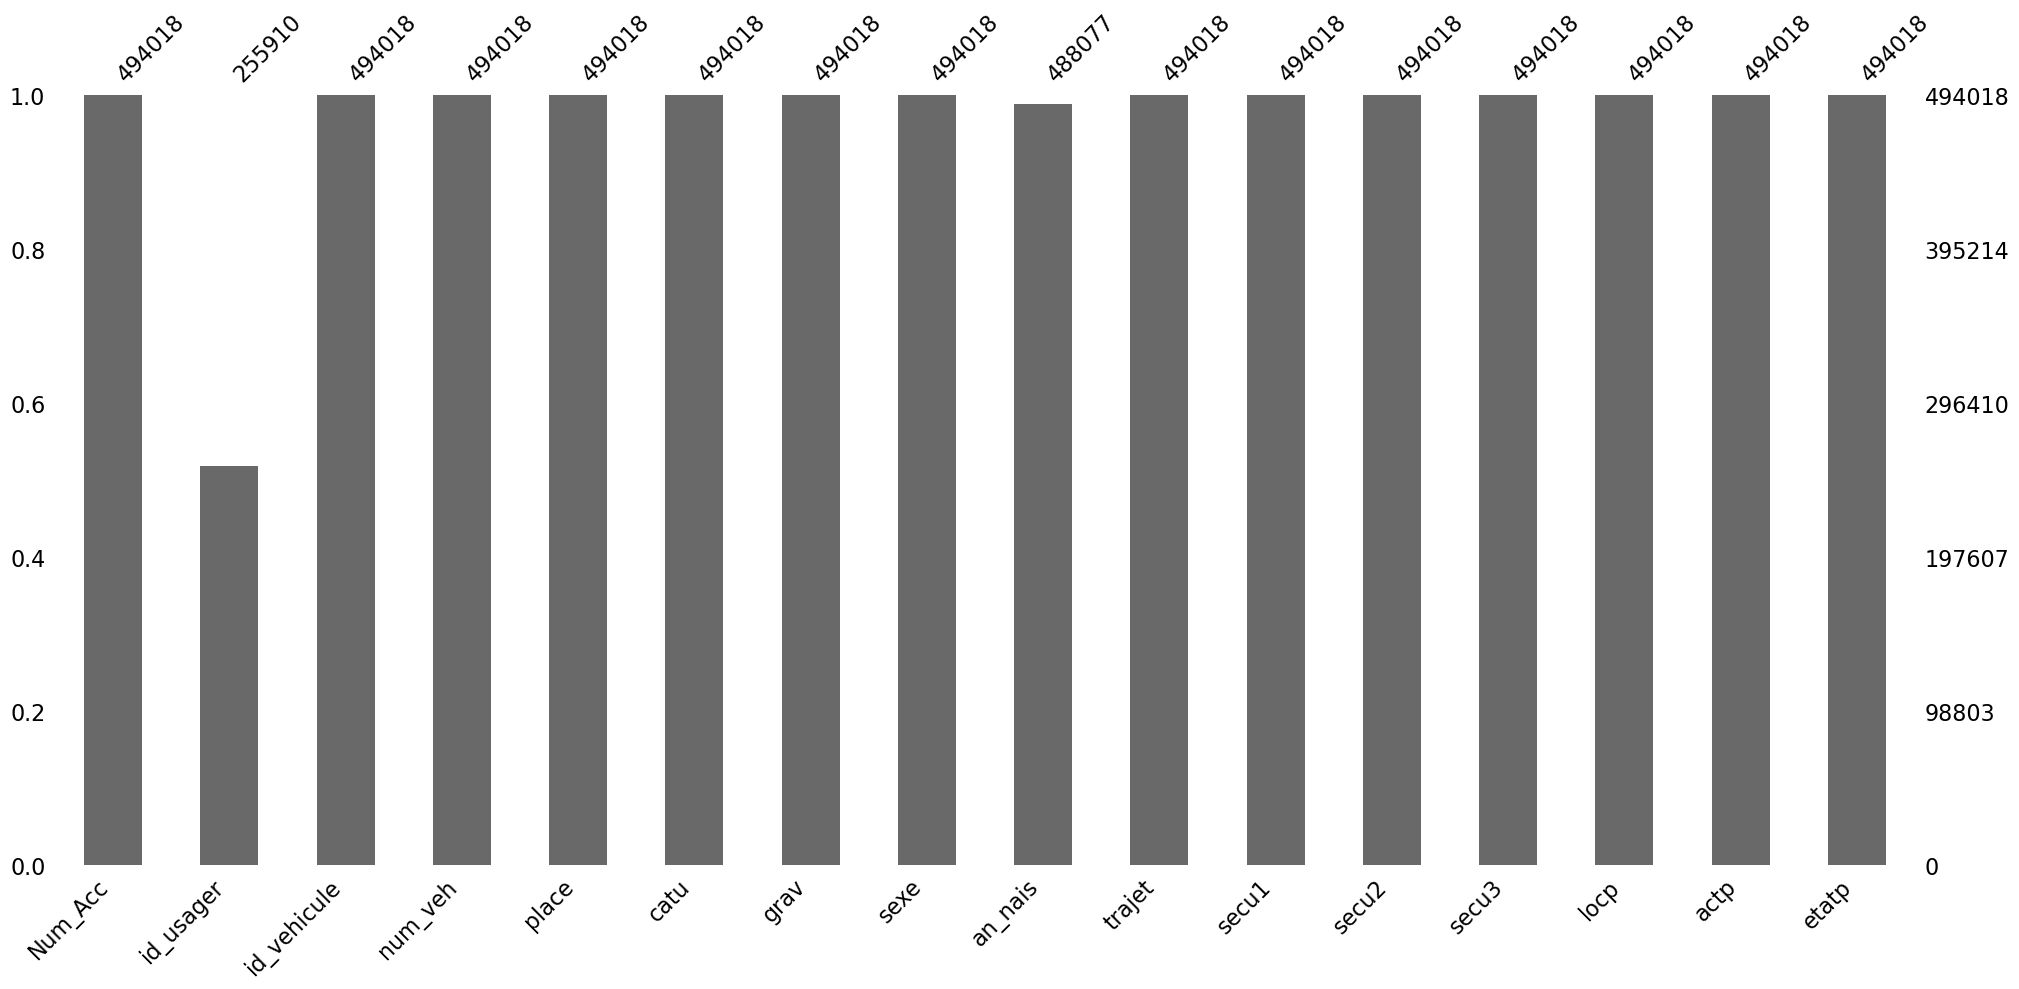

In [36]:
# visualiser les valeurs manquantes avec missingno bar
msno.bar(usagers)
plt.show()

In [37]:
# visualiser les valeurs manquantes avec missingno heatmap
#def handle_cate

In [38]:
######################################################## A REVOIR ######################################################################
######################################################## A REVOIR ######################################################################
######################################################## A REVOIR ######################################################################
#Netoyage des données manquantes
#def handle_cat_feat(feature, usagers):
    #usagers[feature].fillna(usagers[feature].value_counts().index[0], inplace=True)
#for feature in usagers.columns:
    #handle_cat_feat(feature, usagers)
######################################################## A REVOIR ######################################################################

In [39]:
#Repartition de l´Identifiant du véhicule
usagers.num_veh.value_counts()

num_veh
A01     297771
B01     165181
C01      19098
Z01       5258
D01       4162
         ...  
IB01         1
AY01         1
MV01         1
VF01         1
ZA01         1
Name: count, Length: 77, dtype: int64

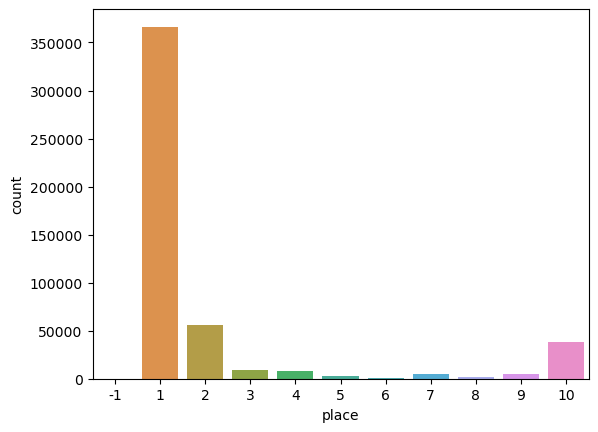

In [40]:
#place occupée dans le véhicule par l'usager au moment de l'accident
sns.countplot(x = "place", data= usagers)
plt.show()

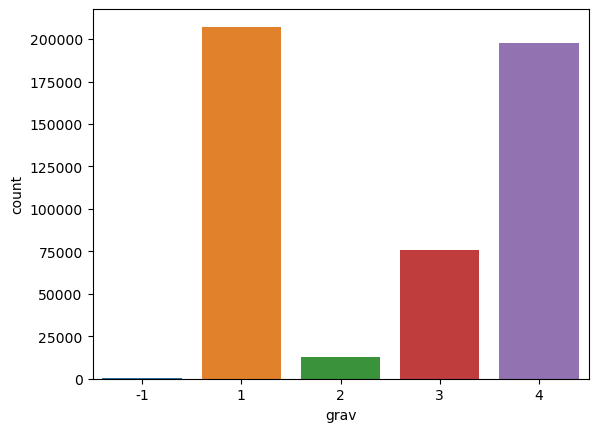

In [41]:
#Repartition de la gravité de l´accident
sns.countplot(x = "grav", data= usagers)
plt.show()

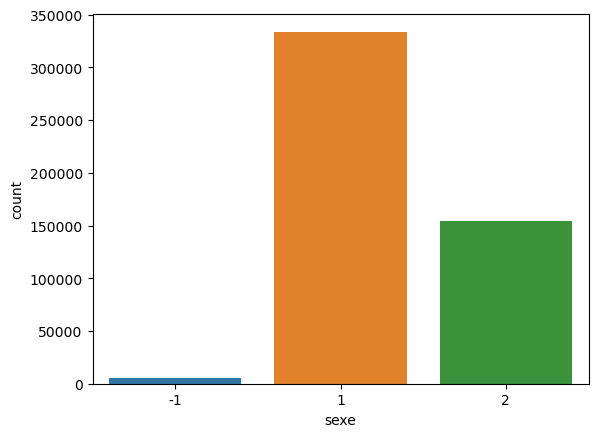

In [42]:
#Sexe de l'usager au moment de l´accident
sns.countplot(x = "sexe", data= usagers)
plt.show()

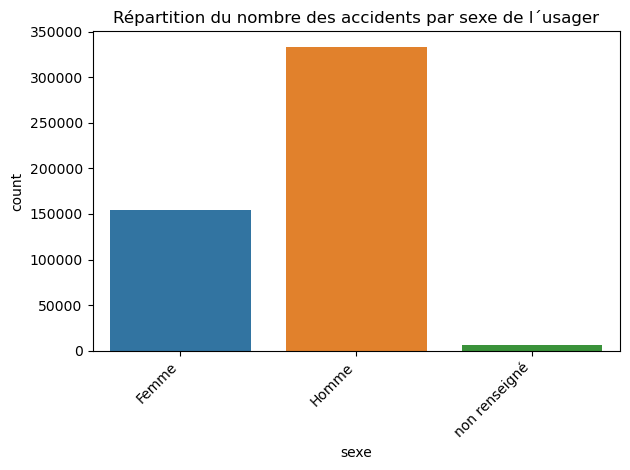

In [43]:
## Afficher la nouvelle repartition de la valeur cible
usagers_modified = usagers.copy()
usagers_modified['sexe'] = usagers_modified['sexe'].replace({
   -1: 'non renseigné',
    1: 'Homme',
    2: 'Femme',   
})

sns.countplot(x='sexe', data=usagers_modified)

# Personnaliser les étiquettes de l'axe x avec rotation oblique
plt.xticks(rotation=45, ha='right')  # Rotation de 45 degrés, alignées à droite

# Ajouter un titre au graphique
plt.title('Répartition du nombre des accidents par sexe de l´usager')

# Afficher le graphique
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show()

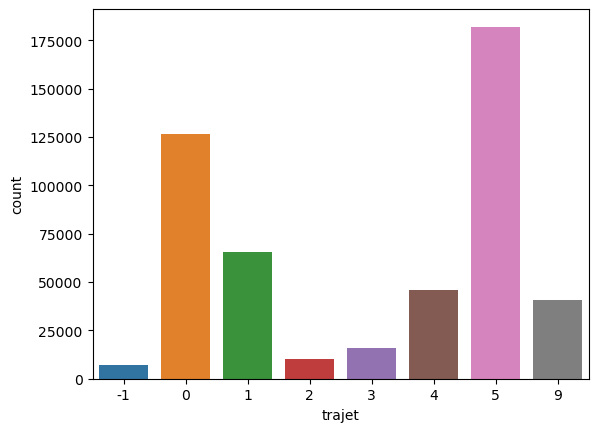

In [44]:
#visualiser Motif du déplacement au moment de l’accident
sns.countplot(x = "trajet", data= usagers)
plt.show()

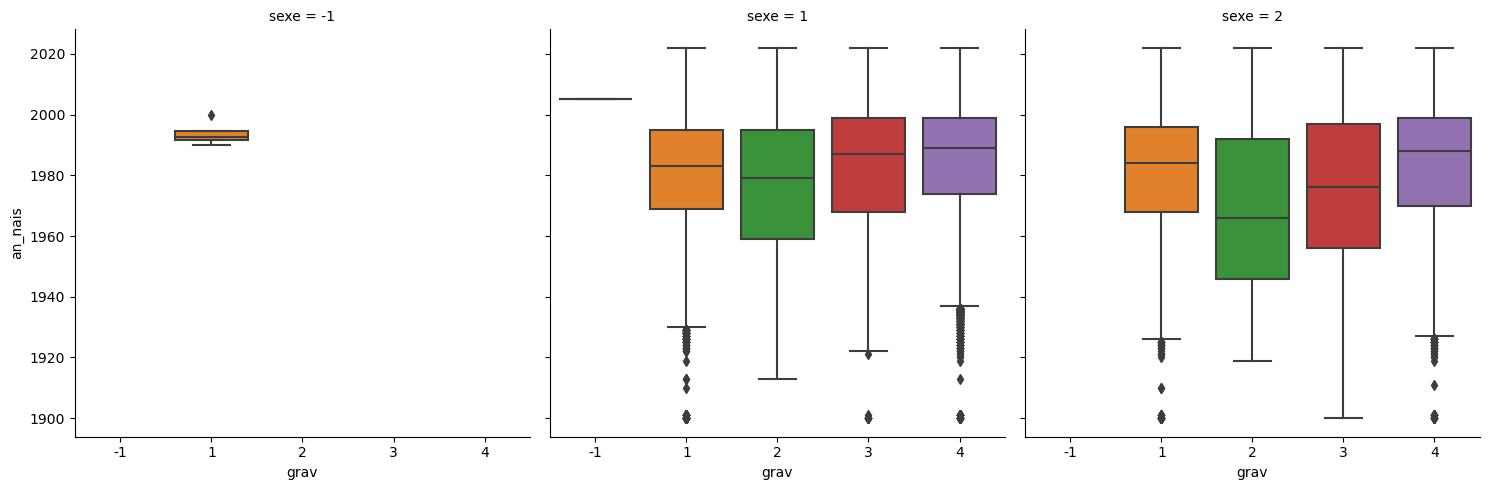

In [45]:
#sns.boxplot(x = 'grav', y ='sexe', data = usagers)
#plt.show()

sns.catplot(x = "grav", y = "an_nais", col = 'sexe', kind = "box", data = usagers)
plt.show()

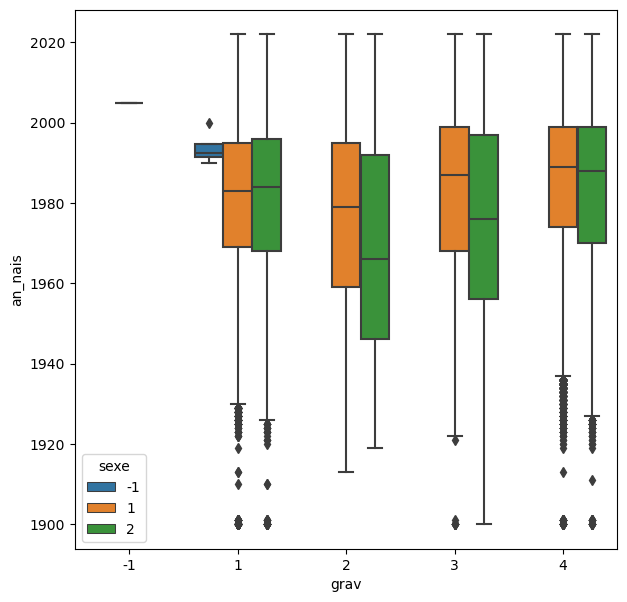

In [46]:
plt.figure(figsize = (7,7))
sns.boxplot(x = "grav", y = "an_nais", data = usagers, hue = "sexe")
plt.show()

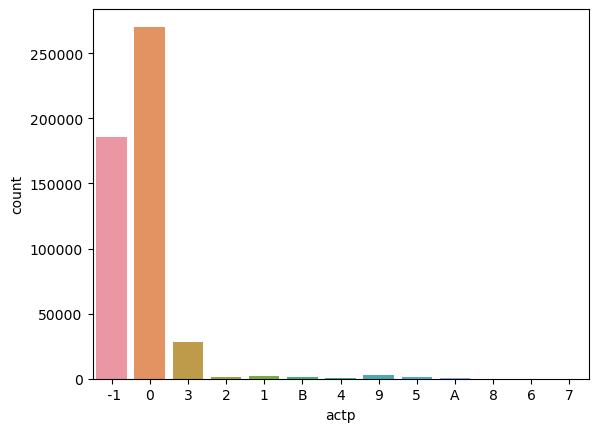

In [47]:
#visualiser l´Action du piéton au moment de l’accident
sns.countplot(x = "actp", data= usagers)
plt.show()

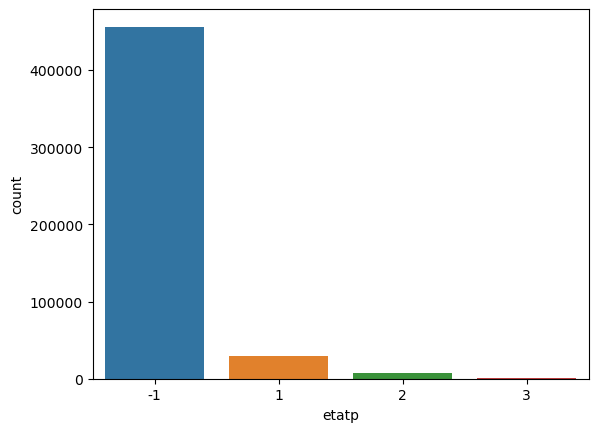

In [48]:
#visualiser si le piéton accidenté était seul ou non au moment de l’accident
sns.countplot(x = "etatp", data= usagers)
plt.show()

In [49]:
usagers.etatp.unique()

array([-1,  1,  2,  3], dtype=int64)

In [50]:
#Verifier s´il y´a des features non convertibles en float. dans les colonnes contenant des valeurs numeriques 
def isDecimal(text):
    try :
        float(text)
        return False
    except :
        return True

In [51]:
print(usagers['Num_Acc'][usagers['Num_Acc'].apply(isDecimal)].unique())
print(usagers['id_usager'][usagers['id_usager'].apply(isDecimal)].unique())
print(usagers['id_vehicule'][usagers['id_vehicule'].apply(isDecimal)].unique())
print(usagers['num_veh'][usagers['num_veh'].apply(isDecimal)].unique())
print(usagers['place'][usagers['place'].apply(isDecimal)].unique())
print(usagers['catu'][usagers['catu'].apply(isDecimal)].unique())
print(usagers['grav'][usagers['grav'].apply(isDecimal)].unique())
print(usagers['sexe'][usagers['sexe'].apply(isDecimal)].unique())
print(usagers['an_nais'][usagers['an_nais'].apply(isDecimal)].unique())
print(usagers['trajet'][usagers['trajet'].apply(isDecimal)].unique())
print(usagers['secu1'][usagers['secu1'].apply(isDecimal)].unique())
print(usagers['secu2'][usagers['secu2'].apply(isDecimal)].unique())
print(usagers['secu3'][usagers['secu3'].apply(isDecimal)].unique())
print(usagers['locp'][usagers['locp'].apply(isDecimal)].unique())
print(usagers['actp'][usagers['actp'].apply(isDecimal)].unique())
print(usagers['etatp'][usagers['etatp'].apply(isDecimal)].unique())
#print(usagers['num_veh'][usagers['num_veh'].apply(isDecimal)].unique())
#print(usagers['année'][usagers['année'].apply(isDecimal)].unique())

[]
['267\xa0638' '267\xa0639' '267\xa0636' ... '968\xa0232' '968\xa0228'
 '968\xa0229']
['138\xa0306\xa0524' '138\xa0306\xa0525' '138\xa0306\xa0523' ...
 '715\xa0632' '715\xa0629' '715\xa0630']
['B01' 'A01' 'C01' 'D01' 'E01' 'Z01' 'Y01' 'I01' 'T01' 'O01' 'G01' 'F01'
 'M01' 'LB01' 'H01' 'J01' 'K01' 'L01' 'N01' 'W01' 'X01' 'U01' 'V01' 'Q01'
 'MA01' 'CB01' '\\01' 'VF01' 'P01' 'LA01' 'AA01' 'NA01' 'SA01' 'CA01'
 'BA01' 'AB01' 'PA01' 'EB01' 'WB01' 'RA01' 'MV01' 'EA01' 'TB01' 'AY01'
 'SB01' 'HB01' 'FA01' 'BB01' 'VB01' 'GA01' 'MB01' 'PB01' '[01' 'IB01'
 'DA01' 'DB01' 'HA01' 'XA01' 'TA01' 'ZZ01' 'GB01' 'IA01' 'FB01' 'YA01'
 'KA01' 'KD01' 'R01' 'S01' ']01' 'WX01' 'XB01' 'JA01' 'RB01' 'VA01' 'UB01'
 'OB01' 'ZA01']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['B' 'A']
[]


In [52]:
################################### Partie data base vehicles ############################################################

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
#%matplotlib inline
import seaborn as sns

In [54]:
#Charger les databases vehicules
vehicules_2019=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2019/vehicules-2019.csv', sep=";")
vehicules_2020=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2020/vehicules-2020.csv', sep=";")
vehicules_2021=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2021/vehicules-2021.csv', sep=";")
vehicules_2022=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2022/vehicules-2022.csv', sep=";")

In [55]:
# Check sur la base de données
vehicules_2022.head(2)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202200000001,813 952,A01,1,2,0,2,1,9,1,NaN
1,202200000001,813 953,B01,1,7,0,2,2,1,1,NaN


In [56]:
vehicules_2019.head(2)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN


In [57]:
#Ajouter la colonne année

#vehicules_2019.insert(loc=11, column="année_veh",value=2019)
#vehicules_2020.insert(loc=11, column="année_veh",value=2020)
#vehicules_2021.insert(loc=11, column="année_veh",value=2021)
#vehicules_2022.insert(loc=11, column="année_veh",value=2022)

In [58]:
vehicules_2019.head(2)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN


In [59]:
vehicules_2022.tail(2)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
94491,202200055302,715 629,A01,1,33,0,2,1,1,1,NaN
94492,202200055302,715 630,B01,1,7,0,0,4,21,1,NaN


In [60]:
#Creation de la datframe usagers par concaténation verticale
vehicules= pd.concat([vehicules_2019, vehicules_2020, vehicules_2021, vehicules_2022], axis=0, ignore_index=True)

In [61]:
#Verifier les premières lignes
vehicules.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN
2,201900000002,138 306 523,A01,1,7,4,0,1,0,1,NaN
3,201900000003,138 306 520,A01,1,7,0,2,1,2,1,NaN
4,201900000003,138 306 521,B01,1,7,1,0,4,2,1,NaN


In [62]:
#Verifier les dernieres lignes
vehicules.tail()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
373579,202200055300,715 633,A01,2,7,2,0,1,1,1,NaN
373580,202200055301,715 631,A01,2,7,0,0,8,19,1,NaN
373581,202200055301,715 632,B01,2,7,0,2,1,1,1,NaN
373582,202200055302,715 629,A01,1,33,0,2,1,1,1,NaN
373583,202200055302,715 630,B01,1,7,0,0,4,21,1,NaN


In [63]:
vehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373584 entries, 0 to 373583
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      373584 non-null  int64  
 1   id_vehicule  373584 non-null  object 
 2   num_veh      373584 non-null  object 
 3   senc         373584 non-null  int64  
 4   catv         373584 non-null  int64  
 5   obs          373584 non-null  int64  
 6   obsm         373584 non-null  int64  
 7   choc         373584 non-null  int64  
 8   manv         373584 non-null  int64  
 9   motor        373584 non-null  int64  
 10  occutc       3074 non-null    float64
dtypes: float64(1), int64(8), object(2)
memory usage: 31.4+ MB


In [64]:
# Tester la présence de doublons 
print(vehicules.duplicated().sum())

0


In [65]:
# Afficher les doublons
#vehicules[vehicules.duplicated()]
#On ne garde que la première occurrence du doublon
#vehicules= vehicules.drop_duplicates(keep = 'first')
# Tester la présence de doublons 
#print(vehicules.duplicated().sum())

In [66]:
# On compte le nombre de valeurs manquantes pour chaque COLONNE
vehicules.isnull().sum(axis = 0)

Num_Acc             0
id_vehicule         0
num_veh             0
senc                0
catv                0
obs                 0
obsm                0
choc                0
manv                0
motor               0
occutc         370510
dtype: int64

In [67]:
#Tableau de valeurs manquantes par colonne
missing_values=vehicules.isnull().sum()
missing_percent=(missing_values/len(vehicules))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

             Missing Values  Percentage
Num_Acc                   0     0.00000
id_vehicule               0     0.00000
num_veh                   0     0.00000
senc                      0     0.00000
catv                      0     0.00000
obs                       0     0.00000
obsm                      0     0.00000
choc                      0     0.00000
manv                      0     0.00000
motor                     0     0.00000
occutc               370510    99.17716


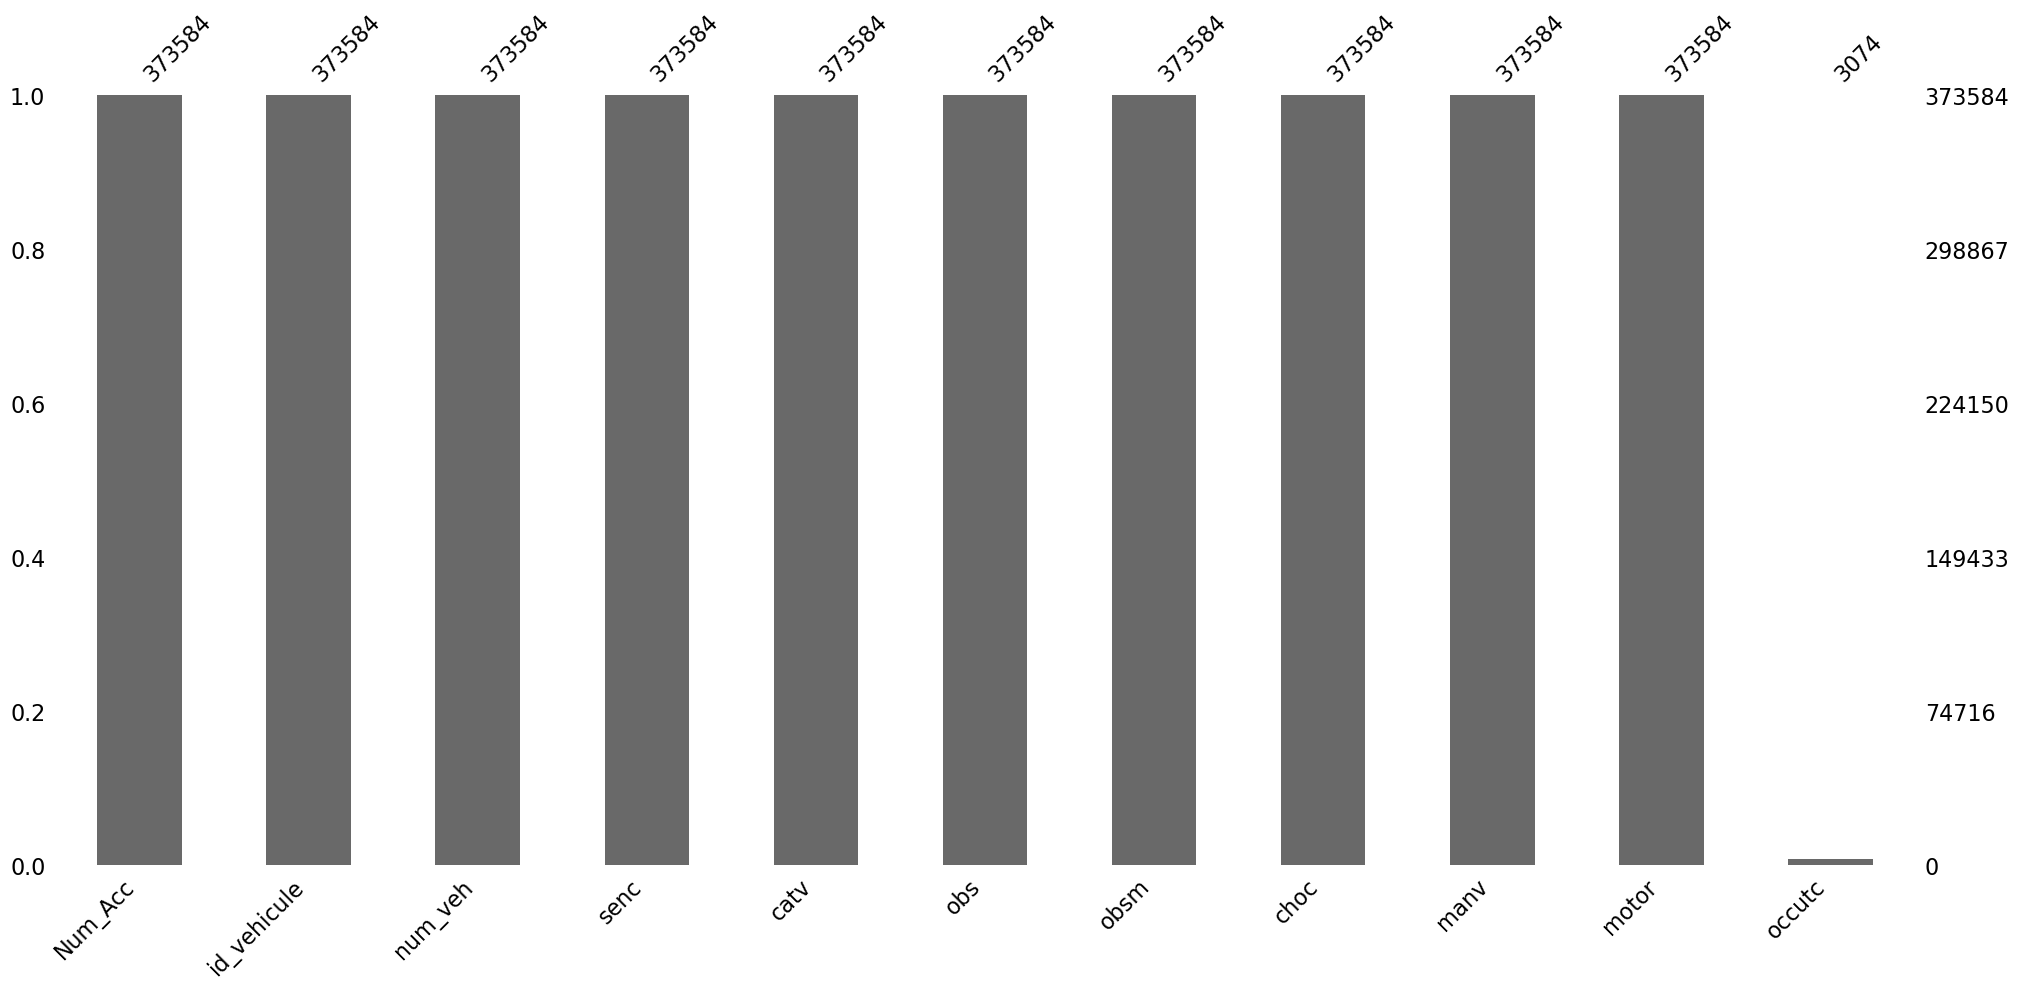

In [68]:
# visualiser les valeurs manquantes avec missingno bar
msno.bar(vehicules)
plt.show()

In [69]:
######################################################## A REVOIR ######################################################################
######################################################## A REVOIR ######################################################################
######################################################## A REVOIR ######################################################################
#Netoyage des données manquantes
#def handle_cat_feat(feature, vehicules):
    #vehicules[feature].fillna(vehicules[feature].value_counts().index[0], inplace=True)
#for feature in vehicules.columns:
    #handle_cat_feat(feature, vehicules)
######################################################## A REVOIR ######################################################################

In [70]:
# On recompte le nombre de valeurs manquantes pour chaque COLONNE
vehicules.isnull().sum(axis = 0)

Num_Acc             0
id_vehicule         0
num_veh             0
senc                0
catv                0
obs                 0
obsm                0
choc                0
manv                0
motor               0
occutc         370510
dtype: int64

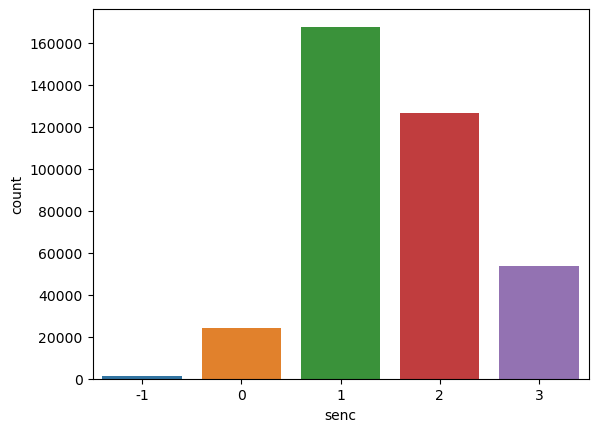

In [71]:
#Sens de circulation au moment de l'accident
sns.countplot(x = "senc", data= vehicules)
plt.show()

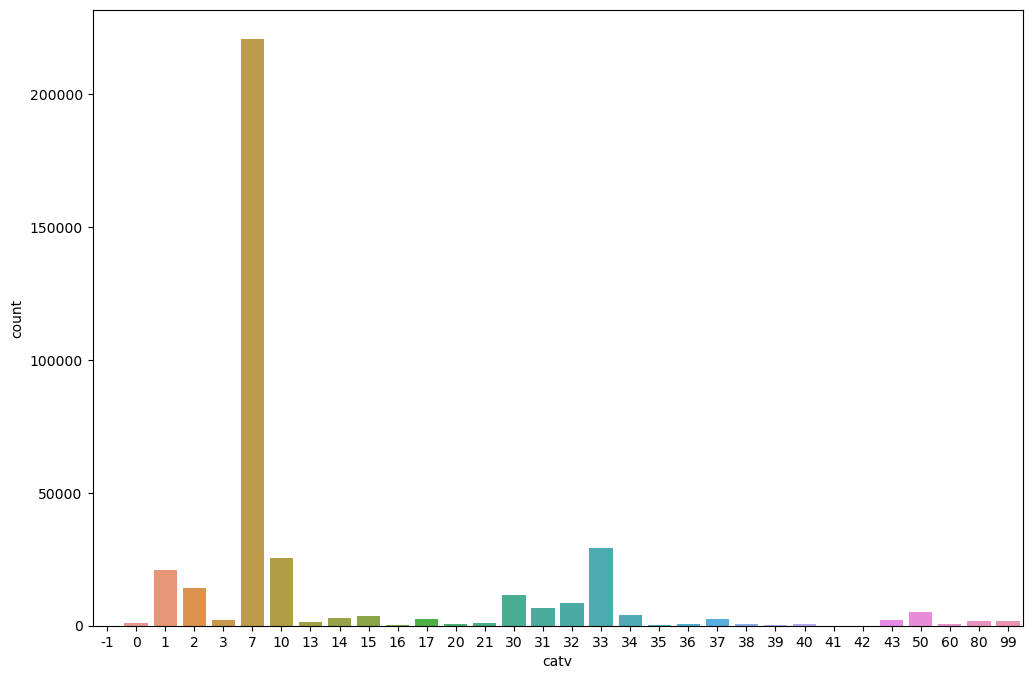

In [72]:
#Catégorie du véhicule au moment de l'accident
plt.figure(figsize=(12,8))
sns.countplot(x = "catv", data= vehicules)
plt.show()

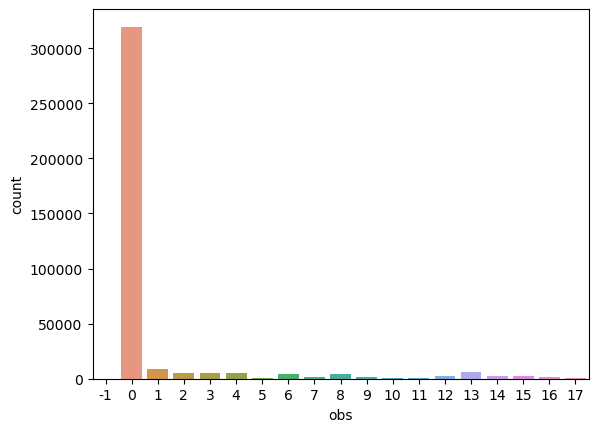

In [73]:
#Obstacle fixe heurté au moment de l'accident
sns.countplot(x = "obs", data= vehicules)
plt.show()

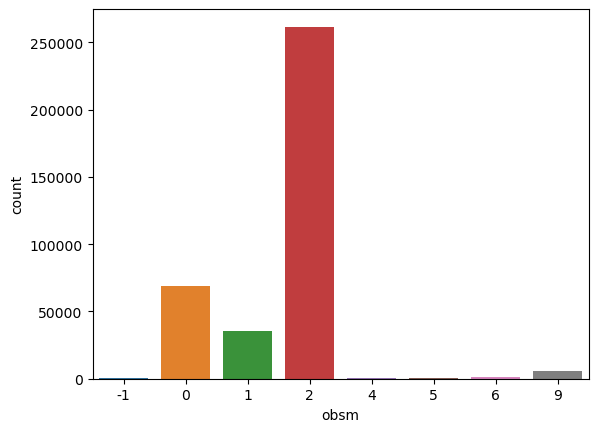

In [74]:
#Obstacle mobile heurté au moment de l'accident
sns.countplot(x = "obsm", data= vehicules)
plt.show()

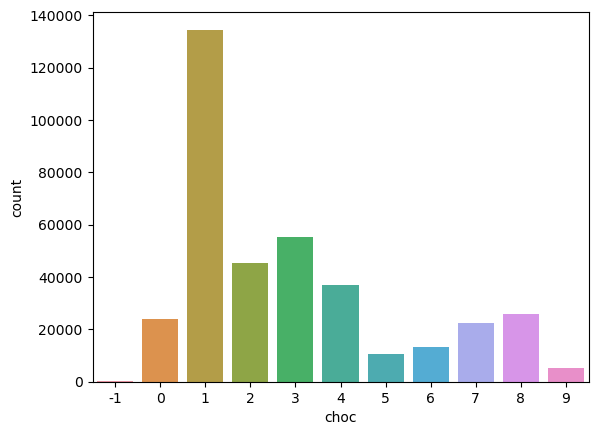

In [75]:
#Point de choc initial au moment de l'accident
sns.countplot(x = "choc", data= vehicules)
plt.show()

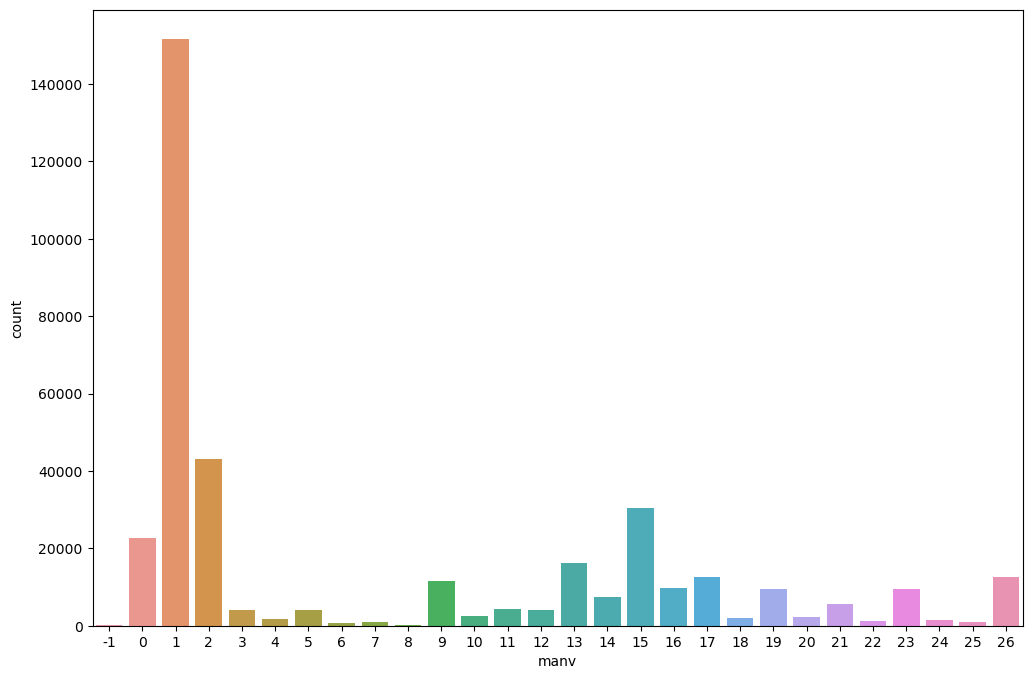

In [76]:
#Manoeuvre au moment de l'accident
plt.figure(figsize=(12,8))
sns.countplot(x = "manv", data= vehicules)
plt.show()

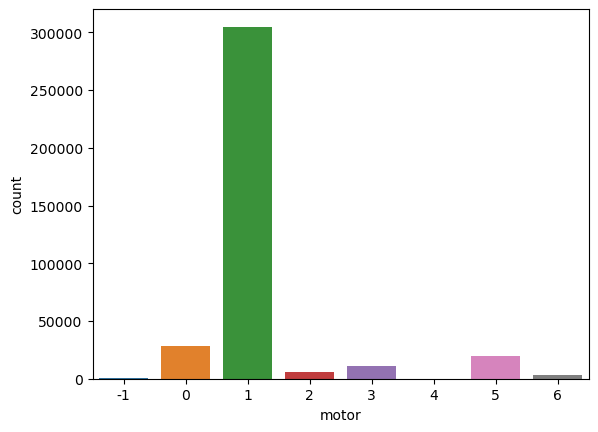

In [77]:
#Type de motorisation du véhicule au moment de l'accident
sns.countplot(x = "motor", data= vehicules)
plt.show()

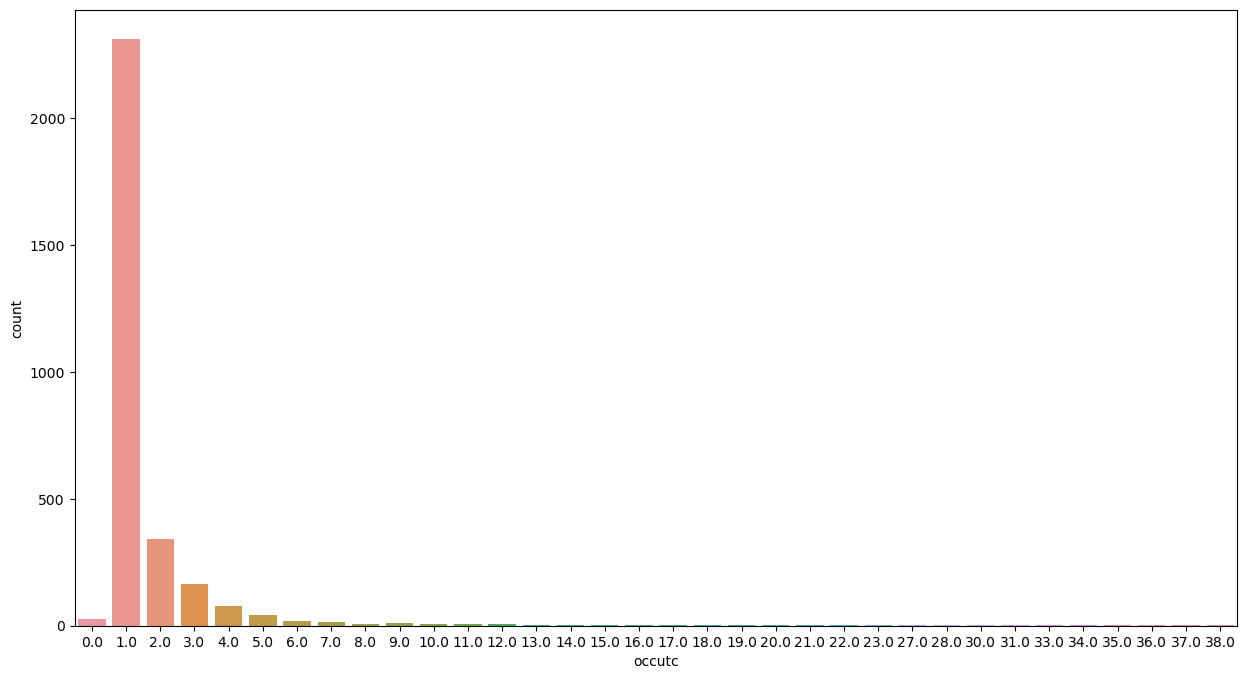

In [78]:
#Nombre d’occupants dans le transport en commun. au moment de l'accident
plt.figure(figsize=(15,8))
sns.countplot(x = "occutc", data= vehicules)
plt.show()

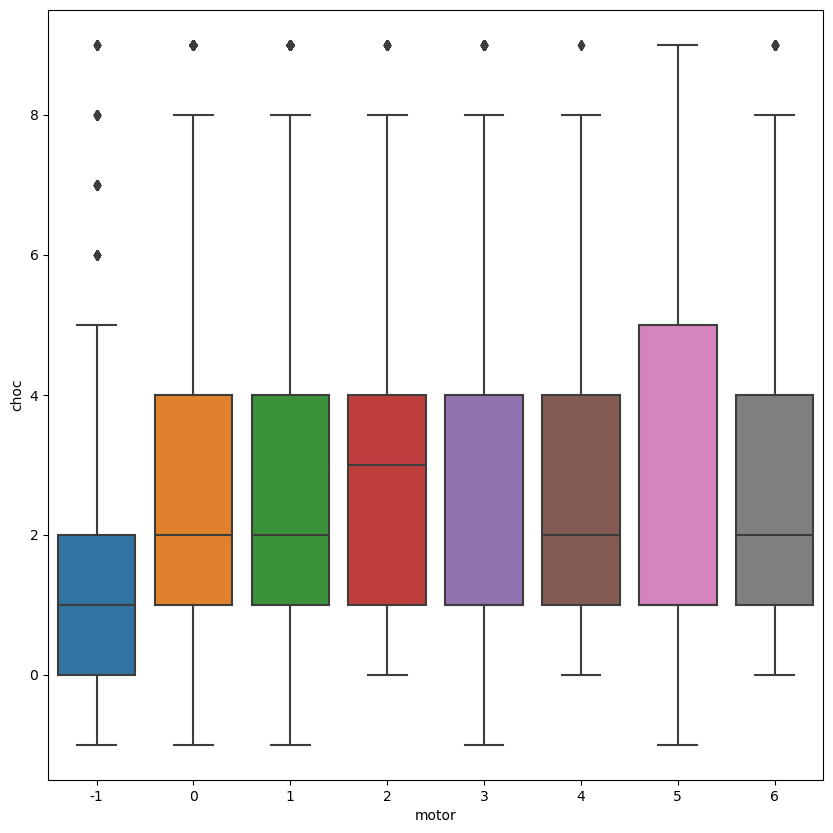

In [79]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "motor", y = "choc", data = vehicules)
plt.show()

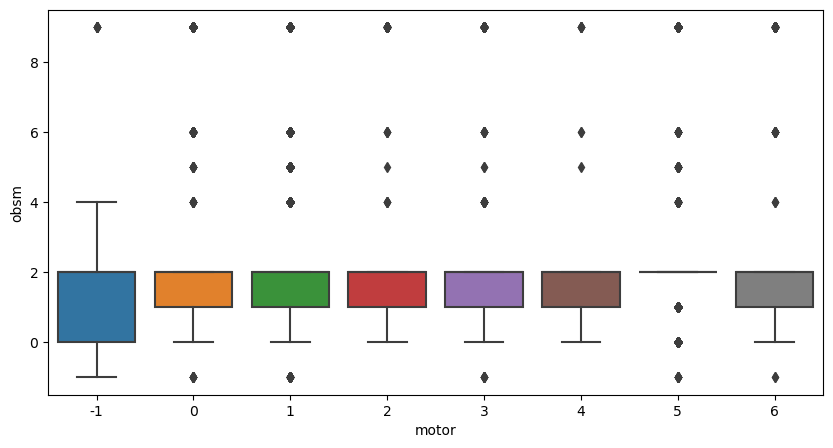

In [80]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "motor", y = "obsm", data = vehicules)
plt.show()

#plt.figure(figsize = (7,7))
#sns.boxplot(x = "motor", y = "obs", data = vehicules, hue = "sexe")
#plt.show()

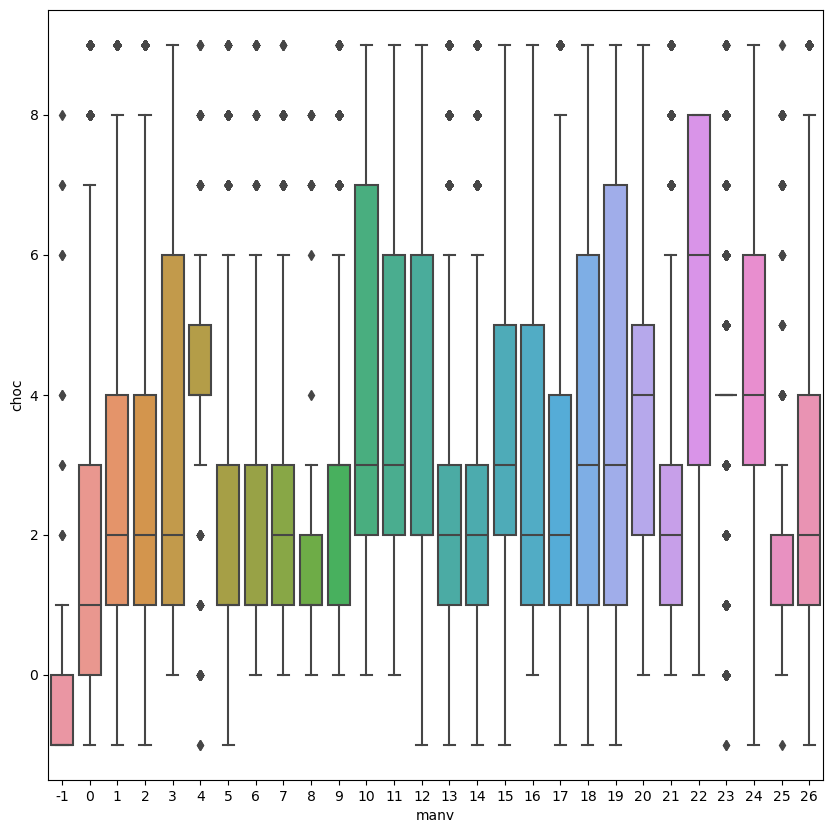

In [81]:
plt.figure(figsize = (10,10))
sns.boxplot(y = "choc", x = "manv", data = vehicules)
plt.show()

In [82]:
#Verifier s´il y´a des features non convertibles en float. dans les colonnes contenant des valeurs numeriques 
def isDecimal(text):
    try :
        float(text)
        return False
    except :
        return True
        
print(vehicules['Num_Acc'][vehicules['Num_Acc'].apply(isDecimal)].unique())
print(vehicules['id_vehicule'][vehicules['id_vehicule'].apply(isDecimal)].unique())
print(vehicules['num_veh'][vehicules['num_veh'].apply(isDecimal)].unique())
print(vehicules['senc'][vehicules['senc'].apply(isDecimal)].unique())
print(vehicules['catv'][vehicules['catv'].apply(isDecimal)].unique())
print(vehicules['obs'][vehicules['obs'].apply(isDecimal)].unique())
print(vehicules['obsm'][vehicules['obsm'].apply(isDecimal)].unique())
print(vehicules['choc'][vehicules['choc'].apply(isDecimal)].unique())
print(vehicules['manv'][vehicules['manv'].apply(isDecimal)].unique())
print(vehicules['motor'][vehicules['motor'].apply(isDecimal)].unique())
print(vehicules['occutc'][vehicules['occutc'].apply(isDecimal)].unique())
#print(vehicules['année_veh'][vehicules['année_veh'].apply(isDecimal)].unique()) 

[]
['138\xa0306\xa0524' '138\xa0306\xa0525' '138\xa0306\xa0523' ...
 '715\xa0632' '715\xa0629' '715\xa0630']
['B01' 'A01' 'C01' 'Z01' 'D01' 'E01' 'AB01' 'Y01' 'I01' 'T01' 'O01' 'G01'
 'F01' 'PB01' 'FB01' 'M01' 'LB01' 'H01' 'J01' 'K01' 'L01' 'CB01' 'X01'
 'N01' 'W01' 'U01' 'V01' 'MB01' 'RA01' 'TC01' 'R01' 'Q01' 'GB01' 'MA01'
 'VB01' 'RC01' 'BA01' 'TB01' '[01' '\\01' 'VF01' 'ZZ01' 'P01' 'DA01'
 'AA01' 'BB01' 'ZB01' 'BC01' 'LA01' 'NA01' 'SA01' 'CA01' 'PA01' 'EB01'
 'WB01' 'MC01' 'MV01' 'EA01' 'AY01' 'SB01' 'HB01' 'FA01' 'GA01' 'VA01'
 'CC01' 'IB01' 'DB01' 'HA01' 'XA01' 'TA01' 'IA01' 'YA01' 'KA01' 'KD01'
 'S01' ']01' 'WX01' 'XB01' 'JA01' 'RB01' 'UB01' 'OB01' 'ZA01']
[]
[]
[]
[]
[]
[]
[]
[]


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
#%matplotlib inline
import seaborn as sns

In [84]:
#Charger les databases vehicules
lieux_2019=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2019/lieux-2019.csv', sep=";")
lieux_2020=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2020/lieux-2020.csv', sep=";")
lieux_2021=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2021/lieux-2021.csv', sep=";")
lieux_2022=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2022/lieux-2022.csv', sep=";")

C:\Users\thfam\AppData\Local\Temp\ipykernel_23460\2386801024.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux_2022=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2022/lieux-2022.csv', sep=";")


In [85]:
lieux_2019.tail(2)

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
58838,201900058839,1,86,0.0,NaN,1,1,0,1,59,99,3,NaN,NaN,1,0,1,50
58839,201900058840,1,13,0.0,NaN,1,3,0,1,6,699,1,NaN,NaN,1,0,2,110


In [86]:
lieux_2022.tail(2)

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
55300,202200055301,3,18,-1,D,2,2,0,1,30,125,1,NaN,-1,1,0,1,80
55301,202200055302,3,NaN,-1,NaN,3,4,0,1,(1),(1),1,NaN,4,1,0,1,70


In [87]:
#Ajouter la colonne année

#lieux_2019.insert(loc=18, column="année_lie",value=2019)
#lieux_2020.insert(loc=18, column="année_lie",value=2020)
#lieux_2021.insert(loc=18, column="année_lie",value=2021)
#lieux_2022.insert(loc=18, column="année_lie",value=2022)

In [88]:
lieux_2022.head(2)

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,4,TEIL(vieille route du),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000002,4,NaN,0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50


In [89]:
lieux_2019.head(2)

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,201900000001,1,3,0.0,NaN,3,10,0,1,6,900,2,NaN,NaN,1,2,1,70
1,201900000002,1,1,0.0,NaN,1,2,0,4,3,845,2,NaN,NaN,1,0,1,70


In [90]:
#Creation de la datframe usagers par concaténation verticale
lieux= pd.concat([lieux_2019, lieux_2020, lieux_2021, lieux_2022], axis=0, ignore_index=True)

In [91]:
#Verifier les derniere lignes
lieux.tail()

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
218399,202200055298,3,71,-1.0,NaN,2,2,0,2,(1),(1),1,NaN,-1,1,0,8,80
218400,202200055299,3,973,-1.0,NaN,2,2,0,1,29,0,2,NaN,-1,1,0,3,80
218401,202200055300,3,22,0.0,D,2,2,0,1,39,553,2,NaN,-1,7,0,3,80
218402,202200055301,3,18,-1.0,D,2,2,0,1,30,125,1,NaN,-1,1,0,1,80
218403,202200055302,3,NaN,-1.0,NaN,3,4,0,1,(1),(1),1,NaN,4,1,0,1,70


In [92]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218404 entries, 0 to 218403
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  218404 non-null  int64  
 1   catr     218404 non-null  int64  
 2   voie     195330 non-null  object 
 3   v1       207658 non-null  float64
 4   v2       17276 non-null   object 
 5   circ     218404 non-null  int64  
 6   nbv      218404 non-null  object 
 7   vosp     218404 non-null  int64  
 8   prof     218404 non-null  int64  
 9   pr       218404 non-null  object 
 10  pr1      218404 non-null  object 
 11  plan     218404 non-null  int64  
 12  lartpc   496 non-null     object 
 13  larrout  159936 non-null  object 
 14  surf     218404 non-null  int64  
 15  infra    218404 non-null  int64  
 16  situ     218404 non-null  int64  
 17  vma      218404 non-null  int64  
dtypes: float64(1), int64(10), object(7)
memory usage: 30.0+ MB


In [93]:
# Tester la présence de doublons 
print(lieux.duplicated().sum())

0


In [94]:
# Afficher les doublons
lieux[lieux.duplicated()]

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma


In [95]:
# On compte le nombre de valeurs manquantes pour chaque COLONNE
lieux.isnull().sum(axis = 0)

Num_Acc         0
catr            0
voie        23074
v1          10746
v2         201128
circ            0
nbv             0
vosp            0
prof            0
pr              0
pr1             0
plan            0
lartpc     217908
larrout     58468
surf            0
infra           0
situ            0
vma             0
dtype: int64

In [96]:
#Tableau de valeurs manquantes par colonne
missing_values=lieux.isnull().sum()
missing_percent=(missing_values/len(lieux))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

         Missing Values  Percentage
Num_Acc               0    0.000000
catr                  0    0.000000
voie              23074   10.564825
v1                10746    4.920240
v2               201128   92.089888
circ                  0    0.000000
nbv                   0    0.000000
vosp                  0    0.000000
prof                  0    0.000000
pr                    0    0.000000
pr1                   0    0.000000
plan                  0    0.000000
lartpc           217908   99.772898
larrout           58468   26.770572
surf                  0    0.000000
infra                 0    0.000000
situ                  0    0.000000
vma                   0    0.000000


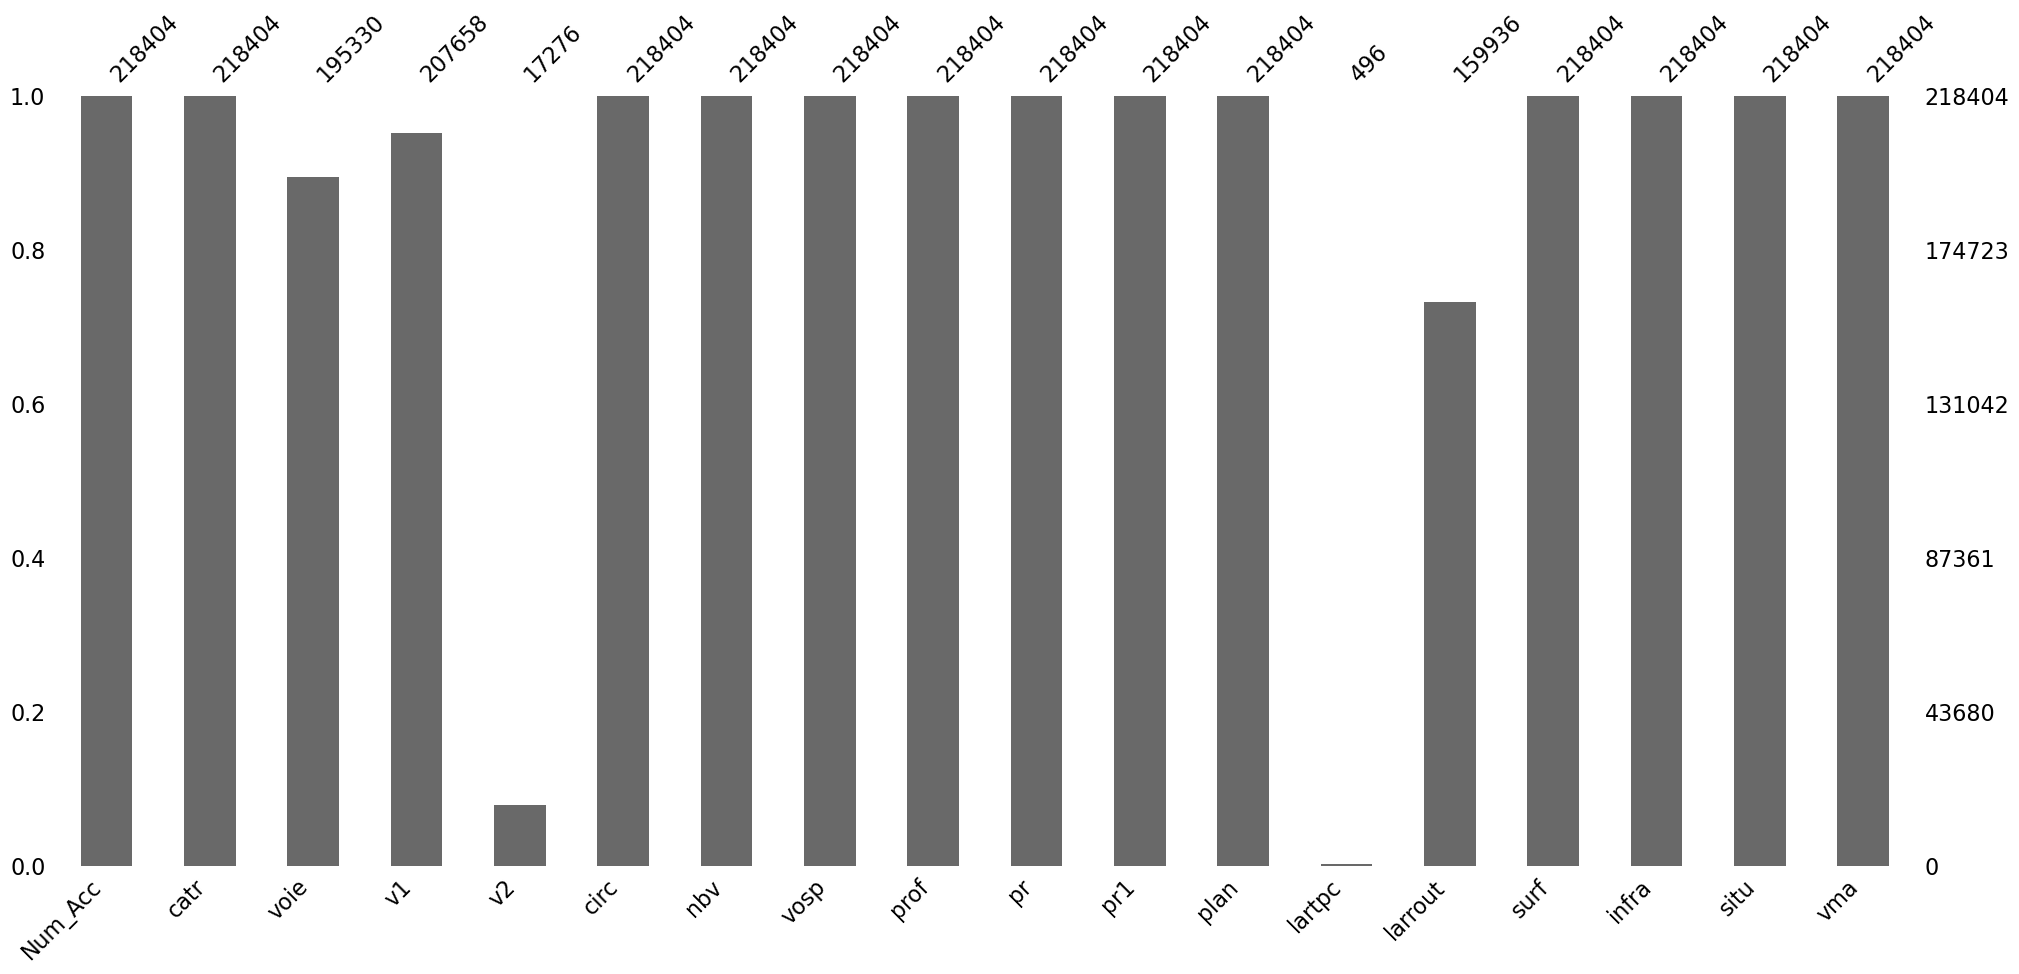

In [97]:
# visualiser les valeurs manquantes avec missingno bar
msno.bar(lieux)
plt.show()

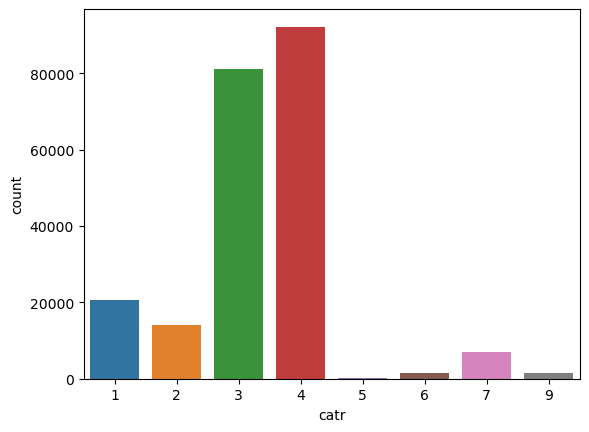

In [98]:
#Catégorie de route au moment de l'accident
sns.countplot(x = "catr", data= lieux)
plt.show()

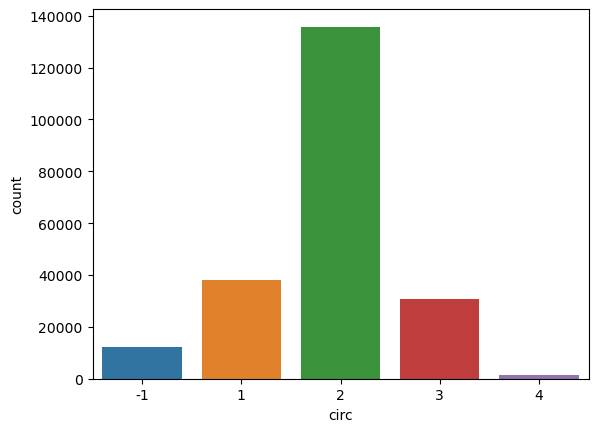

In [99]:
#Régime de circulation au moment de l'accident
sns.countplot(x = "circ", data= lieux)
plt.show()

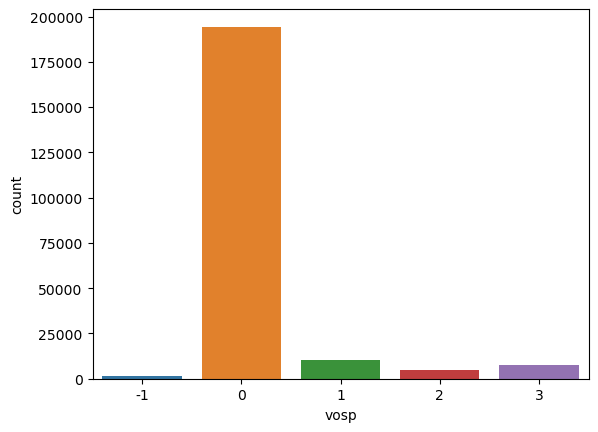

In [100]:
#Signale l’existence d’une voie réservée au moment de l'accident
sns.countplot(x = "vosp", data= lieux)
plt.show()

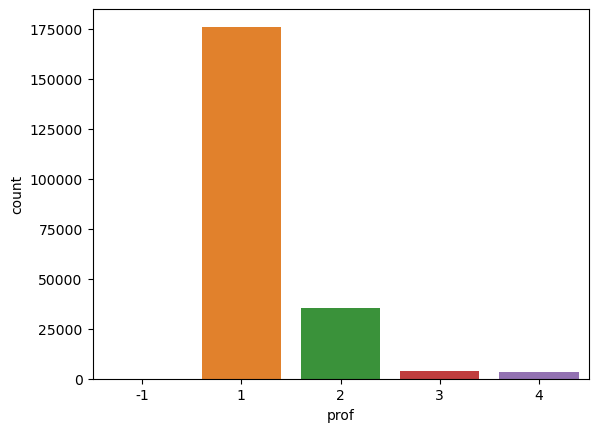

In [101]:
#Profil en long décrit la déclivité de la route au moment de l'accident
sns.countplot(x = "prof", data= lieux)
plt.show()

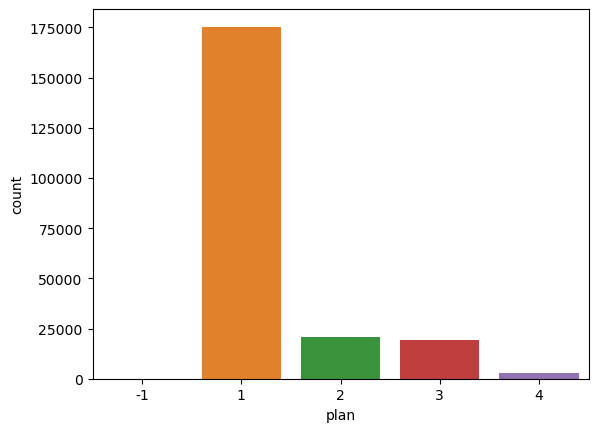

In [102]:
#Tracé en plan au moment de l'accident
sns.countplot(x = "plan", data= lieux)
plt.show()

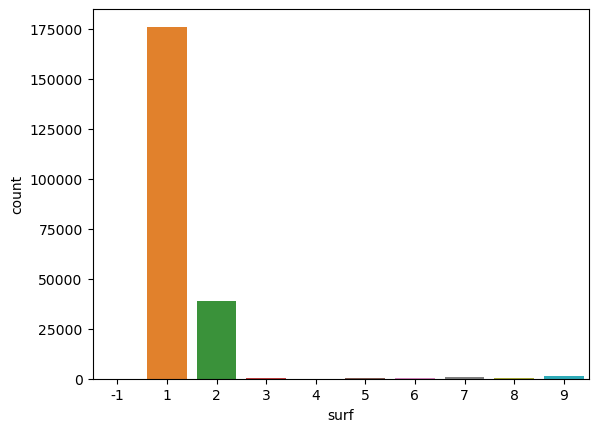

In [103]:
#Etat de la surface au moment de l'accident
sns.countplot(x = "surf", data= lieux)
plt.show()

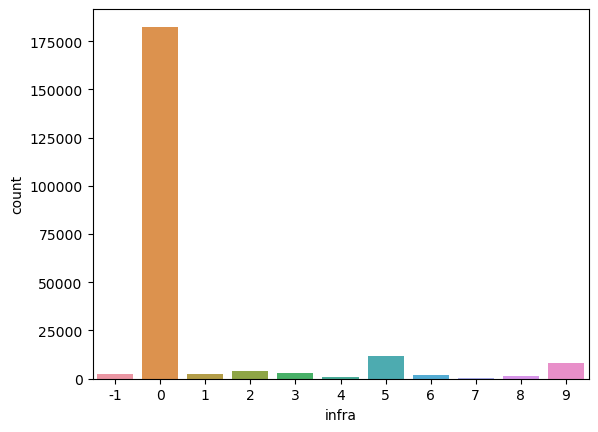

In [104]:
#Aménagement - Infrastructure au moment de l'accident
sns.countplot(x = "infra", data= lieux)
plt.show()

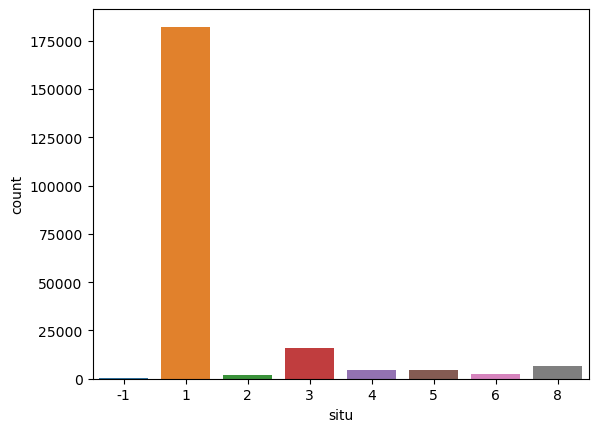

In [105]:
#Situation de l’accident au moment de l'accident
sns.countplot(x = "situ", data= lieux)
plt.show()

In [106]:
#Verifier s´il y´a des features non convertibles en float. dans les colonnes contenant des valeurs numeriques 
def isDecimal(text):
    try :
        float(text)
        return False
    except :
        return True
        
print(lieux['Num_Acc'][lieux['Num_Acc'].apply(isDecimal)].unique())
print(lieux['catr'][lieux['catr'].apply(isDecimal)].unique())
print(lieux['voie'][lieux['voie'].apply(isDecimal)].unique())
print(lieux['v1'][lieux['v1'].apply(isDecimal)].unique())
print(lieux['v2'][lieux['v2'].apply(isDecimal)].unique())
print(lieux['circ'][lieux['circ'].apply(isDecimal)].unique())
print(lieux['nbv'][lieux['nbv'].apply(isDecimal)].unique())
print(lieux['vosp'][lieux['vosp'].apply(isDecimal)].unique())
print(lieux['prof'][lieux['prof'].apply(isDecimal)].unique())
print(lieux['pr'][lieux['pr'].apply(isDecimal)].unique())
print(lieux['pr1'][lieux['pr1'].apply(isDecimal)].unique())
print(lieux['plan'][lieux['plan'].apply(isDecimal)].unique())
print(lieux['lartpc'][lieux['lartpc'].apply(isDecimal)].unique())
print(lieux['larrout'][lieux['larrout'].apply(isDecimal)].unique())
print(lieux['surf'][lieux['surf'].apply(isDecimal)].unique()) 
print(lieux['infra'][lieux['infra'].apply(isDecimal)].unique())
print(lieux['situ'][lieux['situ'].apply(isDecimal)].unique())
print(lieux['vma'][lieux['vma'].apply(isDecimal)].unique())

[]
[]
['FOCH (RUE DU MARECHAL)' 'BEAUJOLAIS (avenue du)' 'VICTOR HUGO(RUE)' ...
 'D165' 'DRA MARSEILLAISE RAPHELE' 'SAV']
[]
['INT' 'B' 'D' ' -' 'A' 'N' 'R' 'E' 'F' 'C' 'EXT' 'Z' 'I' 'X' 'W' 'Y' 'b'
 'G' 'V' 'U' 'L' 'M' 'H' 'T' 'S' 'P' 'O' 'K' 'II' '1A' 'IV' ' D' 'A1' 'CD'
 'VC' 'BIS' 'J' 'DV' 'AEROPORT' '.' 'ILES']
[]
['#ERREUR']
[]
[]
['(1)']
['(1)']
[]
['3,2' '2,5' '3,5' '1,5' '7,5' '5,7' '10,2' '8,8' '8,2' '2,8' '2,7' '6,1'
 '4,5' '6,5' '6,3' '1,6' '3,7' '12,5' '0,8' '6,8' '3,1' '5,25' '5,5' '0,4'
 '10,5']
['10,5' '3,5' '5,5' '13,5' '4,4' '5,6' '6,7' '6,5' '17,5' '7,8' '5,8'
 '6,6' '7,6' '6,8' '9,5' '5,4' '11,1' '3,2' '3,6' '12,5' '5,9' '4,7' '7,5'
 '3,9' '6,3' '5,3' '7,2' '5,2' '6,2' '2,5' '4,9' '5,1' '4,5' '6,4' '4,8'
 '5,7' '6,85' '8,5' '3,3' '4,3' '4,2' '2,6' '10,4' '2,8' '3,8' '2,4'
 '10,7' '10,3' '4,6' '7,3' '7,7' '6,1' '9,2' '6,9' '14,5' '4,1' '3,1'
 '11,4' '12,7' '11,5' '1,4' '10,8' '8,3' '8,8' '8,4' '7,4' '11,6' '8,2'
 '9,4' '3,4' '12,4' '9,3' '10,2' '4,15' '6,15' '4,75' '

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
#%matplotlib inline
import seaborn as sns

In [108]:
#Charger les databases caracteristiques

#caracteristiques_2005=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2005/caracteristiques_2005.csv', sep=";", encoding= "utf-8")


caracteristiques_2019=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2019/caracteristiques-2019.csv', sep=";")
caracteristiques_2020=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2020/caracteristiques-2020.csv', sep=";")
caracteristiques_2021=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2021/carcteristiques-2021.csv', sep=";")
caracteristiques_2022=pd.read_csv('C:/Training_DataScientist_MachineLearning/Projet/2022/carcteristiques-2022.csv', sep=";")

In [109]:
caracteristiques_2019.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
1,201900000002,30,11,2019,02:50,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000"
2,201900000003,28,11,2019,15:15,1,92,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744"
3,201900000004,30,11,2019,20:20,5,94,94069,1,1,1,4,A4,"48,8173295","2,4281502"
4,201900000005,30,11,2019,04:00,3,94,94028,1,1,1,2,A86 INT,"48,7763620","2,4332540"


In [110]:
#Ajouter la colonne année

#caracteristiques_2019.insert(loc=15, column="année_carac",value=2019)
#caracteristiques_2020.insert(loc=15, column="année_carac",value=2020)
#caracteristiques_2021.insert(loc=15, column="année_carac",value=2021)
#caracteristiques_2022.insert(loc=15, column="année_carac",value=2022)

In [111]:
caracteristiques_2019.head(2)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
1,201900000002,30,11,2019,02:50,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000"


In [112]:
caracteristiques_2020.head(2)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202000000001,7,3,2020,16:55,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
1,202000000002,7,3,2020,08:35,2,91,91657,2,9,7,6,MOUSSEAUX(CHEMIN),"48,6900000","2,4100000"


In [113]:
caracteristiques_2021.head(2)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000"
1,202100000002,25,9,2021,14:20,1,51,51544,1,3,1,3,Aire de repos croisement D20E9 après sortie D977,"49,2421290000","4,5545460000"


In [114]:
caracteristiques_2022.head(2)

,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000"
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000"


In [115]:
caracteristiques_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58840 entries, 0 to 58839
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  58840 non-null  int64 
 1   jour     58840 non-null  int64 
 2   mois     58840 non-null  int64 
 3   an       58840 non-null  int64 
 4   hrmn     58840 non-null  object
 5   lum      58840 non-null  int64 
 6   dep      58840 non-null  object
 7   com      58840 non-null  object
 8   agg      58840 non-null  int64 
 9   int      58840 non-null  int64 
 10  atm      58840 non-null  int64 
 11  col      58840 non-null  int64 
 12  adr      58413 non-null  object
 13  lat      58840 non-null  object
 14  long     58840 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.7+ MB


In [116]:
caracteristiques_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47744 entries, 0 to 47743
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  47744 non-null  int64 
 1   jour     47744 non-null  int64 
 2   mois     47744 non-null  int64 
 3   an       47744 non-null  int64 
 4   hrmn     47744 non-null  object
 5   lum      47744 non-null  int64 
 6   dep      47744 non-null  object
 7   com      47744 non-null  object
 8   agg      47744 non-null  int64 
 9   int      47744 non-null  int64 
 10  atm      47744 non-null  int64 
 11  col      47744 non-null  int64 
 12  adr      47387 non-null  object
 13  lat      47744 non-null  object
 14  long     47744 non-null  object
dtypes: int64(9), object(6)
memory usage: 5.5+ MB


In [117]:
caracteristiques_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56518 entries, 0 to 56517
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  56518 non-null  int64 
 1   jour     56518 non-null  int64 
 2   mois     56518 non-null  int64 
 3   an       56518 non-null  int64 
 4   hrmn     56518 non-null  object
 5   lum      56518 non-null  int64 
 6   dep      56518 non-null  object
 7   com      56518 non-null  object
 8   agg      56518 non-null  int64 
 9   int      56518 non-null  int64 
 10  atm      56518 non-null  int64 
 11  col      56518 non-null  int64 
 12  adr      55945 non-null  object
 13  lat      56518 non-null  object
 14  long     56518 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.5+ MB


In [118]:
#Changement de nom à la colonne 'Accident_Id'
caracteristiques_2022.rename(columns={'Accident_Id':'Num_Acc'}, inplace=True)
caracteristiques_2022.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long'],
      dtype='object')

In [119]:
caracteristiques_2022.head(2)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000"
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000"


In [120]:
caracteristiques_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55302 entries, 0 to 55301
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  55302 non-null  int64 
 1   jour     55302 non-null  int64 
 2   mois     55302 non-null  int64 
 3   an       55302 non-null  int64 
 4   hrmn     55302 non-null  object
 5   lum      55302 non-null  int64 
 6   dep      55302 non-null  object
 7   com      55302 non-null  object
 8   agg      55302 non-null  int64 
 9   int      55302 non-null  int64 
 10  atm      55302 non-null  int64 
 11  col      55302 non-null  int64 
 12  adr      54069 non-null  object
 13  lat      55302 non-null  object
 14  long     55302 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.3+ MB


In [121]:
#Creation de la datframe usagers par concaténation verticale
caracteristiques= pd.concat([caracteristiques_2019, caracteristiques_2020, caracteristiques_2021, caracteristiques_2022], axis=0, ignore_index=True)

In [122]:
# De la colonne hrmn creer deux nouvelles colonnes
new = caracteristiques["hrmn"].str.split(":", n=1, expand=True)
caracteristiques["hr"] = new[0]
caracteristiques["mn"] = new[1]

In [123]:
caracteristiques["hr"] = caracteristiques["hr"].astype('int64')
caracteristiques["mn"] = caracteristiques["mn"].astype('int64')

In [124]:
caracteristiques["hr"].unique()

array([ 1,  2, 15, 20,  4, 14,  7, 16, 18, 13,  8,  9,  6, 17, 10,  3, 12,
       11, 21, 19,  0,  5, 22, 23], dtype=int64)

In [125]:
caracteristiques["mn"].unique()

array([30, 50, 15, 20,  0,  3, 27, 40, 45, 10, 55,  5, 35, 12, 25, 59, 16,
       38, 34,  1, 11,  8, 51, 42, 32, 29, 36, 57, 28, 18, 56,  2, 49, 19,
        7, 43, 47, 26, 33, 24, 58, 44, 48, 13, 23, 39, 31, 37, 22, 46,  9,
       21,  4, 17, 53, 54,  6, 52, 14, 41], dtype=int64)

In [126]:
# Supprimer la colonne hrmn
caracteristiques.drop(columns=["hrmn"], inplace=True)

In [127]:
caracteristiques.head(2)

,Num_Acc,jour,mois,an,lum,dep,com,agg,int,atm,col,adr,lat,long,hr,mn
0,201900000001,30,11,2019,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
1,201900000002,30,11,2019,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000",2,50


In [128]:
caracteristiques.tail(2)

,Num_Acc,jour,mois,an,lum,dep,com,agg,int,atm,col,adr,lat,long,hr,mn
218402,202200055301,1,1,2022,1,81,81099,1,3,1,3,Chemin Toulze,"43,9272650000","1,9156370000",8,40
218403,202200055302,1,3,2022,1,41,41018,2,1,1,2,RD956 - Pont Charles De Gaulle,"47,5944040000","1,3533290000",16,55


In [129]:
usagers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494018 entries, 0 to 494181
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      494018 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  494018 non-null  object 
 3   num_veh      494018 non-null  object 
 4   place        494018 non-null  int64  
 5   catu         494018 non-null  int64  
 6   grav         494018 non-null  int64  
 7   sexe         494018 non-null  int64  
 8   an_nais      488077 non-null  float64
 9   trajet       494018 non-null  int64  
 10  secu1        494018 non-null  int64  
 11  secu2        494018 non-null  int64  
 12  secu3        494018 non-null  int64  
 13  locp         494018 non-null  int64  
 14  actp         494018 non-null  object 
 15  etatp        494018 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 64.1+ MB


In [130]:
vehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373584 entries, 0 to 373583
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      373584 non-null  int64  
 1   id_vehicule  373584 non-null  object 
 2   num_veh      373584 non-null  object 
 3   senc         373584 non-null  int64  
 4   catv         373584 non-null  int64  
 5   obs          373584 non-null  int64  
 6   obsm         373584 non-null  int64  
 7   choc         373584 non-null  int64  
 8   manv         373584 non-null  int64  
 9   motor        373584 non-null  int64  
 10  occutc       3074 non-null    float64
dtypes: float64(1), int64(8), object(2)
memory usage: 31.4+ MB


In [131]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218404 entries, 0 to 218403
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  218404 non-null  int64  
 1   catr     218404 non-null  int64  
 2   voie     195330 non-null  object 
 3   v1       207658 non-null  float64
 4   v2       17276 non-null   object 
 5   circ     218404 non-null  int64  
 6   nbv      218404 non-null  object 
 7   vosp     218404 non-null  int64  
 8   prof     218404 non-null  int64  
 9   pr       218404 non-null  object 
 10  pr1      218404 non-null  object 
 11  plan     218404 non-null  int64  
 12  lartpc   496 non-null     object 
 13  larrout  159936 non-null  object 
 14  surf     218404 non-null  int64  
 15  infra    218404 non-null  int64  
 16  situ     218404 non-null  int64  
 17  vma      218404 non-null  int64  
dtypes: float64(1), int64(10), object(7)
memory usage: 30.0+ MB


In [132]:
caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218404 entries, 0 to 218403
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Num_Acc  218404 non-null  int64 
 1   jour     218404 non-null  int64 
 2   mois     218404 non-null  int64 
 3   an       218404 non-null  int64 
 4   lum      218404 non-null  int64 
 5   dep      218404 non-null  object
 6   com      218404 non-null  object
 7   agg      218404 non-null  int64 
 8   int      218404 non-null  int64 
 9   atm      218404 non-null  int64 
 10  col      218404 non-null  int64 
 11  adr      215814 non-null  object
 12  lat      218404 non-null  object
 13  long     218404 non-null  object
 14  hr       218404 non-null  int64 
 15  mn       218404 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 26.7+ MB


In [133]:
caracteristiques.an.unique()

array([2019, 2020, 2021, 2022], dtype=int64)

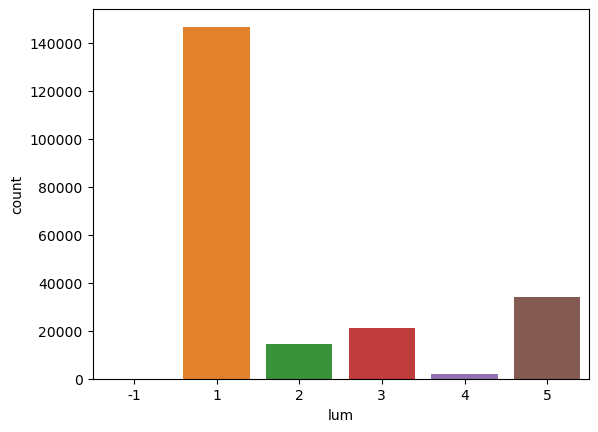

In [134]:
# conditions d’éclairage au moment de l'accident
sns.countplot(x = "lum", data= caracteristiques)
plt.show()

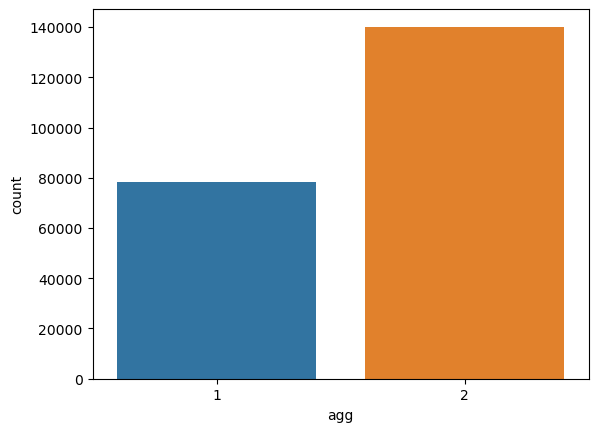

In [135]:
#Location au moment de l'accident
sns.countplot(x = "agg", data= caracteristiques)
plt.show()

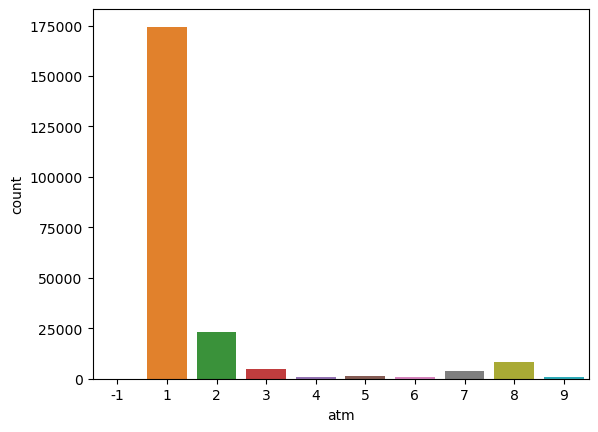

In [136]:
#Conditions atmosphériques au moment de l'accident
sns.countplot(x = "atm", data= caracteristiques)
plt.show()

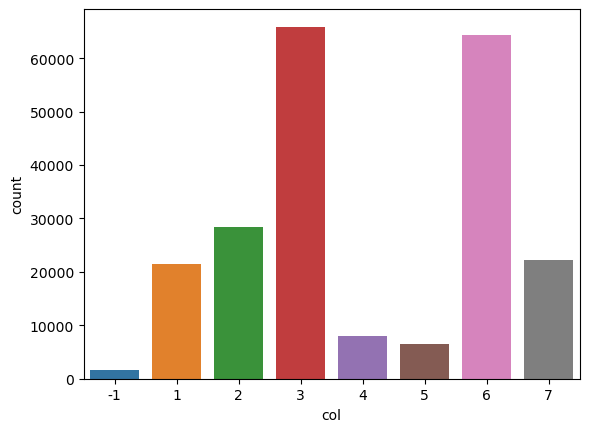

In [137]:
#Type de collision au moment de l'accident
sns.countplot(x = "col", data= caracteristiques)
plt.show()

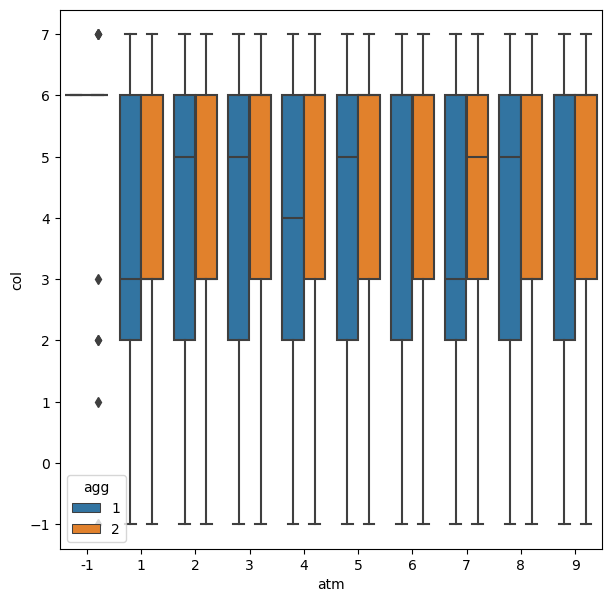

In [138]:
plt.figure(figsize = (7,7))
sns.boxplot(y = "col", x = "atm", data = caracteristiques, hue = "agg")
plt.show()

In [139]:
usagers.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,NaN,138 306 524,B01,2,2,4,2,2002.0,0,1,0,-1,-1,-1,-1
1,201900000001,NaN,138 306 524,B01,1,1,4,2,1993.0,5,1,0,-1,-1,-1,-1


In [140]:
vehicules.head(2)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN


In [141]:
lieux.head(2)

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,201900000001,1,3,0.0,NaN,3,10,0,1,6,900,2,NaN,NaN,1,2,1,70
1,201900000002,1,1,0.0,NaN,1,2,0,4,3,845,2,NaN,NaN,1,0,1,70


In [142]:
caracteristiques.head(2)

,Num_Acc,jour,mois,an,lum,dep,com,agg,int,atm,col,adr,lat,long,hr,mn
0,201900000001,30,11,2019,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
1,201900000002,30,11,2019,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000",2,50


In [143]:
lieux_caracteristiques= lieux.merge(right = caracteristiques, on = 'Num_Acc', how = 'outer')

In [144]:
lieux_caracteristiques.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,...,com,agg,int,atm,col,adr,lat,long,hr,mn
0,201900000001,1,3,0.0,NaN,3,10,0,1,6,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
1,201900000002,1,1,0.0,NaN,1,2,0,4,3,...,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000",2,50
2,201900000003,1,86,0.0,NaN,3,8,0,1,10,...,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744",15,15
3,201900000004,1,4,0.0,NaN,3,5,0,1,2,...,94069,1,1,1,4,A4,"48,8173295","2,4281502",20,20
4,201900000005,1,86,0.0,INT,1,3,0,1,41,...,94028,1,1,1,2,A86 INT,"48,7763620","2,4332540",4,0


In [145]:
lieux_caracteristiques.shape

(218404, 33)

In [146]:
lieux_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218404 entries, 0 to 218403
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  218404 non-null  int64  
 1   catr     218404 non-null  int64  
 2   voie     195330 non-null  object 
 3   v1       207658 non-null  float64
 4   v2       17276 non-null   object 
 5   circ     218404 non-null  int64  
 6   nbv      218404 non-null  object 
 7   vosp     218404 non-null  int64  
 8   prof     218404 non-null  int64  
 9   pr       218404 non-null  object 
 10  pr1      218404 non-null  object 
 11  plan     218404 non-null  int64  
 12  lartpc   496 non-null     object 
 13  larrout  159936 non-null  object 
 14  surf     218404 non-null  int64  
 15  infra    218404 non-null  int64  
 16  situ     218404 non-null  int64  
 17  vma      218404 non-null  int64  
 18  jour     218404 non-null  int64  
 19  mois     218404 non-null  int64  
 20  an       218404 non-null  

In [147]:
missing_values=lieux.isnull().sum()
missing_percent=(missing_values/len(lieux))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

         Missing Values  Percentage
Num_Acc               0    0.000000
catr                  0    0.000000
voie              23074   10.564825
v1                10746    4.920240
v2               201128   92.089888
circ                  0    0.000000
nbv                   0    0.000000
vosp                  0    0.000000
prof                  0    0.000000
pr                    0    0.000000
pr1                   0    0.000000
plan                  0    0.000000
lartpc           217908   99.772898
larrout           58468   26.770572
surf                  0    0.000000
infra                 0    0.000000
situ                  0    0.000000
vma                   0    0.000000


In [148]:
missing_values=caracteristiques.isnull().sum()
missing_percent=(missing_values/len(caracteristiques))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

         Missing Values  Percentage
Num_Acc               0    0.000000
jour                  0    0.000000
mois                  0    0.000000
an                    0    0.000000
lum                   0    0.000000
dep                   0    0.000000
com                   0    0.000000
agg                   0    0.000000
int                   0    0.000000
atm                   0    0.000000
col                   0    0.000000
adr                2590    1.185876
lat                   0    0.000000
long                  0    0.000000
hr                    0    0.000000
mn                    0    0.000000


In [149]:
missing_values=lieux_caracteristiques.isnull().sum()
missing_percent=(missing_values/len(lieux_caracteristiques))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

         Missing Values  Percentage
Num_Acc               0    0.000000
catr                  0    0.000000
voie              23074   10.564825
v1                10746    4.920240
v2               201128   92.089888
circ                  0    0.000000
nbv                   0    0.000000
vosp                  0    0.000000
prof                  0    0.000000
pr                    0    0.000000
pr1                   0    0.000000
plan                  0    0.000000
lartpc           217908   99.772898
larrout           58468   26.770572
surf                  0    0.000000
infra                 0    0.000000
situ                  0    0.000000
vma                   0    0.000000
jour                  0    0.000000
mois                  0    0.000000
an                    0    0.000000
lum                   0    0.000000
dep                   0    0.000000
com                   0    0.000000
agg                   0    0.000000
int                   0    0.000000
atm                   0    0

In [150]:
vehicules_lieux_caracteristiques= vehicules.merge(right = lieux_caracteristiques, on = 'Num_Acc', how = 'outer')

In [151]:
vehicules_lieux_caracteristiques.head(2)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,...,com,agg,int,atm,col,adr,lat,long,hr,mn
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30


In [152]:
usagers.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,NaN,138 306 524,B01,2,2,4,2,2002.0,0,1,0,-1,-1,-1,-1
1,201900000001,NaN,138 306 524,B01,1,1,4,2,1993.0,5,1,0,-1,-1,-1,-1


In [153]:
print(usagers.shape)
print(vehicules.shape)
print(caracteristiques.shape)
print(lieux.shape)
print(lieux_caracteristiques.shape)
print(vehicules_lieux_caracteristiques.shape)

(494018, 16)
(373584, 11)
(218404, 16)
(218404, 18)
(218404, 33)
(373584, 43)


In [154]:
usagers_vehicules_lieux_caracteristiques= usagers.merge(right = vehicules_lieux_caracteristiques, on = ['Num_Acc', 'id_vehicule', 'num_veh'], how = 'outer')

In [155]:
usagers_vehicules_lieux_caracteristiques.head(2)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,...,com,agg,int,atm,col,adr,lat,long,hr,mn
0,201900000001,NaN,138 306 524,B01,2.0,2.0,4.0,2.0,2002.0,0.0,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
1,201900000001,NaN,138 306 524,B01,1.0,1.0,4.0,2.0,1993.0,5.0,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30


In [156]:
print(usagers_vehicules_lieux_caracteristiques.shape)

(497963, 56)


In [157]:
usagers_vehicules_lieux_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497963 entries, 0 to 497962
Data columns (total 56 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      497963 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  497963 non-null  object 
 3   num_veh      497963 non-null  object 
 4   place        494018 non-null  float64
 5   catu         494018 non-null  float64
 6   grav         494018 non-null  float64
 7   sexe         494018 non-null  float64
 8   an_nais      488077 non-null  float64
 9   trajet       494018 non-null  float64
 10  secu1        494018 non-null  float64
 11  secu2        494018 non-null  float64
 12  secu3        494018 non-null  float64
 13  locp         494018 non-null  float64
 14  actp         494018 non-null  object 
 15  etatp        494018 non-null  float64
 16  senc         497963 non-null  int64  
 17  catv         497963 non-null  int64  
 18  obs          497963 non-

In [158]:
missing_values=usagers_vehicules_lieux_caracteristiques.isnull().sum()
missing_percent=(missing_values/len(usagers_vehicules_lieux_caracteristiques))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

             Missing Values  Percentage
Num_Acc                   0    0.000000
id_usager            242053   48.608632
id_vehicule               0    0.000000
num_veh                   0    0.000000
place                  3945    0.792228
catu                   3945    0.792228
grav                   3945    0.792228
sexe                   3945    0.792228
an_nais                9886    1.985288
trajet                 3945    0.792228
secu1                  3945    0.792228
secu2                  3945    0.792228
secu3                  3945    0.792228
locp                   3945    0.792228
actp                   3945    0.792228
etatp                  3945    0.792228
senc                      0    0.000000
catv                      0    0.000000
obs                       0    0.000000
obsm                      0    0.000000
choc                      0    0.000000
manv                      0    0.000000
motor                     0    0.000000
occutc               491812   98.764768


In [159]:
#Verifier les doublons
print(usagers_vehicules_lieux_caracteristiques.duplicated().sum())


0


In [160]:
#Verifier les doublons
usagers_vehicules_lieux_caracteristiques[usagers_vehicules_lieux_caracteristiques.duplicated()]

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,...,com,agg,int,atm,col,adr,lat,long,hr,mn


In [161]:
usagers_vehicules_lieux_caracteristiques

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,...,com,agg,int,atm,col,adr,lat,long,hr,mn
0,201900000001,NaN,138 306 524,B01,2.0,2.0,4.0,2.0,2002.0,0.0,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
1,201900000001,NaN,138 306 524,B01,1.0,1.0,4.0,2.0,1993.0,5.0,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
2,201900000001,NaN,138 306 525,A01,1.0,1.0,1.0,1.0,1959.0,0.0,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
3,201900000002,NaN,138 306 523,A01,1.0,1.0,4.0,2.0,1994.0,0.0,...,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000",2,50
4,201900000003,NaN,138 306 520,A01,1.0,1.0,1.0,1.0,1996.0,0.0,...,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744",15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497958,202100022987,NaN,160 540,B01,NaN,NaN,NaN,NaN,NaN,NaN,...,14060,1,1,1,6,D515,"49,2370260000","-0,2905050000",18,30
497959,202100040202,NaN,129 739,B01,NaN,NaN,NaN,NaN,NaN,NaN,...,14167,2,1,1,3,D226,"49,2022210000","-0,3065700000",18,30
497960,202100040933,NaN,128 454,C01,NaN,NaN,NaN,NaN,NaN,NaN,...,14118,2,2,1,6,Rue Eugène Boudin,"49,1939000000","-0,3844000000",20,25
497961,202100044328,NaN,122 431,A01,NaN,NaN,NaN,NaN,NaN,NaN,...,14191,2,6,1,2,D79,"49,3223279825","-0,4558146000",10,30


In [162]:
usagers_vehicules_lieux_caracteristiques.adr.unique()

array(['AUTOROUTE A3', 'AUTOROUTE A1', 'AUTOROUTE A86', ..., 'd742',
       'RT1 - Col des arabes', 'RD956 - Pont Charles De Gaulle'],
      dtype=object)

In [163]:
usagers_vehicules_lieux_caracteristiques.adr.value_counts()

adr
A4                                2911
AUTOROUTE A86                     2879
AUTOROUTE A1                      2633
A13                               2522
AUTOROUTE A3                      2188
                                  ... 
roue de la Pointe des Châteaux       1
LAMINEURS (RUE DES)                  1
2942 Route Océane                    1
La Trinité - RD 7                    1
ESCARPE (RUE DE L')                  1
Name: count, Length: 87731, dtype: int64

In [164]:
usagers_vehicules_lieux_caracteristiques.adr.mode()

0    A4
Name: adr, dtype: object

In [165]:
df=usagers_vehicules_lieux_caracteristiques

In [166]:
df.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,...,com,agg,int,atm,col,adr,lat,long,hr,mn
0,201900000001,NaN,138 306 524,B01,2.0,2.0,4.0,2.0,2002.0,0.0,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
1,201900000001,NaN,138 306 524,B01,1.0,1.0,4.0,2.0,1993.0,5.0,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
2,201900000001,NaN,138 306 525,A01,1.0,1.0,1.0,1.0,1959.0,0.0,...,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30
3,201900000002,NaN,138 306 523,A01,1.0,1.0,4.0,2.0,1994.0,0.0,...,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000",2,50
4,201900000003,NaN,138 306 520,A01,1.0,1.0,1.0,1.0,1996.0,0.0,...,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744",15,15


In [167]:
df['date_obj'] = pd.to_datetime(df['an'].astype(str)+ '-' 
                                + df['mois'].astype(str) + '-' + df['jour'].astype(str))
df['weekday'] = df['date_obj'].apply(lambda x: x.weekday())
df.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,...,int,atm,col,adr,lat,long,hr,mn,date_obj,weekday
0,201900000001,NaN,138 306 524,B01,2.0,2.0,4.0,2.0,2002.0,0.0,...,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30,2019-11-30,5
1,201900000001,NaN,138 306 524,B01,1.0,1.0,4.0,2.0,1993.0,5.0,...,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30,2019-11-30,5
2,201900000001,NaN,138 306 525,A01,1.0,1.0,1.0,1.0,1959.0,0.0,...,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,30,2019-11-30,5
3,201900000002,NaN,138 306 523,A01,1.0,1.0,4.0,2.0,1994.0,0.0,...,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000",2,50,2019-11-30,5
4,201900000003,NaN,138 306 520,A01,1.0,1.0,1.0,1.0,1996.0,0.0,...,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744",15,15,2019-11-28,3


In [168]:
df.weekday.value_counts()

weekday
4    82127
5    73578
3    71663
2    70919
1    70557
0    66571
6    62548
Name: count, dtype: int64

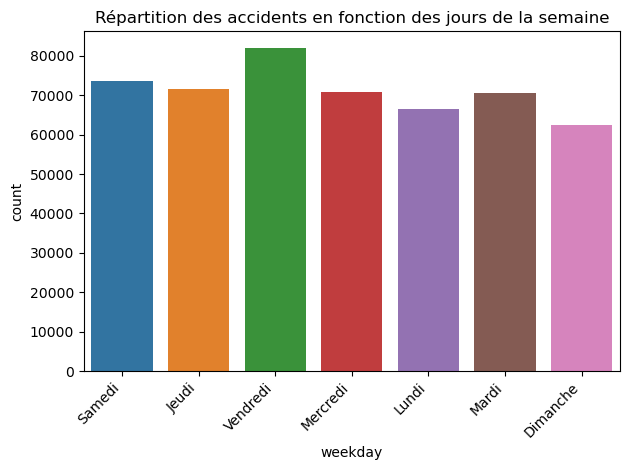

In [169]:
df_mod = df.copy()
df_mod['weekday'] = df_mod['weekday'].replace({
   0: 'Lundi',
   1: 'Mardi',
   2: 'Mercredi',
   3: 'Jeudi',
   4: 'Vendredi',
   5: 'Samedi',
   6: 'Dimanche'
})

# Afficher la répartition des accidents en fonction du jour de la semaine avec Seaborn
sns.countplot(x='weekday', data=df_mod)

# Personnaliser les étiquettes de l'axe x avec rotation oblique
plt.xticks(rotation=45, ha='right')  # Rotation de 45 degrés, alignées à droite

# Ajouter un titre au graphique
plt.title('Répartition des accidents en fonction des jours de la semaine')

# Afficher le graphique
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show()

On constate que c´est le vendredi qu´il ya le plus d´accident et 
que c´est le dimanche qu´il y en a le moins

In [171]:
df.hr.unique()

array([ 1,  2, 15, 20,  4, 14,  7, 16, 18, 13,  8,  9,  6, 17, 10,  3, 12,
       11, 21, 19,  0,  5, 22, 23], dtype=int64)

In [172]:
df.mn.unique()

array([30, 50, 15, 20,  0,  3, 27, 40, 45, 10, 55,  5, 35, 12, 25, 59, 16,
       38, 34,  1, 11,  8, 51, 42, 32, 29, 36, 57, 28, 18, 56,  2, 49, 19,
        7, 43, 47, 26, 33, 24, 58, 44, 48, 13, 23, 39, 31, 37, 22, 46,  9,
       21,  4, 17, 53, 54,  6, 52, 14, 41], dtype=int64)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497963 entries, 0 to 497962
Data columns (total 58 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Num_Acc      497963 non-null  int64         
 1   id_usager    255910 non-null  object        
 2   id_vehicule  497963 non-null  object        
 3   num_veh      497963 non-null  object        
 4   place        494018 non-null  float64       
 5   catu         494018 non-null  float64       
 6   grav         494018 non-null  float64       
 7   sexe         494018 non-null  float64       
 8   an_nais      488077 non-null  float64       
 9   trajet       494018 non-null  float64       
 10  secu1        494018 non-null  float64       
 11  secu2        494018 non-null  float64       
 12  secu3        494018 non-null  float64       
 13  locp         494018 non-null  float64       
 14  actp         494018 non-null  object        
 15  etatp        494018 non-null  floa

In [174]:
#df['hour'] = df['duration'].dt.components.hours
#df['min'] = df['duration'].dt.components.minutes

In [175]:
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

             Missing Values  Percentage
Num_Acc                   0    0.000000
id_usager            242053   48.608632
id_vehicule               0    0.000000
num_veh                   0    0.000000
place                  3945    0.792228
catu                   3945    0.792228
grav                   3945    0.792228
sexe                   3945    0.792228
an_nais                9886    1.985288
trajet                 3945    0.792228
secu1                  3945    0.792228
secu2                  3945    0.792228
secu3                  3945    0.792228
locp                   3945    0.792228
actp                   3945    0.792228
etatp                  3945    0.792228
senc                      0    0.000000
catv                      0    0.000000
obs                       0    0.000000
obsm                      0    0.000000
choc                      0    0.000000
manv                      0    0.000000
motor                     0    0.000000
occutc               491812   98.764768


# Detecter les valeurs non convertibles en numerique dans la colonne "dep"

In [177]:
#Convertir la variable en float
dep_converted_values = pd.to_numeric(df['dep'], errors='coerce')

In [178]:
# Trouver les valeurs non convertibles en float
dep_non_convertible_values = df['dep'][dep_converted_values.isna()]

In [179]:
dep_non_convertible_values

45        2B
46        2B
47        2B
48        2B
49        2B
          ..
497270    2B
497296    2B
497674    2B
497729    2A
497915    2A
Name: dep, Length: 5112, dtype: object

In [180]:
dep_non_convertible_values.unique()

array(['2B', '2A'], dtype=object)

# Detecter les valeurs non convertibles en numerique dans la colonne "com"

In [182]:
#Convertir la variable en float
com_converted_values = pd.to_numeric(df['com'], errors='coerce')

In [183]:
# Trouver les valeurs non convertibles en float
com_non_convertible_values = df['com'][com_converted_values.isna()]

In [184]:
df['com'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 497963 entries, 0 to 497962
Series name: com
Non-Null Count   Dtype 
--------------   ----- 
497963 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [185]:
com_non_convertible_values.unique()

array(['2B033', '2A004', '2B148', '2B050', '2B286', '2B134', '2B120',
       '2B037', '2A189', '2A212', '2B096', '2B305', '2B009', '2A085',
       '2B207', '2B320', '2A362', '2B023', '2B123', '2B315', '2B150',
       '2B049', '2B246', '2B319', '2B077', '2A139', '2A130', '2B341',
       '2B332', '2B185', '2B166', '2A215', '2A209', '2A249', '2A266',
       '2A271', '2B343', '2A288', '2B335', '2B087', '2B303', '2B205',
       '2B314', '2B109', '2B187', '2B355', '2B042', '2A247', '2A272',
       '2A269', '2B283', '2B164', '2B309', '2B350', '2B057', '2B169',
       '2B342', '2B220', '2A048', '2B251', '2A330', '2B143', '2A017',
       '2B121', '2B195', '2B093', '2B307', '2A276', '2B083', '2A041',
       '2B337', '2B029', '2A331', '2B302', '2B145', '2A092', '2A348',
       '2B298', '2B346', '2B250', '2B248', '2A258', '2A006', '2B354',
       '2B316', '2B281', '2B043', '2A065', '2B178', '2B223', '2B252',
       '2A032', '2A228', '2B313', '2A104', '2A098', '2A198', '2A064',
       '2B188', '2B0

# Convertir en numerique les valeurs non convertibles dans la colonne "dep"

Nous allons remplacer le "A" et le "B" dans ces valeurs non convertibles par leurs correspondants en ASCII

In [188]:
df.dep.replace(['2A', '2B'],['265', '266'], inplace=True)

In [189]:
df.dep.unique()

array(['93', '92', '94', '87', '69', '38', '34', '13', '988', '976',
       '974', '972', '266', '91', '86', '83', '80', '78', '77', '76',
       '72', '71', '67', '66', '64', '60', '51', '50', '49', '45', '37',
       '35', '33', '31', '30', '29', '22', '19', '18', '17', '74', '81',
       '2', '59', '95', '63', '62', '973', '265', '84', '9', '73', '43',
       '10', '36', '16', '7', '21', '40', '24', '4', '85', '27', '28',
       '52', '68', '42', '82', '11', '987', '44', '61', '14', '56', '58',
       '54', '47', '41', '3', '75', '1', '57', '32', '39', '15', '23',
       '6', '5', '26', '48', '986', '971', '89', '25', '12', '88', '65',
       '53', '70', '46', '90', '8', '79', '977', '55', '978', '975', '06',
       '03', '07', '01', '08', '02', '05', '04', '09'], dtype=object)

# Convertir en numerique les valeurs non convertibles dans la colonne "com"

Nous allons remplacer le "A" et le "B" dans ces valeurs non convertibles par leurs correspondants en ASCII

In [192]:
# Fonction pour remplacer les A et B par leur ASCII
def remplace_A_et_B_par_ascii(string):
    if not string or not isinstance(string, str):
        return string

    lettre_en_ascii = {'A': ord('A'), 'B': ord('B')}

    replaced_string = ''
    for char in string:
        if char in lettre_en_ascii:
            replaced_string += str(lettre_en_ascii[char])
        else:
            replaced_string += char

    return replaced_string

In [193]:
# Appliquer cette fonction
df['com'] = df['com'].apply(remplace_A_et_B_par_ascii)

In [194]:
#faire des tests
print(df['com'])
df['com'].info()

0         93053
1         93053
2         93053
3         93066
4         92036
          ...  
497958    14060
497959    14167
497960    14118
497961    14191
497962    91421
Name: com, Length: 497963, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 497963 entries, 0 to 497962
Series name: com
Non-Null Count   Dtype 
--------------   ----- 
497963 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [195]:
#print('----------------------------------------------------------')

In [196]:
df['com'].unique()

array(['93053', '93066', '92036', ..., '70414', '63360', '266293'],
      dtype=object)

# Suppression de certaines variables
Les variables **occutc, v2** et **lartpc** contiennent beaucoup de valeurs manquantes: plus de 90%. 
Les variables **adr** et **voie** peuvent etre aussi supprimé car les informations contenues dans 
les variables **lat** et **long** nous permettent de situer exactement le lieu de l´accident

In [198]:
df = df.drop(["occutc", "v2",  "lartpc", "adr",  "voie"], axis=1)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497963 entries, 0 to 497962
Data columns (total 53 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Num_Acc      497963 non-null  int64         
 1   id_usager    255910 non-null  object        
 2   id_vehicule  497963 non-null  object        
 3   num_veh      497963 non-null  object        
 4   place        494018 non-null  float64       
 5   catu         494018 non-null  float64       
 6   grav         494018 non-null  float64       
 7   sexe         494018 non-null  float64       
 8   an_nais      488077 non-null  float64       
 9   trajet       494018 non-null  float64       
 10  secu1        494018 non-null  float64       
 11  secu2        494018 non-null  float64       
 12  secu3        494018 non-null  float64       
 13  locp         494018 non-null  float64       
 14  actp         494018 non-null  object        
 15  etatp        494018 non-null  floa

In [200]:
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

             Missing Values  Percentage
Num_Acc                   0    0.000000
id_usager            242053   48.608632
id_vehicule               0    0.000000
num_veh                   0    0.000000
place                  3945    0.792228
catu                   3945    0.792228
grav                   3945    0.792228
sexe                   3945    0.792228
an_nais                9886    1.985288
trajet                 3945    0.792228
secu1                  3945    0.792228
secu2                  3945    0.792228
secu3                  3945    0.792228
locp                   3945    0.792228
actp                   3945    0.792228
etatp                  3945    0.792228
senc                      0    0.000000
catv                      0    0.000000
obs                       0    0.000000
obsm                      0    0.000000
choc                      0    0.000000
manv                      0    0.000000
motor                     0    0.000000
catr                      0    0.000000


In [201]:
df.actp.unique()

array([' -1', '0', '3', '2', '1', 'B', '4', '9', '5', 'A', '8', '6', '7',
       nan], dtype=object)

# 1. Modification et conversion de certaines variables

## Modification de la variable actp
les valeurs "A" et "B" de cette variable doivent etre remplacé par "10" et "11"

In [204]:
df.actp.unique()

array([' -1', '0', '3', '2', '1', 'B', '4', '9', '5', 'A', '8', '6', '7',
       nan], dtype=object)

In [205]:
df.actp.replace(['A', 'B'],['10', '11'], inplace=True)

In [206]:
df.actp.unique()

array([' -1', '0', '3', '2', '1', '11', '4', '9', '5', '10', '8', '6',
       '7', nan], dtype=object)

## conversion de la variable actp

In [208]:
df.actp = pd.to_numeric(df.actp, errors='coerce').astype('Int64')

In [209]:
df.actp.unique()

<IntegerArray>
[-1, 0, 3, 2, 1, 11, 4, 9, 5, 10, 8, 6, 7, <NA>]
Length: 14, dtype: Int64

In [210]:
#df.actp = df.actp.astype(int)

## Modification de la variable nbv

In [212]:
df.nbv.unique()

array([10, 2, 8, 5, 3, 4, 6, 1, 7, 0, -1, 9, 11, 12, '2', '1', '4', '3',
       '6', '0', '9', '8', ' -1', '5', '7', '12', '10', '#ERREUR', '11'],
      dtype=object)

La valeur "#ERREUR" de cette variable doit etre remplacé par "nan"

In [214]:
df.nbv.replace('#ERREUR', np.nan, inplace=True)

In [215]:
df.nbv.unique()

array([10, 2, 8, 5, 3, 4, 6, 1, 7, 0, -1, 9, 11, 12, '2', '1', '4', '3',
       '6', '0', '9', '8', ' -1', '5', '7', '12', '10', nan, '11'],
      dtype=object)

## conversion de la variable nbv

In [217]:
df.nbv = pd.to_numeric(df.nbv, errors='coerce').astype('Int64')

In [218]:
df.nbv.unique()

<IntegerArray>
[10, 2, 8, 5, 3, 4, 6, 1, 7, 0, -1, 9, 11, 12, <NA>]
Length: 15, dtype: Int64

## Modification de la variable pr

In [220]:
#df.pr.unique()

In [221]:
df.pr.replace('(1)', '1', inplace=True)

In [222]:
df.pr.unique()

array(['6', '3', '10', '2', '41', '0', '1', '59', '51', '53', '1234',
       '25', '13', '19', '4', '15', '49', '18', '7', '11', '9', '20',
       '35', '58', '16', '97', '27', '61', '12', '37', '24', '22', '21',
       '32', '33', '28', '8', '198', '231', '102', '174', '185', '460',
       '172', '44', '29', '72', '76', '40', '75', '74', '87', '5', '14',
       '70', '77', '43', '30', '89', '100', '73', '109', '50', '98', '31',
       '39', '57', '52', '126', '66', '62', '1000', '141', '83', '197',
       '46', '17', '34', '122', '101', '327', '319', '138', '48', '84',
       '123', '54', '71', '155', '23', '175', '213', '47', '189', '42',
       '116', '85', '68', '56', '26', '55', '240', '161', '499', '63',
       '36', '115', '134', '279', '65', '60', '45', '38', '274', '265',
       '264', '263', '266', '277', '275', '271', '67', '69', '450', '430',
       '334', '324', '255', '304', '533', '541', '540', '93', '112',
       '315', '160', '257', '191', '187', '142', '106', '114', '

## conversion de la variable pr

In [224]:
df.pr = pd.to_numeric(df.pr, errors='coerce').astype('Int64')

In [225]:
df.pr.unique()

<IntegerArray>
[   6,    3,   10,    2,   41,    0,    1,   59,   51,   53,
 ...
  508,  436,  371,  507, 1414, 1271,  506,  800, 2883,  477]
Length: 631, dtype: Int64

## Modification de la variable pr1

In [227]:
print(df.pr1)

0         900
1         900
2         900
3         845
4         500
         ... 
497958    (1)
497959      0
497960      0
497961    (1)
497962    100
Name: pr1, Length: 497963, dtype: object


In [228]:
df.pr1.unique()

array(['900', '845', '500', ..., '1535', '1720', '1307'], dtype=object)

In [229]:
df.pr1.replace('(1)', '1', inplace=True)

In [230]:
df.pr1.unique()

array(['900', '845', '500', ..., '1535', '1720', '1307'], dtype=object)

## Conversion de la variable pr1

In [232]:
df.pr1 = pd.to_numeric(df.pr1, errors='coerce').astype('Int64')

In [233]:
df.pr1.unique()

<IntegerArray>
[ 900,  845,  500,  299,    0,    1,  799,  600,  605,  790,
 ...
 1299, 3230, 1248, 1092, 2450, 1062, 3304, 1535, 1720, 1307]
Length: 1472, dtype: Int64

## Modification de la variable larrout

In [235]:
df.larrout.unique()

array([nan, 65.0, 7.0, 5.8, 4.8, 4.2, 4.6, 140.0, 5.4, 68.0, 49.0, 55.0,
       70.0, 58.0, 3.1, 35.0, 64.0, 13.85, 80.0, 2.8, 6.3,
       8.599999999999998, 5.6, 14.0, 3.6, 6.2, 90.0, 78.0, 57.0, 3.8, 4.7,
       180.0, 54.0, 79.0, 6.0, 5.9, 4.1, 5.2, 190.0, 105.0, 110.0, 47.0,
       9.0, 50.0, 5.3, 10.0, 56.0, 2.9, 6.4, 48.0, 4.0, 145.0, 5.0, 42.0,
       100.0, 60.0, 13.5, 155.0, 63.0, 75.0, 10.5, 5.1, 175.0, 40.0, 4.9,
       16.0, 73.0, 62.0, 82.0, 53.0, 29.0, 6.5, 36.0, 86.0, 120.0, 4.4,
       67.0, 61.0, 74.0, 6.7, 37.0, 3.4, 6.6, 3.0, 59.0, 76.0, 8.0, 46.0,
       96.0, 72.0, 4.45, 34.0, 97.0, 3.5, 4.3, 5.7, 150.0, 20.0, 2.4,
       6.25, 113.0, 45.0, 95.0, 7.599999999999999, 275.0, 8.8, 700.0,
       11.0, 170.0, 6.05, 730.0, ' -1', '5', '7', '4', '6', '14', '10,5',
       '0', '3,5', '5,5', '10', '13,5', '9', '4,4', '5,6', '6,7', '6,5',
       '17,5', '3', '12', '21', '7,8', '5,8', '6,6', '7,6', '6,8', '9,5',
       '8', '5,4', '11,1', '17', '24', '3,2', '11', '3,6', '12,5'

In [236]:
# Convertir les valeurs de la colonne en entiers

Pour rendre la variable convertible il faut remplacer les ',' par des '.'

In [238]:
df['larrout'] = df['larrout'].str.replace(',', '.')

In [239]:
df.larrout.unique()

array([nan, ' -1', '5', '7', '4', '6', '14', '10.5', '0', '3.5', '5.5',
       '10', '13.5', '9', '4.4', '5.6', '6.7', '6.5', '17.5', '3', '12',
       '21', '7.8', '5.8', '6.6', '7.6', '6.8', '9.5', '8', '5.4', '11.1',
       '17', '24', '3.2', '11', '3.6', '12.5', '5.9', '4.7', '7.5', '3.9',
       '6.3', '5.3', '15', '7.2', '5.2', '18', '6.2', '2.5', '4.9', '5.1',
       '46', '4.5', '6.4', '4.8', '13', '5.7', '6.85', '8.5', '3.3',
       '4.3', '4.2', '2.6', '10.4', '2.8', '3.8', '2.4', '10.7', '10.3',
       '16', '4.6', '7.3', '105', '7.7', '6.1', '9.2', '6.9', '20',
       '14.5', '4.1', '3.1', '11.4', '12.7', '11.5', '19', '1.4', '10.8',
       '8.3', '8.8', '8.4', '7.4', '11.6', '8.2', '9.4', '3.4', '12.4',
       '9.3', '10.2', '4.15', '6.15', '4.75', '5.15', '30', '2.9', '3.75',
       '5.25', '7.45', '7.15', '7.1', '3.7', '8.1', '10.35', '13.8',
       '19.5', '5.79', '11.3', '4.61', '7.76', '6.84', '10.25', '5.75',
       '4.35', '2', '8.7', '13.3', '9.1'], dtype=object)

In [240]:
df.larrout = pd.to_numeric(df.larrout, errors='coerce').astype('float')

In [241]:
df.larrout.unique()

array([   nan,  -1.  ,   5.  ,   7.  ,   4.  ,   6.  ,  14.  ,  10.5 ,
         0.  ,   3.5 ,   5.5 ,  10.  ,  13.5 ,   9.  ,   4.4 ,   5.6 ,
         6.7 ,   6.5 ,  17.5 ,   3.  ,  12.  ,  21.  ,   7.8 ,   5.8 ,
         6.6 ,   7.6 ,   6.8 ,   9.5 ,   8.  ,   5.4 ,  11.1 ,  17.  ,
        24.  ,   3.2 ,  11.  ,   3.6 ,  12.5 ,   5.9 ,   4.7 ,   7.5 ,
         3.9 ,   6.3 ,   5.3 ,  15.  ,   7.2 ,   5.2 ,  18.  ,   6.2 ,
         2.5 ,   4.9 ,   5.1 ,  46.  ,   4.5 ,   6.4 ,   4.8 ,  13.  ,
         5.7 ,   6.85,   8.5 ,   3.3 ,   4.3 ,   4.2 ,   2.6 ,  10.4 ,
         2.8 ,   3.8 ,   2.4 ,  10.7 ,  10.3 ,  16.  ,   4.6 ,   7.3 ,
       105.  ,   7.7 ,   6.1 ,   9.2 ,   6.9 ,  20.  ,  14.5 ,   4.1 ,
         3.1 ,  11.4 ,  12.7 ,  11.5 ,  19.  ,   1.4 ,  10.8 ,   8.3 ,
         8.8 ,   8.4 ,   7.4 ,  11.6 ,   8.2 ,   9.4 ,   3.4 ,  12.4 ,
         9.3 ,  10.2 ,   4.15,   6.15,   4.75,   5.15,  30.  ,   2.9 ,
         3.75,   5.25,   7.45,   7.15,   7.1 ,   3.7 ,   8.1 ,  10.35,
      

In [242]:
#import pandas as pd
# Create a sample DataFrame with missing values
#data = {'A': [1, 2, None, 4], 'B': [5, None, 7, 8], 'C': [9, None, 11, 12], 'col': [None, 2, None, 4]}
#df = pd.DataFrame(data)

# Keep rows where 'col' has missing values
filtered_df = df[df.larrout.isna()]

# Print the filtered DataFrame
#print(df)
#print()

In [243]:
pd.set_option('display.max_columns', 52)

In [244]:
filtered_df

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,catr,v1,circ,...,vosp,prof,pr,pr1,plan,larrout,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,hr,mn,date_obj,weekday
0,201900000001,NaN,138 306 524,B01,2.0,2.0,4.0,2.0,2002.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,...,0,1,6,900,2,NaN,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
1,201900000001,NaN,138 306 524,B01,1.0,1.0,4.0,2.0,1993.0,5.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,...,0,1,6,900,2,NaN,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
2,201900000001,NaN,138 306 525,A01,1.0,1.0,1.0,1.0,1959.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,17,1,0,3,11,1,1,0.0,3,...,0,1,6,900,2,NaN,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
3,201900000002,NaN,138 306 523,A01,1.0,1.0,4.0,2.0,1994.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,1,7,4,0,1,0,1,1,0.0,1,...,0,4,3,845,2,NaN,1,0,1,70,30,11,2019,3,93,93066,1,1,1,6,"48,9307000","2,3688000",2,50,2019-11-30,5
4,201900000003,NaN,138 306 520,A01,1.0,1.0,1.0,1.0,1996.0,0.0,1.0,0.0,-1.0,-1.0,0,-1.0,1,7,0,2,1,2,1,1,0.0,3,...,0,1,10,500,3,NaN,1,0,1,90,28,11,2019,1,92,92036,1,1,1,4,"48,9358718","2,3191744",15,15,2019-11-28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496053,201900058698,NaN,138 195 887,B01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,2,7,0,2,0,15,0,3,0.0,2,...,0,1,4,400,1,NaN,2,0,1,50,2,12,2019,5,60,60342,2,2,1,1,"49,3037490","2,4441320",17,45,2019-12-02,0
496054,201900058719,NaN,138 195 844,TB01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,7,0,2,2,9,1,2,0.0,-1,...,0,1,1,1,1,NaN,1,0,1,50,30,11,2019,5,987,98735,2,6,1,3,"-17,5434930","-149,5704470",2,15,2019-11-30,5
496055,201900058721,NaN,138 195 841,A01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,32,0,2,3,26,0,9,0.0,2,...,1,1,0,0,1,NaN,1,0,5,50,30,11,2019,5,69,69387,2,1,1,3,"45,7397900","4,8493000",18,15,2019-11-30,5
496056,201900058725,NaN,138 195 830,B01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,3,7,0,0,6,23,1,4,0.0,1,...,0,1,1,1,1,NaN,1,0,1,30,30,11,2019,2,972,97209,2,1,1,3,"14,6043000","-61,0726000",5,20,2019-11-30,5


In [245]:
filtered_df.larrout

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
496053   NaN
496054   NaN
496055   NaN
496056   NaN
496057   NaN
Name: larrout, Length: 134916, dtype: float64

## Modification de la variable dep

In [247]:
df.dep.unique()

array(['93', '92', '94', '87', '69', '38', '34', '13', '988', '976',
       '974', '972', '266', '91', '86', '83', '80', '78', '77', '76',
       '72', '71', '67', '66', '64', '60', '51', '50', '49', '45', '37',
       '35', '33', '31', '30', '29', '22', '19', '18', '17', '74', '81',
       '2', '59', '95', '63', '62', '973', '265', '84', '9', '73', '43',
       '10', '36', '16', '7', '21', '40', '24', '4', '85', '27', '28',
       '52', '68', '42', '82', '11', '987', '44', '61', '14', '56', '58',
       '54', '47', '41', '3', '75', '1', '57', '32', '39', '15', '23',
       '6', '5', '26', '48', '986', '971', '89', '25', '12', '88', '65',
       '53', '70', '46', '90', '8', '79', '977', '55', '978', '975', '06',
       '03', '07', '01', '08', '02', '05', '04', '09'], dtype=object)

Une modification d´un ou de plusieurs valeurs de la variable dep n´est pa necessaire

## Modification de la variable com

In [250]:
df.com.unique()

array(['93053', '93066', '92036', ..., '70414', '63360', '266293'],
      dtype=object)

In [251]:
#df.com.unique().tolist()

Une modification d´un ou de plusieurs valeurs de la variable com n´est pas necessaire

## Modification de la variable lat

In [254]:
df.lat.unique()

array(['48,8962100', '48,9307000', '48,9358718', ..., '46,2825320000',
       '43,9272650000', '47,5944040000'], dtype=object)

Une modification d´un ou de plusieurs valeurs de la variable lat n´est pas necessaire

## Modification de la variable long

In [257]:
df.long.unique()

array(['2,4701200', '2,3688000', '2,3191744', ..., '6,7328060000',
       '1,9156370000', '1,3533290000'], dtype=object)

Une modification d´un ou de plusieurs valeurs de la variable long n´est pa necessaire

####################################################################

# Suppression de certaines variables qui contiennent des données non necessaires
Les variables **Num_Acc, id_usager , id_vehicule** et **num_veh** contiennent des 
donnés pas necessaires à notre but qui est la prédiction des accidents. 


In [261]:
#df = df.drop(["Num_Acc", "id_usager",  "id_vehicule", "num_veh"], axis=1)
df = df.drop(["id_usager"], axis=1)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497963 entries, 0 to 497962
Data columns (total 52 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Num_Acc      497963 non-null  int64         
 1   id_vehicule  497963 non-null  object        
 2   num_veh      497963 non-null  object        
 3   place        494018 non-null  float64       
 4   catu         494018 non-null  float64       
 5   grav         494018 non-null  float64       
 6   sexe         494018 non-null  float64       
 7   an_nais      488077 non-null  float64       
 8   trajet       494018 non-null  float64       
 9   secu1        494018 non-null  float64       
 10  secu2        494018 non-null  float64       
 11  secu3        494018 non-null  float64       
 12  locp         494018 non-null  float64       
 13  actp         494018 non-null  Int64         
 14  etatp        494018 non-null  float64       
 15  senc         497963 non-null  int6

In [263]:
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

             Missing Values  Percentage
Num_Acc                   0    0.000000
id_vehicule               0    0.000000
num_veh                   0    0.000000
place                  3945    0.792228
catu                   3945    0.792228
grav                   3945    0.792228
sexe                   3945    0.792228
an_nais                9886    1.985288
trajet                 3945    0.792228
secu1                  3945    0.792228
secu2                  3945    0.792228
secu3                  3945    0.792228
locp                   3945    0.792228
actp                   3945    0.792228
etatp                  3945    0.792228
senc                      0    0.000000
catv                      0    0.000000
obs                       0    0.000000
obsm                      0    0.000000
choc                      0    0.000000
manv                      0    0.000000
motor                     0    0.000000
catr                      0    0.000000
v1                    24673    4.954786


In [264]:
df.v1.unique().tolist()

[0.0, nan, 3.0, 2.0, -1.0]

In [265]:
#df.larrout.unique().tolist()

In [266]:
df

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,catr,v1,circ,nbv,vosp,prof,pr,pr1,plan,larrout,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,hr,mn,date_obj,weekday
0,201900000001,138 306 524,B01,2.0,2.0,4.0,2.0,2002.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,10,0,1,6,900,2,NaN,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
1,201900000001,138 306 524,B01,1.0,1.0,4.0,2.0,1993.0,5.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,10,0,1,6,900,2,NaN,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
2,201900000001,138 306 525,A01,1.0,1.0,1.0,1.0,1959.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,17,1,0,3,11,1,1,0.0,3,10,0,1,6,900,2,NaN,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
3,201900000002,138 306 523,A01,1.0,1.0,4.0,2.0,1994.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,1,7,4,0,1,0,1,1,0.0,1,2,0,4,3,845,2,NaN,1,0,1,70,30,11,2019,3,93,93066,1,1,1,6,"48,9307000","2,3688000",2,50,2019-11-30,5
4,201900000003,138 306 520,A01,1.0,1.0,1.0,1.0,1996.0,0.0,1.0,0.0,-1.0,-1.0,0,-1.0,1,7,0,2,1,2,1,1,0.0,3,8,0,1,10,500,3,NaN,1,0,1,90,28,11,2019,1,92,92036,1,1,1,4,"48,9358718","2,3191744",15,15,2019-11-28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497958,202100022987,160 540,B01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,15,0,2,2,17,0,3,0.0,3,4,0,1,1,1,2,-1.0,1,0,1,110,22,8,2021,1,14,14060,1,1,1,6,"49,2370260000","-0,2905050000",18,30,2021-08-22,6
497959,202100040202,129 739,B01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,7,0,2,1,1,1,3,0.0,3,2,0,1,1,0,1,-1.0,1,0,1,50,12,5,2021,1,14,14167,2,1,1,3,"49,2022210000","-0,3065700000",18,30,2021-05-12,2
497960,202100040933,128 454,C01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,0,0,2,9,26,-1,4,0.0,2,2,0,1,1,0,1,-1.0,1,0,1,50,6,5,2021,1,14,14118,2,2,1,6,"49,1939000000","-0,3844000000",20,25,2021-05-06,3
497961,202100044328,122 431,A01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,0,0,2,0,0,0,3,-1.0,1,1,0,1,1,1,3,-1.0,1,0,1,50,12,4,2021,1,14,14191,2,6,1,2,"49,3223279825","-0,4558146000",10,30,2021-04-12,0


In [267]:
df.tail()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,catr,v1,circ,nbv,vosp,prof,pr,pr1,plan,larrout,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,hr,mn,date_obj,weekday
497958,202100022987,160 540,B01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,15,0,2,2,17,0,3,0.0,3,4,0,1,1,1,2,-1.0,1,0,1,110,22,8,2021,1,14,14060,1,1,1,6,"49,2370260000","-0,2905050000",18,30,2021-08-22,6
497959,202100040202,129 739,B01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,7,0,2,1,1,1,3,0.0,3,2,0,1,1,0,1,-1.0,1,0,1,50,12,5,2021,1,14,14167,2,1,1,3,"49,2022210000","-0,3065700000",18,30,2021-05-12,2
497960,202100040933,128 454,C01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,0,0,2,9,26,-1,4,0.0,2,2,0,1,1,0,1,-1.0,1,0,1,50,6,5,2021,1,14,14118,2,2,1,6,"49,1939000000","-0,3844000000",20,25,2021-05-06,3
497961,202100044328,122 431,A01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,0,0,2,0,0,0,3,-1.0,1,1,0,1,1,1,3,-1.0,1,0,1,50,12,4,2021,1,14,14191,2,6,1,2,"49,3223279825","-0,4558146000",10,30,2021-04-12,0
497962,202100053167,106 699,A01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,2,37,0,9,7,1,0,4,0.0,3,4,1,1,0,100,1,-1.0,2,0,1,50,29,1,2021,1,91,91421,2,1,2,3,"48,6989410000","2,4696600000",16,40,2021-01-29,4


# Remplacer les valeurs manquantes de la colonne "larrout" par la mediane

In [269]:
df["larrout"].fillna(df["larrout"].median(), inplace=True)

# Remplacer les valeurs manquantes de la colonne "v1" par la mediane

In [271]:
df["v1"].fillna(df["v1"].median(), inplace=True)

## Faire un test

In [273]:
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

             Missing Values  Percentage
Num_Acc                   0    0.000000
id_vehicule               0    0.000000
num_veh                   0    0.000000
place                  3945    0.792228
catu                   3945    0.792228
grav                   3945    0.792228
sexe                   3945    0.792228
an_nais                9886    1.985288
trajet                 3945    0.792228
secu1                  3945    0.792228
secu2                  3945    0.792228
secu3                  3945    0.792228
locp                   3945    0.792228
actp                   3945    0.792228
etatp                  3945    0.792228
senc                      0    0.000000
catv                      0    0.000000
obs                       0    0.000000
obsm                      0    0.000000
choc                      0    0.000000
manv                      0    0.000000
motor                     0    0.000000
catr                      0    0.000000
v1                        0    0.000000


## Remplacer le string "\ \01" par le string "9901" dans la colonne 'num_veh'

## Faire un premier test

In [276]:
df.num_veh.unique()

array(['B01', 'A01', 'C01', 'D01', 'E01', 'Z01', 'Y01', 'I01', 'T01',
       'O01', 'G01', 'F01', 'M01', 'LB01', 'H01', 'J01', 'K01', 'L01',
       'N01', 'W01', 'X01', 'U01', 'V01', 'Q01', 'MA01', 'CB01', '\\01',
       'VF01', 'P01', 'LA01', 'AA01', 'NA01', 'SA01', 'CA01', 'BA01',
       'AB01', 'PA01', 'EB01', 'WB01', 'RA01', 'MV01', 'EA01', 'TB01',
       'AY01', 'SB01', 'HB01', 'FA01', 'BB01', 'VB01', 'GA01', 'MB01',
       'PB01', '[01', 'IB01', 'DA01', 'DB01', 'HA01', 'XA01', 'TA01',
       'ZZ01', 'GB01', 'IA01', 'FB01', 'YA01', 'KA01', 'KD01', 'R01',
       'S01', ']01', 'WX01', 'XB01', 'JA01', 'RB01', 'VA01', 'UB01',
       'OB01', 'ZA01', 'TC01', 'RC01', 'ZB01', 'BC01', 'MC01', 'CC01'],
      dtype=object)

In [277]:
df['num_veh'] = df['num_veh'].str.replace('\\01', '929201')

In [278]:
df.num_veh.unique()

array(['B01', 'A01', 'C01', 'D01', 'E01', 'Z01', 'Y01', 'I01', 'T01',
       'O01', 'G01', 'F01', 'M01', 'LB01', 'H01', 'J01', 'K01', 'L01',
       'N01', 'W01', 'X01', 'U01', 'V01', 'Q01', 'MA01', 'CB01', '929201',
       'VF01', 'P01', 'LA01', 'AA01', 'NA01', 'SA01', 'CA01', 'BA01',
       'AB01', 'PA01', 'EB01', 'WB01', 'RA01', 'MV01', 'EA01', 'TB01',
       'AY01', 'SB01', 'HB01', 'FA01', 'BB01', 'VB01', 'GA01', 'MB01',
       'PB01', '[01', 'IB01', 'DA01', 'DB01', 'HA01', 'XA01', 'TA01',
       'ZZ01', 'GB01', 'IA01', 'FB01', 'YA01', 'KA01', 'KD01', 'R01',
       'S01', ']01', 'WX01', 'XB01', 'JA01', 'RB01', 'VA01', 'UB01',
       'OB01', 'ZA01', 'TC01', 'RC01', 'ZB01', 'BC01', 'MC01', 'CC01'],
      dtype=object)

In [279]:
# Fonction pour convertir les caractères autres que les chiffres en leur code ASCII
def replace_non_digits_with_ascii(s):
    return ''.join(str(ord(char)) if not char.isdigit() else char for char in s)

In [280]:
df['num_veh'] = df['num_veh'].apply(replace_non_digits_with_ascii)

In [281]:
df.num_veh.unique()

array(['6601', '6501', '6701', '6801', '6901', '9001', '8901', '7301',
       '8401', '7901', '7101', '7001', '7701', '766601', '7201', '7401',
       '7501', '7601', '7801', '8701', '8801', '8501', '8601', '8101',
       '776501', '676601', '929201', '867001', '8001', '766501', '656501',
       '786501', '836501', '676501', '666501', '656601', '806501',
       '696601', '876601', '826501', '778601', '696501', '846601',
       '658901', '836601', '726601', '706501', '666601', '866601',
       '716501', '776601', '806601', '9101', '736601', '686501', '686601',
       '726501', '886501', '846501', '909001', '716601', '736501',
       '706601', '896501', '756501', '756801', '8201', '8301', '9301',
       '878801', '886601', '746501', '826601', '866501', '856601',
       '796601', '906501', '846701', '826701', '906601', '666701',
       '776701', '676701'], dtype=object)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497963 entries, 0 to 497962
Data columns (total 52 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Num_Acc      497963 non-null  int64         
 1   id_vehicule  497963 non-null  object        
 2   num_veh      497963 non-null  object        
 3   place        494018 non-null  float64       
 4   catu         494018 non-null  float64       
 5   grav         494018 non-null  float64       
 6   sexe         494018 non-null  float64       
 7   an_nais      488077 non-null  float64       
 8   trajet       494018 non-null  float64       
 9   secu1        494018 non-null  float64       
 10  secu2        494018 non-null  float64       
 11  secu3        494018 non-null  float64       
 12  locp         494018 non-null  float64       
 13  actp         494018 non-null  Int64         
 14  etatp        494018 non-null  float64       
 15  senc         497963 non-null  int6

## Supprimer les espaces dans les entrées de la colonne 'id_vehicule'

In [284]:
def replace_special_chars(s):
    return s.replace('\xa0', '')

df['id_vehicule'] = df['id_vehicule'].apply(replace_special_chars)

In [285]:
# Faire un test
df.id_vehicule.tolist()[4]

'138306520'

In [286]:
df.head(2)

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,catr,v1,circ,nbv,vosp,prof,pr,pr1,plan,larrout,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,hr,mn,date_obj,weekday
0,201900000001,138306524,6601,2.0,2.0,4.0,2.0,2002.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,10,0,1,6,900,2,-1.0,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
1,201900000001,138306524,6601,1.0,1.0,4.0,2.0,1993.0,5.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,10,0,1,6,900,2,-1.0,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5


In [287]:
df.tail(2)

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,catr,v1,circ,nbv,vosp,prof,pr,pr1,plan,larrout,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,hr,mn,date_obj,weekday
497961,202100044328,122431,6501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1,0,0,2,0,0,0,3,-1.0,1,1,0,1,1,1,3,-1.0,1,0,1,50,12,4,2021,1,14,14191,2,6,1,2,"49,3223279825","-0,4558146000",10,30,2021-04-12,0
497962,202100053167,106699,6501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,2,37,0,9,7,1,0,4,0.0,3,4,1,1,0,100,1,-1.0,2,0,1,50,29,1,2021,1,91,91421,2,1,2,3,"48,6989410000","2,4696600000",16,40,2021-01-29,4


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497963 entries, 0 to 497962
Data columns (total 52 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Num_Acc      497963 non-null  int64         
 1   id_vehicule  497963 non-null  object        
 2   num_veh      497963 non-null  object        
 3   place        494018 non-null  float64       
 4   catu         494018 non-null  float64       
 5   grav         494018 non-null  float64       
 6   sexe         494018 non-null  float64       
 7   an_nais      488077 non-null  float64       
 8   trajet       494018 non-null  float64       
 9   secu1        494018 non-null  float64       
 10  secu2        494018 non-null  float64       
 11  secu3        494018 non-null  float64       
 12  locp         494018 non-null  float64       
 13  actp         494018 non-null  Int64         
 14  etatp        494018 non-null  float64       
 15  senc         497963 non-null  int6

In [289]:
filtered_df = df[df['larrout'] == -1]

In [290]:
number_of_filtered_rows = filtered_df.shape[0]

In [291]:
filtered_df.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,catr,v1,circ,nbv,vosp,prof,pr,pr1,plan,larrout,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,hr,mn,date_obj,weekday
0,201900000001,138306524,6601,2.0,2.0,4.0,2.0,2002.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,10,0,1,6,900,2,-1.0,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
1,201900000001,138306524,6601,1.0,1.0,4.0,2.0,1993.0,5.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,10,0,1,6,900,2,-1.0,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
2,201900000001,138306525,6501,1.0,1.0,1.0,1.0,1959.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,17,1,0,3,11,1,1,0.0,3,10,0,1,6,900,2,-1.0,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
3,201900000002,138306523,6501,1.0,1.0,4.0,2.0,1994.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,1,7,4,0,1,0,1,1,0.0,1,2,0,4,3,845,2,-1.0,1,0,1,70,30,11,2019,3,93,93066,1,1,1,6,"48,9307000","2,3688000",2,50,2019-11-30,5
4,201900000003,138306520,6501,1.0,1.0,1.0,1.0,1996.0,0.0,1.0,0.0,-1.0,-1.0,0,-1.0,1,7,0,2,1,2,1,1,0.0,3,8,0,1,10,500,3,-1.0,1,0,1,90,28,11,2019,1,92,92036,1,1,1,4,"48,9358718","2,3191744",15,15,2019-11-28,3


In [292]:
number_of_filtered_rows

475823

In [293]:
filtered_df_1 = df[df['larrout'] != -1]
number_of_filtered_rows1 = filtered_df_1.shape[0]
number_of_filtered_rows1

22140

In [294]:
filtered_df_1.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,catr,v1,circ,nbv,vosp,prof,pr,pr1,plan,larrout,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,hr,mn,date_obj,weekday
132897,202000000010,154742257,6501,1.0,1.0,3.0,1.0,1991.0,0.0,8.0,0.0,-1.0,0.0,0,-1.0,1,7,0,2,1,13,1,3,0.0,2,2,0,1,134,400,1,5.0,1,0,1,80,4,3,2020,3,62,62540,1,1,1,1,"50,4582925","2,5756715",4,5,2020-03-04,2
132898,202000000010,154742258,6601,1.0,1.0,4.0,1.0,1977.0,1.0,1.0,0.0,-1.0,0.0,0,-1.0,2,7,0,2,2,21,1,3,0.0,2,2,0,1,134,400,1,5.0,1,0,1,80,4,3,2020,3,62,62540,1,1,1,1,"50,4582925","2,5756715",4,5,2020-03-04,2
132915,202000000019,154742238,6501,1.0,1.0,4.0,2.0,1949.0,5.0,1.0,0.0,-1.0,-1.0,0,-1.0,1,7,13,0,2,1,1,3,0.0,2,2,0,2,21,203,3,5.0,2,0,3,80,26,2,2020,1,31,31483,1,1,2,7,"43,1195210","0,7267790",13,45,2020-02-26,2
132983,202000000051,154742182,6501,1.0,1.0,1.0,1.0,1965.0,1.0,1.0,-1.0,-1.0,0.0,0,-1.0,1,7,0,1,8,1,1,4,-1.0,2,2,0,2,1,1,1,7.0,2,0,1,50,6,3,2020,5,56,56117,2,1,2,6,"47,8899890","-2,8306960",6,45,2020-03-06,4
132984,202000000051,154742182,6501,10.0,3.0,3.0,1.0,1998.0,0.0,0.0,-1.0,-1.0,3.0,3,1.0,1,7,0,1,8,1,1,4,-1.0,2,2,0,2,1,1,1,7.0,2,0,1,50,6,3,2020,5,56,56117,2,1,2,6,"47,8899890","-2,8306960",6,45,2020-03-06,4


In [295]:
#['id_vehicule'] = df['id_vehicule'].str.replace(' ', '')

# Suppression des variables 'Num_Acc', 'id_vehicule', 'num_veh'
Ces trois variables ne sont pas pertinantes pour la prédiction de la variable cible 'grav'

In [297]:
df = df.drop(['Num_Acc', 'id_vehicule', 'num_veh'], axis=1)

Faire un check

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497963 entries, 0 to 497962
Data columns (total 49 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   place     494018 non-null  float64       
 1   catu      494018 non-null  float64       
 2   grav      494018 non-null  float64       
 3   sexe      494018 non-null  float64       
 4   an_nais   488077 non-null  float64       
 5   trajet    494018 non-null  float64       
 6   secu1     494018 non-null  float64       
 7   secu2     494018 non-null  float64       
 8   secu3     494018 non-null  float64       
 9   locp      494018 non-null  float64       
 10  actp      494018 non-null  Int64         
 11  etatp     494018 non-null  float64       
 12  senc      497963 non-null  int64         
 13  catv      497963 non-null  int64         
 14  obs       497963 non-null  int64         
 15  obsm      497963 non-null  int64         
 16  choc      497963 non-null  int64      

In [300]:
#df.place.unique().tolist()

# Calcule de la proportion des -1 dans la variable 'larrout'

In [302]:
PropNegVal = (number_of_filtered_rows/len(df))*100

In [303]:
print("La proportion des -1 dans la variable 'larrout' est de:", PropNegVal,"%")

La proportion des -1 dans la variable 'larrout' est de: 95.55388653373845 %


C´est pour cette raison que la variable 'larrout' va etre supprimer

# Suppression de la variable 'larrout'

In [306]:
df = df.drop(['larrout'], axis=1)

Faire un check

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497963 entries, 0 to 497962
Data columns (total 48 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   place     494018 non-null  float64       
 1   catu      494018 non-null  float64       
 2   grav      494018 non-null  float64       
 3   sexe      494018 non-null  float64       
 4   an_nais   488077 non-null  float64       
 5   trajet    494018 non-null  float64       
 6   secu1     494018 non-null  float64       
 7   secu2     494018 non-null  float64       
 8   secu3     494018 non-null  float64       
 9   locp      494018 non-null  float64       
 10  actp      494018 non-null  Int64         
 11  etatp     494018 non-null  float64       
 12  senc      497963 non-null  int64         
 13  catv      497963 non-null  int64         
 14  obs       497963 non-null  int64         
 15  obsm      497963 non-null  int64         
 16  choc      497963 non-null  int64      

# Nouvelle verification de la présence de valeurs manquantes dans les données

In [310]:
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

          Missing Values  Percentage
place               3945    0.792228
catu                3945    0.792228
grav                3945    0.792228
sexe                3945    0.792228
an_nais             9886    1.985288
trajet              3945    0.792228
secu1               3945    0.792228
secu2               3945    0.792228
secu3               3945    0.792228
locp                3945    0.792228
actp                3945    0.792228
etatp               3945    0.792228
senc                   0    0.000000
catv                   0    0.000000
obs                    0    0.000000
obsm                   0    0.000000
choc                   0    0.000000
manv                   0    0.000000
motor                  0    0.000000
catr                   0    0.000000
v1                     0    0.000000
circ                   0    0.000000
nbv                    2    0.000402
vosp                   0    0.000000
prof                   0    0.000000
pr                     0    0.000000
p

Certaines variables contiennent encore des valeurs manquantes. Comme leur pourcentage
est en dessous de 1%, Nous allons supprimer toutes les lignes consernées par cette anomalie

In [312]:
df.dropna(inplace=True)

Faire un check

In [314]:
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

          Missing Values  Percentage
place                  0         0.0
catu                   0         0.0
grav                   0         0.0
sexe                   0         0.0
an_nais                0         0.0
trajet                 0         0.0
secu1                  0         0.0
secu2                  0         0.0
secu3                  0         0.0
locp                   0         0.0
actp                   0         0.0
etatp                  0         0.0
senc                   0         0.0
catv                   0         0.0
obs                    0         0.0
obsm                   0         0.0
choc                   0         0.0
manv                   0         0.0
motor                  0         0.0
catr                   0         0.0
v1                     0         0.0
circ                   0         0.0
nbv                    0         0.0
vosp                   0         0.0
prof                   0         0.0
pr                     0         0.0
p

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488075 entries, 0 to 494017
Data columns (total 48 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   place     488075 non-null  float64       
 1   catu      488075 non-null  float64       
 2   grav      488075 non-null  float64       
 3   sexe      488075 non-null  float64       
 4   an_nais   488075 non-null  float64       
 5   trajet    488075 non-null  float64       
 6   secu1     488075 non-null  float64       
 7   secu2     488075 non-null  float64       
 8   secu3     488075 non-null  float64       
 9   locp      488075 non-null  float64       
 10  actp      488075 non-null  Int64         
 11  etatp     488075 non-null  float64       
 12  senc      488075 non-null  int64         
 13  catv      488075 non-null  int64         
 14  obs       488075 non-null  int64         
 15  obsm      488075 non-null  int64         
 16  choc      488075 non-null  int64         
 

In [316]:
df.head(3)

,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,catr,v1,circ,nbv,vosp,prof,pr,pr1,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,hr,mn,date_obj,weekday
0,2.0,2.0,4.0,2.0,2002.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,10,0,1,6,900,2,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
1,1.0,1.0,4.0,2.0,1993.0,5.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,7,0,2,5,23,1,1,0.0,3,10,0,1,6,900,2,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5
2,1.0,1.0,1.0,1.0,1959.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,2,17,1,0,3,11,1,1,0.0,3,10,0,1,6,900,2,1,2,1,70,30,11,2019,4,93,93053,1,1,1,2,"48,8962100","2,4701200",1,30,2019-11-30,5


# Remplacer les virgules par les points dans les colonnes "lat" et "long" et les convertir en type float

In [318]:
#Remplacer les virgule dans les colonnes par des points
df.lat = df.lat.str.replace(',', '.', regex=False)
df.long = df.long.str.replace(',', '.', regex=False)

In [319]:
df.lat = pd.to_numeric(df.lat, errors='coerce').astype('float')
df.long = pd.to_numeric(df.long, errors='coerce').astype('float')

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488075 entries, 0 to 494017
Data columns (total 48 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   place     488075 non-null  float64       
 1   catu      488075 non-null  float64       
 2   grav      488075 non-null  float64       
 3   sexe      488075 non-null  float64       
 4   an_nais   488075 non-null  float64       
 5   trajet    488075 non-null  float64       
 6   secu1     488075 non-null  float64       
 7   secu2     488075 non-null  float64       
 8   secu3     488075 non-null  float64       
 9   locp      488075 non-null  float64       
 10  actp      488075 non-null  Int64         
 11  etatp     488075 non-null  float64       
 12  senc      488075 non-null  int64         
 13  catv      488075 non-null  int64         
 14  obs       488075 non-null  int64         
 15  obsm      488075 non-null  int64         
 16  choc      488075 non-null  int64         
 

# convertir les variables place, catu,  grav, sexe, sexe, an_nais, trajet, secu1, secu2, secu3, locp, etatp, v1 en type float

In [322]:
df.place = pd.to_numeric(df.place).astype('int64')
df.catu = pd.to_numeric(df.catu).astype('int64')
df.grav = pd.to_numeric(df.grav).astype('int64')
df.sexe = pd.to_numeric(df.sexe).astype('int64')
df.an_nais = pd.to_numeric(df.an_nais).astype('int64')
df.trajet = pd.to_numeric(df.trajet).astype('int64')
df.secu1 = pd.to_numeric(df.secu1).astype('int64')
df.secu2 = pd.to_numeric(df.secu2).astype('int64')
df.secu3 = pd.to_numeric(df.secu3).astype('int64')
df.locp = pd.to_numeric(df.locp).astype('int64')
df.etatp = pd.to_numeric(df.etatp).astype('int64')
df.v1 = pd.to_numeric(df.v1).astype('int64')

# Convertir les variables "dep" et "com" en type int64

In [324]:
df.dep = pd.to_numeric(df.dep).astype('int64')
#df.com = pd.to_numeric(df.com).astype('int64')

Verifions pourquoi la variable com ne se laisse pas convertir en int64

In [326]:
#Verifier s´il y´a des features non convertibles en numerique. dans les colonnes contenant des valeurs numeriques 
def isDecimal(text):
    try :
        float(text)
        return False
    except :
        return True
print(df['com'][df['com'].apply(isDecimal)].unique())

['N/C']


La variable "dep" ne se laisse pas convertir en type "int64" à 
cause de la présence de la valeur "N/C" dans cette colonne

Trouvons le nombre de lignes qui contiennent la valeur "N/C"

In [329]:
NC_line = df[df['com'] == 'N/C']
NC_line = NC_line.shape[0]
NC_line

2

Il n´ya que 2 lignes donc nous pouvons les supprimer

In [331]:
df = df.query('com != "N/C"')

On peut maintenant convertir la variable "com" en int64

In [333]:
df.com = pd.to_numeric(df.com).astype('int64')

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488073 entries, 0 to 494017
Data columns (total 48 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   place     488073 non-null  int64         
 1   catu      488073 non-null  int64         
 2   grav      488073 non-null  int64         
 3   sexe      488073 non-null  int64         
 4   an_nais   488073 non-null  int64         
 5   trajet    488073 non-null  int64         
 6   secu1     488073 non-null  int64         
 7   secu2     488073 non-null  int64         
 8   secu3     488073 non-null  int64         
 9   locp      488073 non-null  int64         
 10  actp      488073 non-null  Int64         
 11  etatp     488073 non-null  int64         
 12  senc      488073 non-null  int64         
 13  catv      488073 non-null  int64         
 14  obs       488073 non-null  int64         
 15  obsm      488073 non-null  int64         
 16  choc      488073 non-null  int64         
 

In [335]:
##################### Modifications apres le meeting ###################################

In [336]:
# trajet : transformer les non concerné en non renseigné
df['trajet'] = df['trajet'].mask(df['trajet'] < 0, 0)

In [337]:
# locp : regroupement de catégorie entre elles. PROBLEME plutot [1, 3]
# 1 et 2 => 1 pour piéton sur chaussé
# 3 et 4 => 2 pour piéton sur passage piéton     
df['locp'] = df['locp'].replace([2, 4],[1, 3]) 
# 5 à 9 => 2 pour piéton sur divers
df['locp'] = df['locp'].replace([5,6,7,8,9], 2)

In [338]:
# regrouper le nb de voies supérieur à 9 en une variable : plus de 9                                  
df['nbv'] = df['nbv'].replace([9,10,11,12,13], 9) # 9 à 13 => 9 pour plus de 9 voies

In [339]:
# création d'une tranche d'age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
# 1: 0 à 10, 2: 21-30, '3: 31-40, 4: 41-50, 5: 51-60, 6: 61-70, 7: 70 et plus
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] 
df['age'] = df['an'] - df['an_nais']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_group'] = df['age_group'].replace([7, 8, 9, 10, 11, 12, 13], 7)

In [340]:
# mode de déplacement
# marche = 0
df['catv'] = df['catv'].mask(df['catv'] < 0, 0)
# edpm : trotinette électriques, monoroues, gyropodes, etc = 1
df['catv'] = df['catv'].replace([50, 60, 41, 42, 43], 100)
# vélo = 2
df['catv'] = df['catv'].replace([1, 80], 200)
# 2RM = 3
df['catv'] = df['catv'].replace([2, 4, 5, 6, 30, 31, 32, 33, 34, 35, 36], 300)
# VT (transports en commun) = 4
df['catv'] = df['catv'].replace([18, 19, 37, 38, 39, 40], 400)
# VU (véhicule utilitaire) et PL = 5
df['catv'] = df['catv'].replace([10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 99], 500)
# VL (voiture)  = 6
df['catv'] = df['catv'].replace([3, 7, 8, 9], 600)
df['catv'] = df['catv'].replace([100, 200, 300, 400, 500, 600], [1, 2, 3, 4, 5, 6])

In [341]:
#faire dabord un check
print(df['secu1'].unique())
print(df['secu2'].unique())
print(df['secu3'].unique())

[ 1  2  8  0  3  4  5  6  9 -1  7]
[ 0  8  6 -1  7  4  9  5  2  3  1]
[-1  0  9  2  4  6  1  8  5  3  7]


In [342]:
# présence ou absence de système de sécurité
df['secu1'] = df['secu1'].replace([1, 2, 3, 4, 5, 6, 7, 9], 1)  # présence
df['secu1'] = df['secu1'].replace([0, 8], 2)                    # absence
df['secu1'] = df['secu1'].mask(df['secu1'] < 0, 2)

In [343]:
#faire un check
print(df['secu1'].unique())
#print(df['secu2'].unique())
#print(df['secu3'].unique())

[1 2]


In [344]:
sorted(df['hr'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [345]:
### création d'une tranche horaire
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ["0-3", "4-7", "8-11", "12-15", "16-19", "20-23"]
df['hr_group'] = pd.cut(df['hr'], bins=bins, labels=labels, right=False)

df['hr_group'] = df['hr_group'].replace(["0-3", "4-7", "8-11", "12-15", "16-19", "20-23"], 
                                        [1, 2, 3, 4, 5, 6])

In [346]:
df = df.drop(["an_nais",
                      "age",
                      "hr",
                      "date_obj",
                      "secu3",# bcp de non concernés
                      "secu2",# bcp de non concernés
                      "actp",# bcp de non concernés 
                      "v1",# indique le numéro de la route
                      "an",# année de l'accident
                      "mn", # doublon avec tranche horaire
                      "etatp",# bcp de non concernés
                      "pr",
                      "pr1"],
                     axis=1)

In [347]:
df.head()

,place,catu,grav,sexe,trajet,secu1,locp,senc,catv,obs,obsm,choc,manv,motor,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,lum,dep,com,agg,int,atm,col,lat,long,weekday,age_group,hr_group
0,2,2,4,2,0,1,-1,2,6,0,2,5,23,1,1,3,9,0,1,2,1,2,1,70,30,11,4,93,93053,1,1,1,2,48.896210,2.470120,5,2,1
1,1,1,4,2,5,1,-1,2,6,0,2,5,23,1,1,3,9,0,1,2,1,2,1,70,30,11,4,93,93053,1,1,1,2,48.896210,2.470120,5,3,1
2,1,1,1,1,0,1,-1,2,5,1,0,3,11,1,1,3,9,0,1,2,1,2,1,70,30,11,4,93,93053,1,1,1,2,48.896210,2.470120,5,7,1
3,1,1,4,2,0,1,-1,1,6,4,0,1,0,1,1,1,2,0,4,2,1,0,1,70,30,11,3,93,93066,1,1,1,6,48.930700,2.368800,5,3,1
4,1,1,1,1,0,1,-1,1,6,0,2,1,2,1,1,3,8,0,1,3,1,0,1,90,28,11,1,92,92036,1,1,1,4,48.935872,2.319174,3,3,4


In [348]:
##################### Play ground end ###################################

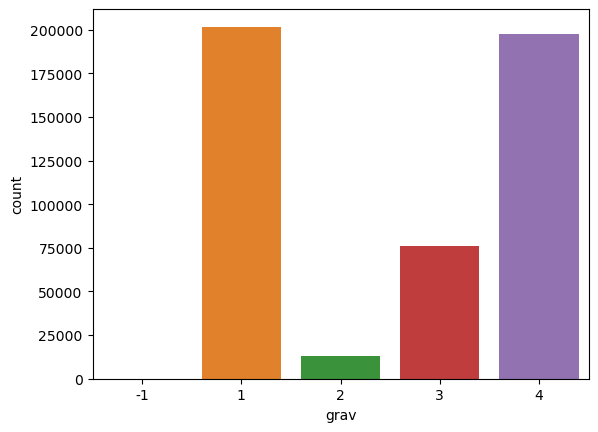

In [349]:
#Repartition de la gravité de l´accident
sns.countplot(x = "grav", data= df)
plt.show()

## Afficher la repartition de la valeur cible

In [351]:
df_modified = df.copy()

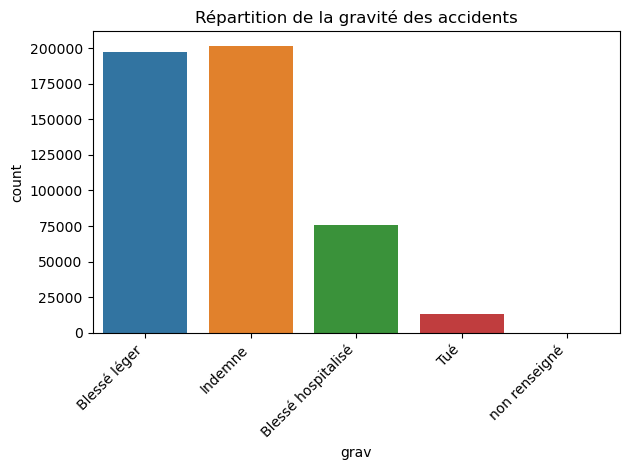

In [352]:
df_modified['grav'] = df_modified['grav'].replace({
  -1: 'non renseigné',
   1: 'Indemne',
   2: 'Tué',
   3: 'Blessé hospitalisé',
   4: 'Blessé léger'
})

# Afficher la répartition de la gravité des accidents avec Seaborn
sns.countplot(x='grav', data=df_modified)

# Personnaliser les étiquettes de l'axe x avec rotation oblique
plt.xticks(rotation=45, ha='right')  # Rotation de 45 degrés, alignées à droite

# Ajouter un titre au graphique
plt.title('Répartition de la gravité des accidents')

# Afficher le graphique
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show()

## Trouver toutes les lignes de la data frame qui ont dans une colonne quelconque la valeur -1

In [354]:
filtered_df = df[df.eq(-1).any(axis=1)]

In [355]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236249 entries, 0 to 494017
Data columns (total 38 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   place      236249 non-null  int64   
 1   catu       236249 non-null  int64   
 2   grav       236249 non-null  int64   
 3   sexe       236249 non-null  int64   
 4   trajet     236249 non-null  int64   
 5   secu1      236249 non-null  int64   
 6   locp       236249 non-null  int64   
 7   senc       236249 non-null  int64   
 8   catv       236249 non-null  int64   
 9   obs        236249 non-null  int64   
 10  obsm       236249 non-null  int64   
 11  choc       236249 non-null  int64   
 12  manv       236249 non-null  int64   
 13  motor      236249 non-null  int64   
 14  catr       236249 non-null  int64   
 15  circ       236249 non-null  int64   
 16  nbv        236249 non-null  Int64   
 17  vosp       236249 non-null  int64   
 18  prof       236249 non-null  int64   
 19  plan   

Au vu du nombre des lignes consernés nous ne pouvont pas les considerer comme
valeurs manquantes et les supprimer

## Trouver les lignes qui ont dans la colonne grav la valeur -1

In [358]:
df_zero=df[df.grav < 0]
df_zero

,place,catu,grav,sexe,trajet,secu1,locp,senc,catv,obs,obsm,choc,manv,motor,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,lum,dep,com,agg,int,atm,col,lat,long,weekday,age_group,hr_group
408191,1,1,-1,1,0,2,0,1,3,0,1,0,0,-1,4,-1,2,0,1,1,1,0,8,6,25,6,1,44,44109,2,1,1,6,47.2146,-1.52779,5,2,5


Comme il n´ya qu´une ligne alors nous pouvont la supprimer

In [360]:
df = df[df['grav'] != -1]

Faire Test

In [362]:
df_zero=df[df.grav < 0]
df_zero

,place,catu,grav,sexe,trajet,secu1,locp,senc,catv,obs,obsm,choc,manv,motor,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,lum,dep,com,agg,int,atm,col,lat,long,weekday,age_group,hr_group


In [363]:
## Afficher une fois de plus la repartition de la valeur cible

In [364]:
df_modified = df.copy()

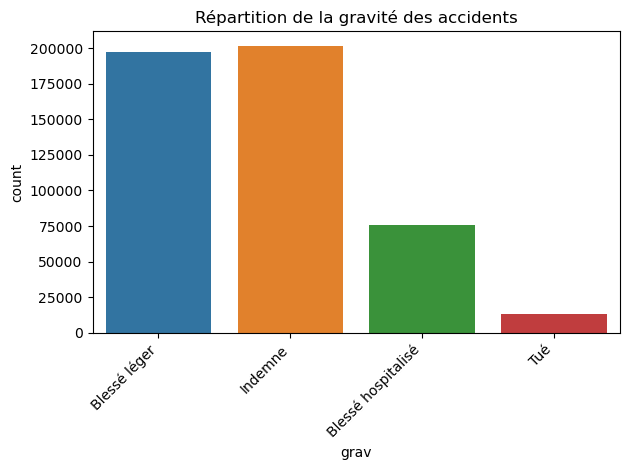

In [365]:
df_modified['grav'] = df_modified['grav'].replace({
  -1: 'non renseigné',
   1: 'Indemne',
   2: 'Tué',
   3: 'Blessé hospitalisé',
   4: 'Blessé léger'
})

# Afficher la répartition de la gravité des accidents avec Seaborn
sns.countplot(x='grav', data=df_modified)

# Personnaliser les étiquettes de l'axe x avec rotation oblique
plt.xticks(rotation=45, ha='right')  # Rotation de 45 degrés, alignées à droite

# Ajouter un titre au graphique
plt.title('Répartition de la gravité des accidents')

# Afficher le graphique
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show()

Text(0.5, 1.0, 'Variables corrélées')

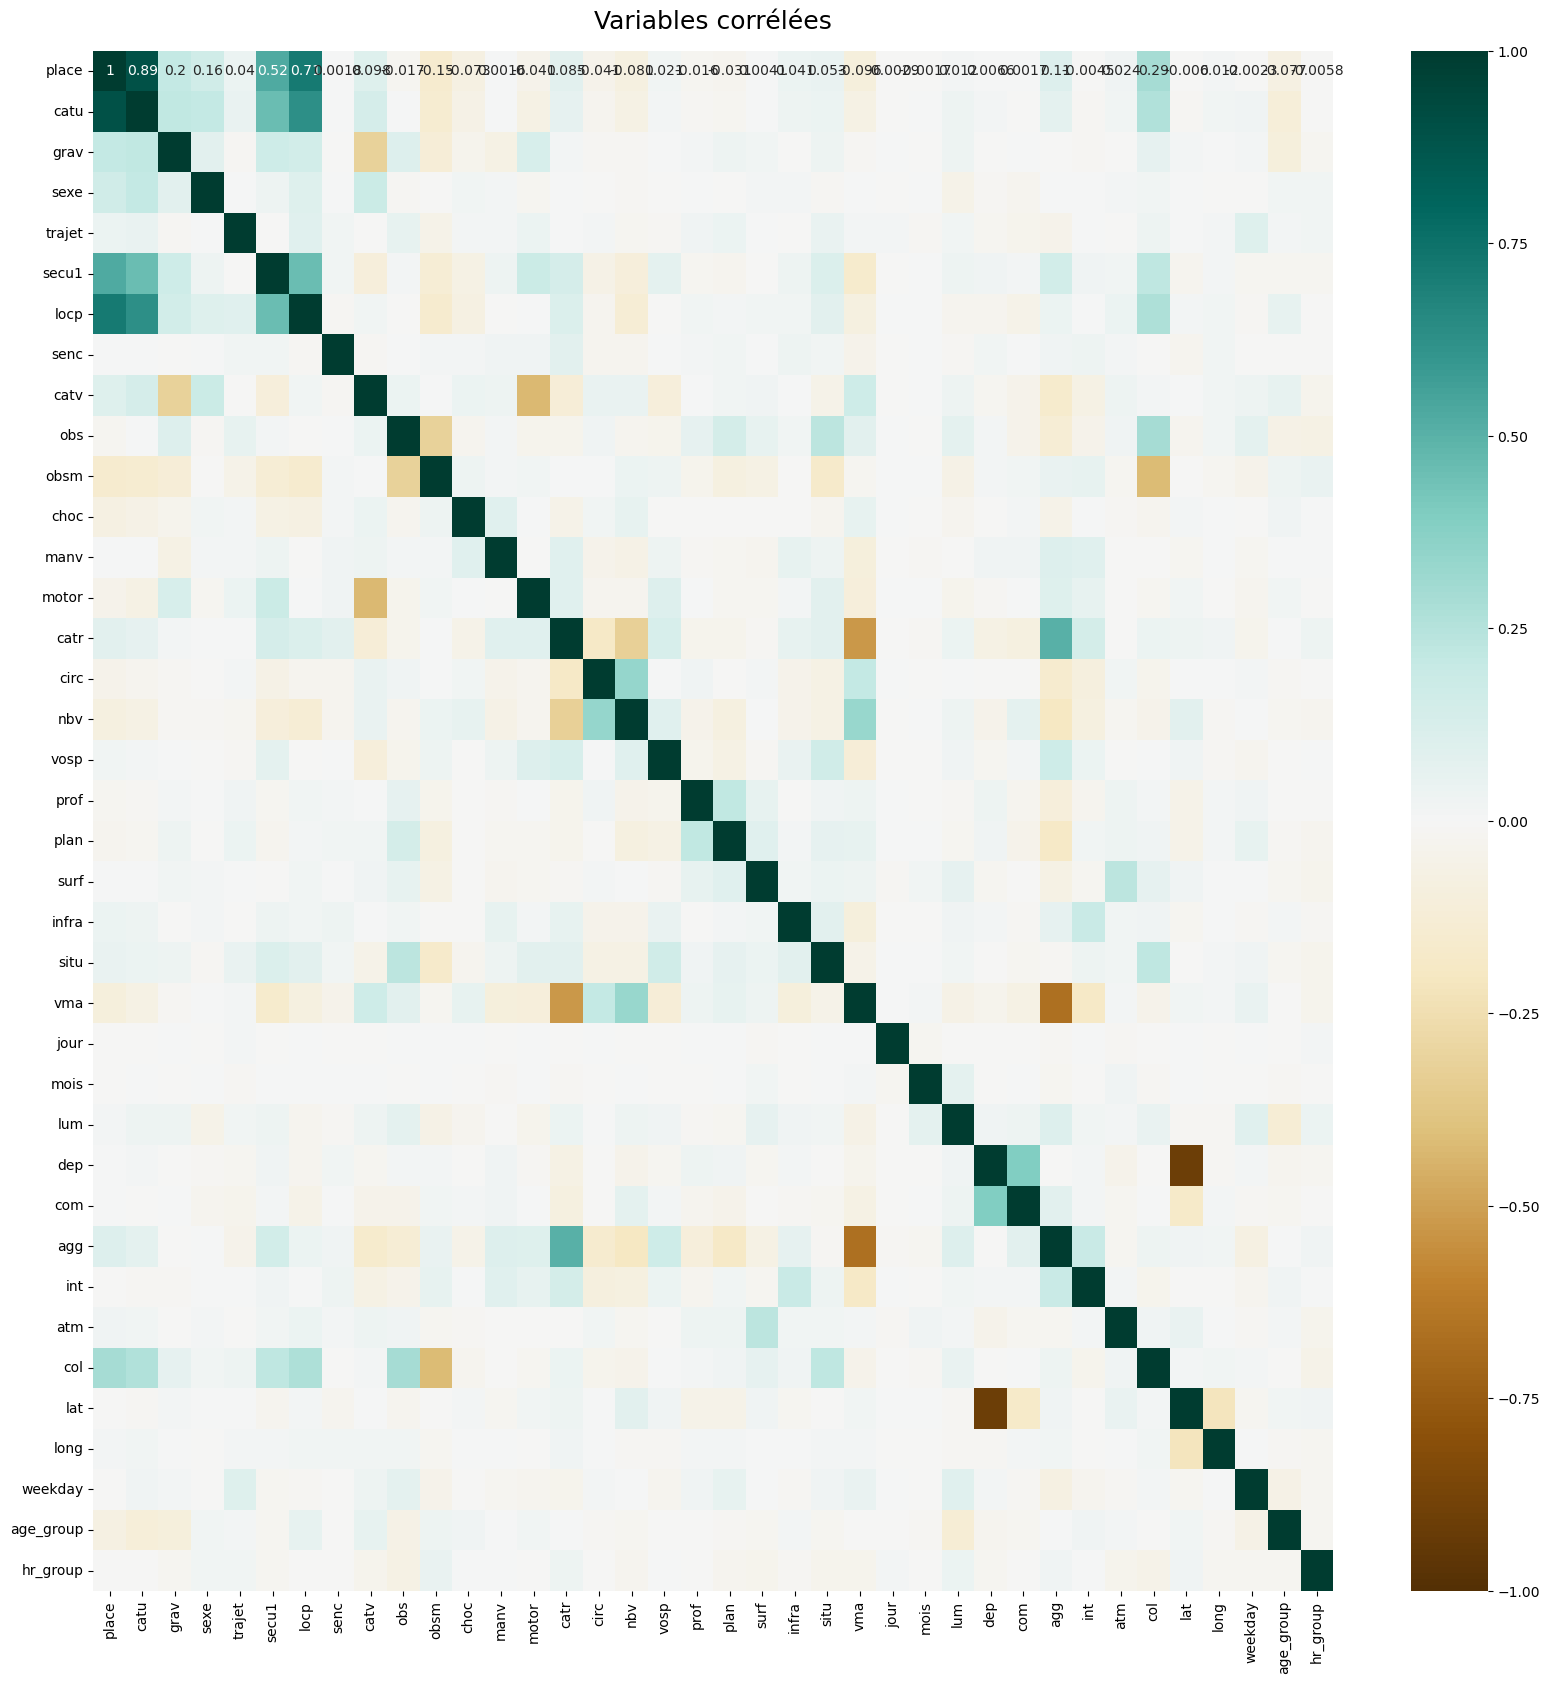

In [366]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(), vmin =-1, vmax=1, annot=True, cmap= 'BrBG')
heatmap.set_title('Variables corrélées', fontdict={'fontsize':18}, pad=16)

## Importation de bibliothèques nécessaires

In [368]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from lazypredict.Supervised import LazyClassifier


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

## Séparer les variables explicatives de la variable cible

In [370]:
features = df.drop('grav', axis=1)
target = df['grav'] 

## Décomposition des données en deux ensembles d'entraînement et de test

On obtient un ensemble d´entrainement  et un ensemble de test correspondant respectivement à 80 et 20% 
des données mis à notre disposition. Ajouter l'argument random_state = 66 pour une reproductivité de l'aléatoire

In [373]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=66)

## Standardisation des données

In [375]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [376]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [377]:
#list_of_models =[DummyClassifier, LogisticRegression, RandomForestClassifier, BaggingClassifier, 
                 #AdaBoostClassifier, DecisionTreeClassifier, ExtraTreesClassifier, KNeighborsClassifier
                #,XGBClassifier, LGBMClassifier]

In [378]:
#lazyClas = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,predictions=True, classifiers=list_of_models)

#lazyClas = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,predictions=True)

In [379]:
#models_train, predictions_train=lazyClas.fit(X_train, X_train, y_train, y_train)
#models_test, predictions_test=lazyClas.fit(X_train, X_test, y_train, y_test)

In [380]:
#print("Performances du model sur l´ensemble d´entrainement\n")
#models_train

In [381]:
#print("Performances du model sur l´ensemble de test\n")
#models_test

# Classification par régression logistique

Nous allons dans un premier temps créer et construire un premier modèle de classification sur les données d'entraînement
avec l´algorithme de régression logistique

In [384]:

clf = linear_model.LogisticRegression(max_iter=10000, C=1.0)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

Évaluation de ce premier modèle

In [386]:
y_pred = clf.predict(X_test_scaled)

# Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[31901     0   877  7539]
 [  738    16   770   993]
 [ 3527    20  3369  8454]
 [13498    10  2156 23747]]


Classe prédite,1,2,3,4
Classe réelle,,,,
1,31901,0,877,7539
2,738,16,770,993
3,3527,20,3369,8454
4,13498,10,2156,23747


In [387]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.79      0.71     40317
           2       0.35      0.01      0.01      2517
           3       0.47      0.22      0.30     15370
           4       0.58      0.60      0.59     39411

    accuracy                           0.60     97615
   macro avg       0.51      0.40      0.40     97615
weighted avg       0.58      0.60      0.58     97615



Ce modéle ne donne pas satisfaction. Il semble etre efficace pour les classes 1 et 4 
qui sont en surnombre dans la banque de donnés

Nous allons pour la suite considérer juste deux classes "Accidents sans gravité" constitués des classes "Blessé léger" et "Indemne"  
et "Accidents graves" constitués des classes "Blessé hospitalisé" et "Tué"

La classe "Accidents sans gravité" aurra pour valeur 1 et la classe "Accidents graves" aurra pour valeur 2

In [390]:
#Création du dictionaire de correspondances
correspondances = {3: 2, 4: 2}

In [391]:
#Appliquer ce dictionaire de correspondances à la data frame
df['grav'] = df['grav'].replace(correspondances)

In [392]:
df.grav.unique()

array([2, 1], dtype=int64)

## Afficher la nouvelle repartition de la valeur cible

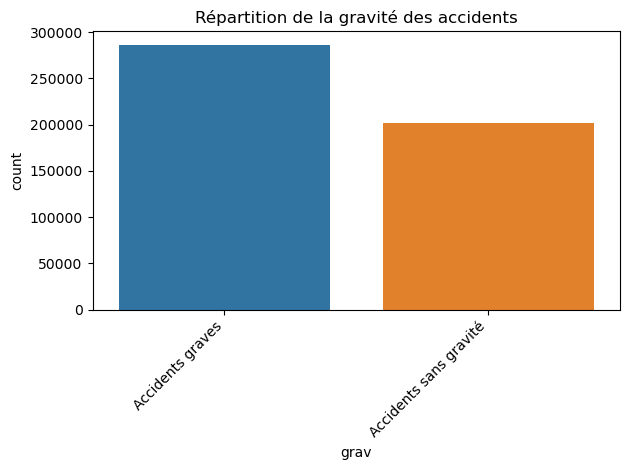

In [394]:
## Afficher la nouvelle repartition de la valeur cible
df_modified = df.copy()
df_modified['grav'] = df_modified['grav'].replace({
   1: 'Accidents sans gravité',
   2: 'Accidents graves'
})

# Afficher la répartition de la gravité des accidents avec Seaborn
sns.countplot(x='grav', data=df_modified)

# Personnaliser les étiquettes de l'axe x avec rotation oblique
plt.xticks(rotation=45, ha='right')  # Rotation de 45 degrés, alignées à droite

# Ajouter un titre au graphique
plt.title('Répartition de la gravité des accidents')

# Afficher le graphique
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show()

# Classification par régression logistique avec la variable cible réduite à 2 valeurs

## Séparer les variables explicatives de la variable cible

In [397]:
features = df.drop('grav', axis=1)
target = df['grav'] 

In [398]:
## Décomposition des données en deux ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=66)


## Standardisation des données

In [400]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [401]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [402]:
# Création du classifieur et construction du modèle sur les données d'entraînement
clf = linear_model.LogisticRegression(max_iter=10000, C=1.0)
clf.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

## Evaluation du second modèle

In [404]:
y_pred = clf.predict(X_test_scaled)

# Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[28240 12077]
 [13512 43786]]


Classe prédite,1,2
Classe réelle,,
1,28240,12077
2,13512,43786


In [405]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.70      0.69     40317
           2       0.78      0.76      0.77     57298

    accuracy                           0.74     97615
   macro avg       0.73      0.73      0.73     97615
weighted avg       0.74      0.74      0.74     97615



Comme la classe 1 a un F1-score très bas on a une confirmation que cette classe n´a pas été bien gérée. Elle n´est donc toujours pas bien détectée

Pour essayer d´améliorer le résultat de notre projet 
nous allons regarder de plus près la répartition de la variable cible

In [408]:
target.value_counts(normalize=True)

grav
2   0.59
1   0.41
Name: proportion, dtype: float64

On note un grand déséquilibre dans les données

Nous allons avant l´entrainement d´un modèle procéder à un rééchantillonage des donnés.

## Rééchantionage par l´Oversampling

Nous utiliserons les méthodes de RandomOverSampler et de SMOTE

In [413]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [414]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train_scaled, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

#SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train_scaled, y_train)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))

Classes échantillon oversampled : {2: 229144, 1: 229144}
Classes échantillon SMOTE : {2: 229144, 1: 229144}


## Rééchantionage par l´Undersampling

Nous utiliserons les méthodes de RandomUnderSampler et de ClusterCentroids

In [417]:
from sklearn.cluster import KMeans
#Configurer KMeans avec n_init
# kmeans = KMeans(n_clusters=8, n_init='auto')

# Random Undersampling
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train_scaled, y_train)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))

###Centroids
# cc = ClusterCentroids(estimator=kmeans)
#cc = ClusterCentroids()
# X_cc, y_cc = cc.fit_resample(X_train_scaled, y_train)
# print('Classes échantillon ClusterCentroids :', dict(pd.Series(y_cc).value_counts()))

Classes échantillon undersampled : {1: 161313, 2: 161313}


## Entrainement et évaluation du modèle avec la méthode RandomOversampler

In [419]:
clf = linear_model.LogisticRegression(max_iter=5000, C=1.0)
clf.fit(X_ro, y_ro)

LogisticRegression(max_iter=5000)

In [420]:
y_pred = clf.predict(X_test_scaled)

# Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[32087  8230]
 [17936 39362]]


Classe prédite,1,2
Classe réelle,,
1,32087,8230
2,17936,39362


In [421]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.80      0.69      0.71      0.74      0.55     40317
          2       0.83      0.69      0.80      0.75      0.74      0.54     57298

avg / total       0.75      0.73      0.75      0.73      0.74      0.55     97615



## Entrainement et évaluation du modèle avec la méthode SMOTE

In [423]:
clf = linear_model.LogisticRegression(max_iter=5000, C=1.0)
clf.fit(X_sm, y_sm)

LogisticRegression(max_iter=5000)

In [424]:
y_pred = clf.predict(X_test_scaled)

# Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[31956  8361]
 [17696 39602]]


Classe prédite,1,2
Classe réelle,,
1,31956,8361
2,17696,39602


In [425]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.79      0.69      0.71      0.74      0.55     40317
          2       0.83      0.69      0.79      0.75      0.74      0.54     57298

avg / total       0.75      0.73      0.75      0.74      0.74      0.55     97615



On remarque la methodes RandomOversampler et SMOTE donnent le meme résultat

À présent nous allons nous tourner vers des méthodes de Undersampling

## Entrainement et évaluation du modèle avec la méthode RandomUndersampler

In [429]:
clf = linear_model.LogisticRegression(max_iter=5000, C=1.0)
clf.fit(X_ru, y_ru)

LogisticRegression(max_iter=5000)

In [430]:
y_pred = clf.predict(X_test_scaled)

# Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[32071  8246]
 [17951 39347]]


Classe prédite,1,2
Classe réelle,,
1,32071,8246
2,17951,39347


In [431]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.80      0.69      0.71      0.74      0.55     40317
          2       0.83      0.69      0.80      0.75      0.74      0.54     57298

avg / total       0.75      0.73      0.75      0.73      0.74      0.55     97615



Meme avec un Undersampling on n´optient aucune amélioration

Pour la suite nous allons dans un premier temps essayer de trouver les meilleurs algorithmes. Pour cela nous allons nous servir de la classe LazyClassifier

# Recherche du meilleur algorithme pour créer le modèle de classification

## Recherche du meilleur algorithme avec les données déséquilibrées

In [436]:
#lazyClas = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)

#models, predictions=lazyClas.fit(X_train_scaled, X_test_scaled, y_train, y_test)

In [437]:
#print("Résultats de différents algorithmes avec les données déséquilibrées")
#print(models)

In [438]:
########################ExtraTreesClassifier##################################

In [439]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import ExtraTreeClassifier

In [440]:

exTrClas = ExtraTreeClassifier(random_state=42)
exTrClas.fit(X_train_scaled, y_train)

y_pred = exTrClas.predict(X_test_scaled)

# Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm



[[26719 13598]
 [13993 43305]]


Classe prédite,1,2
Classe réelle,,
1,26719,13598
2,13993,43305


In [441]:
print(classification_report(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.66      0.66     40317
           2       0.76      0.76      0.76     57298

    accuracy                           0.72     97615
   macro avg       0.71      0.71      0.71     97615
weighted avg       0.72      0.72      0.72     97615

                   pre       rec       spe        f1       geo       iba       sup

          1       0.66      0.66      0.76      0.66      0.71      0.50     40317
          2       0.76      0.76      0.66      0.76      0.71      0.51     57298

avg / total       0.72      0.72      0.70      0.72      0.71      0.50     97615



# Recherche de meilleur parametres pour randomForestClassifier

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(best_params)

In [444]:
########################RandomForestClassifier##################################

RandClas = RandomForestClassifier(n_estimators=100, random_state=42)

RandClas.fit(X_train_scaled, y_train)

y_pred = RandClas.predict(X_test_scaled)

# Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm)

print(classification_report(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

[[32020  8297]
 [ 9946 47352]]
Classe prédite      1      2
Classe réelle               
1               32020   8297
2                9946  47352
              precision    recall  f1-score   support

           1       0.76      0.79      0.78     40317
           2       0.85      0.83      0.84     57298

    accuracy                           0.81     97615
   macro avg       0.81      0.81      0.81     97615
weighted avg       0.81      0.81      0.81     97615

                   pre       rec       spe        f1       geo       iba       sup

          1       0.76      0.79      0.83      0.78      0.81      0.65     40317
          2       0.85      0.83      0.79      0.84      0.81      0.66     57298

avg / total       0.81      0.81      0.81      0.81      0.81      0.66     97615



In [445]:
########################LGBMClassifier##################################

LGBMClas = LGBMClassifier()


LGBMClas.fit(X_train_scaled, y_train)

y_pred = LGBMClas.predict(X_test_scaled)

# Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm)

print(classification_report(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

[LightGBM] [Info] Number of positive: 229144, number of negative: 161313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 390457, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586861 -> initscore=0.351004
[LightGBM] [Info] Start training from score 0.351004
[[31067  9250]
 [ 9721 47577]]
Classe prédite      1      2
Classe réelle               
1               31067   9250
2                9721  47577
              precision    recall  f1-score   support

           1       0.76      0.77      0.77     40317
           2       0.84      0.83      0.83     57298

    accuracy                           0.81     97615
   macro avg       0.80      0.80      0.80     97615
weighted avg       0.8

## Recherche du meilleur algorithme avec des données reéquilibrées par la méthode de Oversampling

In [447]:
#lazyClas = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,
                         #predictions=True)

#models, predictions=lazyClas.fit(X_train_scaled, X_test_scaled, y_train, y_test)


In [448]:
#print("Résultats de différents algorithmes avec les données reéquilibrées par la méthode de Oversampling")
#print(models)

## Recherche du meilleur algorithme avec des données reéquilibrées par la méthode de Undersampling

In [450]:
#lazyClas = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,
                         #predictions=True)

#models, predictions=lazyClas.fit(X_ru, X_test_scaled, y_ru, y_test)

In [451]:
#print("Résultats de différents algorithmes avec les données reéquilibrées par la méthode de Undersampling")
#print(models)

from sklearn.model_selection import GridSearchCV

# Initialisation du classificateur XGBClassifier
xgb = XGBClassifier()

# Définition de la grille de recherche pour les hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2]
}

# Initialisation de GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Évaluation du modèle sur l'ensemble de test
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur l'ensemble de test :, {accuracy * 100:.2f}%")

# Initialisation du classificateur XGBClassifier
#xgb = XGBClassifier()

# Définition de la grille de recherche pour les hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2]
}

# Initialisation de GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_ru, y_ru)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Évaluation du modèle sur l'ensemble de test
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur l'ensemble de test :, {accuracy * 100:.2f}%")

Avec des données équilibrées

# Initialisation du classificateur XGBClassifier
xgb1 = XGBClassifier()

# Définition de la grille de recherche pour les hyperparamètres
param_grid1 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialisation de GridSearchCV
grid_search1 = GridSearchCV(estimator=xgb1, param_grid=param_grid1, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Exécution de la recherche d'hyperparamètres
grid_search1.fit(X_ro, y_ro)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search1.best_params_)

# Évaluation du modèle sur l'ensemble de test
best_xgb1 = grid_search1.best_estimator_
accuracy1 = best_xgb1.score(X_test_scaled, y_test)
print("Précision sur l'ensemble de test :", accuracy1)

In [457]:

#xgb_clo = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=5, subsample=1.0, colsample_bytree=1.0)

## Entraînement du modèle
#xgb_clo.fit(X_train_scaled, y_train)
#y_pred = xgb_clo.predict(X_test_scaled)

## Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
#from sklearn.metrics import confusion_matrix 
#cm = confusion_matrix(y_test,y_pred)
#print(cm)

## Méthode 2 : à l'aide de pandas
#cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
#cm

#print(cm)

#print(classification_report(y_test, y_pred))
#print(classification_report_imbalanced(y_test, y_pred))

print(classification_report_imbalanced(y_test, y_pred))

In [459]:
#################################################################################

In [460]:
#xgb_clu = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=5, subsample=1.0, colsample_bytree=1.0)

## Entraînement du modèle
#xgb_clu.fit(X_ru, y_ru)
#y_pred = xgb_clu.predict(X_test_scaled)

## Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
#from sklearn.metrics import confusion_matrix 
#cm = confusion_matrix(y_test,y_pred)
#print(cm)

## Méthode 2 : à l'aide de pandas
#cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
#cm

print(classification_report_imbalanced(y_test, y_pred))

In [462]:
######################################################################################################

In [463]:
#from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
#from sklearn.svm import SVC

In [464]:
#import numpy as np

#clf_lr = LogisticRegression(random_state=22, max_iter=2000)
#clf_rf = RandomForestClassifier(random_state=22)
#clf_svc = SVC(random_state=22)
#clf_KNN = KNeighborsClassifier()

In [465]:
#param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 
                 #'C': np.logspace(-4, 2, 9)}

#param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000],
                #'min_samples_leaf': [1, 3, 5],
                #max_features': ['sqrt', 'log2']}]

#param_grid_svc = [{'kernel': ['rbf'], 
                #'C': np.logspace(-4, 4, 9),                 
                #'gamma': np.logspace(-4, 0, 4)},                    
                #{'kernel': ['linear'], 
               # 'C': np.logspace(-4, 4, 9)}]


#param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                 #'weights': ['uniform', 'distance'],
                    #'metric': ['euclidean', 'manhattan', 'minkowski']
#}

Soit un dictionnaire vides gridcvs

#gridcvs = {}

#for pgrid, clf, name in zip((param_grid_rf, param_grid_svc, param_grid_knn),
                            #(clf_rf, clf_svc, clf_KNN),
                            #('LogisticRegression', 'RF', 'SVM', 'KNN')):
    #gcv = GridSearchCV(clf, pgrid, cv=3, refit=True)
    #gridcvs[name] = gcv
    
    

"""
for pgrid, clf, name in zip((param_grid_lr, param_grid_rf, param_grid_svc, param_grid_knn),
                            (clf_lr, clf_rf, clf_svc, clf_KNN),
                            ('LogisticRegression', 'RF', 'SVM', 'KNN')):
    gcv = GridSearchCV(clf, pgrid, cv=3, refit=True)
    gridcvs[name] = gcv
"""


Avec les valeurs provenant du RandomOversample

outer_cv = StratifiedKFold(n_splits=3, shuffle=True)
outer_scores = {}

for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, X_ro, y_ro, cv=outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')

# This is a headline
un text and you could say
## this is a sub title
**fult**
1. at
   1. from
   2. on
2. on